In [4]:
#DATA SCIENCE PROJECT FOR USING FOOTBALL STATISTICS TO PREDICT WINS USING DATA FROM TSU WEBSITE

In [1]:
#importing libraries for project
#python's lxml library parses xml and html files
from lxml import html
#python requests library gets data from web pages
import requests
#libraries for data wrangling & cleaning
import pandas as pd
import numpy as np
import datetime as dt
#libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#web scraping-getting data on location of games and scores from TSU website 
#data wrangling-putting data from websites into lists

In [7]:
#2019 data
#use requests.get() to get web page with 2019 data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/E018AECE-A1B8-46E7-B1B7-46FE1BCEBFB6/teamstat.htm')
#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)
#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get list of data from web page
schedule2019 = mytree.xpath('body//tr/td/font[@color="#000000"]/text()')
#look at list
schedule2019

['Nov 23, 2019\xa0\xa0',
 'Cookeville, Tenn.   \xa0\xa0',
 'Tennessee State 37, Tennessee Tech 27\xa0\xa0',
 '\xa0',
 'Nov 16, 2019\xa0\xa0',
 'Martin, Tenn.       \xa0\xa0',
 'UT Martin 28, Tennessee State 17\xa0\xa0',
 '\xa0',
 'Nov 09, 2019\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'EIU 49, Tennessee State 38\xa0\xa0',
 '\xa0',
 'Nov 02, 2019\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'SEMO 32, Tennessee State 13\xa0\xa0',
 '\xa0',
 'Oct 19, 2019\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Tennessee State 26, Austin Peay 24\xa0\xa0',
 '\xa0',
 'Oct 12, 2019\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Murray State 31, Tennessee State 17\xa0\xa0',
 '\xa0',
 'Oct 05, 2019\xa0\xa0',
 'Jacksonville, Ala.  \xa0\xa0',
 'Jacksonville State 31, Tennessee State 23\xa0\xa0',
 '\xa0',
 'Sep 28, 2019\xa0\xa0',
 'Richmond, Ky.       \xa0\xa0',
 'Eastern Kentucky 42, Tennessee State 16\xa0\xa0',
 '\xa0',
 'Sep 21, 2019\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'UAPB 37, Tennessee State 31\x

In [8]:
#get rid of extra text and spaces in list
#put text for school name and city into format that's compatible for data frame
schedule2019=[s.replace("UAPB","Pine Bluff") for s in schedule2019]
schedule2019=[t.replace("SEMO","Southeast Missouri") for t in schedule2019]
schedule2019=[u.replace("EIU","Eastern Illinois") for u in schedule2019]
schedule2019=[v.replace("UT","Tennessee") for v in schedule2019]
schedule2019=[w.replace(".", "") for w in schedule2019]
schedule2019=[x.replace("\xa0", "") for x in schedule2019]
schedule2019=[y.replace(",","") for y in schedule2019]
schedule2019=[z.strip() for z in schedule2019]
schedule2019

['Nov 23 2019',
 'Cookeville Tenn',
 'Tennessee State 37 Tennessee Tech 27',
 '',
 'Nov 16 2019',
 'Martin Tenn',
 'Tennessee Martin 28 Tennessee State 17',
 '',
 'Nov 09 2019',
 'Nashville Tenn',
 'Eastern Illinois 49 Tennessee State 38',
 '',
 'Nov 02 2019',
 'Nashville Tenn',
 'Southeast Missouri 32 Tennessee State 13',
 '',
 'Oct 19 2019',
 'Nashville Tenn',
 'Tennessee State 26 Austin Peay 24',
 '',
 'Oct 12 2019',
 'Nashville Tenn',
 'Murray State 31 Tennessee State 17',
 '',
 'Oct 05 2019',
 'Jacksonville Ala',
 'Jacksonville State 31 Tennessee State 23',
 '',
 'Sep 28 2019',
 'Richmond Ky',
 'Eastern Kentucky 42 Tennessee State 16',
 '',
 'Sep 21 2019',
 'Nashville Tenn',
 'Pine Bluff 37 Tennessee State 31',
 '',
 'Sep 14 2019',
 'Memphis Tenn',
 'Jackson State 49 Tennessee State 44',
 '',
 'Sep 7 2019',
 'Murfreesboro TN',
 'Middle Tennessee 45 Tennessee State 26',
 '',
 'Aug 31 2019',
 'Nashville Tenn',
 'Tennessee State 26 Mississippi Valley 20',
 '']

In [9]:
#2018 data
#use requests.get() to get web page with 2018 data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/125803E8-C113-4C2F-890C-645D4ED8B38B/teamstat.htm')
#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)
#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get list of data from web page
schedule2018 = mytree.xpath('body//tr/td/font[@color="#000000"]/text()')
#look at list
schedule2018

['Nov 17, 2018\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Tennessee State 31, UTM 28\xa0\xa0',
 '\xa0',
 'Nov 10, 2018\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Jacksonville State 41, Tennessee State 14\xa0\xa0',
 '\xa0',
 '11-03-18    \xa0\xa0',
 'Cape Girardeau, Mo. \xa0\xa0',
 'Southeast Missouri 38, Tennessee State 21\xa0\xa0',
 '\xa0',
 'Oct 20, 2018\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'Tennessee State 41, Tennessee Tech 14\xa0\xa0',
 '\xa0',
 'Oct 13, 2018\xa0\xa0',
 'Murray, Ky.         \xa0\xa0',
 'Murray St. 45, Tennessee State 21\xa0\xa0',
 '\xa0',
 'Oct 06, 2018\xa0\xa0',
 'Clarksville, Tenn.  \xa0\xa0',
 'Austin Peay 49, Tennessee State 34\xa0\xa0',
 '\xa0',
 'Sep 29, 2018\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Vanderbilt 31, Tennessee State 27\xa0\xa0',
 '\xa0',
 'Sep 22, 2018\xa0\xa0',
 'Charleston, Ill.    \xa0\xa0',
 'Tennessee State 41, Eastern Illinois 40\xa0\xa0',
 '\xa0',
 'Sep 01, 2018\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Tennessee State 

In [10]:
#get rid of extra text and spaces in list
#put text for date, school name and city into format that's compatible for data frame
schedule2018=[q.replace('Vanderbilt','Vanderbilt University') for q in schedule2018]
schedule2018=[p.replace('Cape Girardeau','CapeGirardeau') for p in schedule2018]
schedule2018=[r.replace('11-03-18','Nov 03 2018') for r in schedule2018]
schedule2018=[s.replace("UTM","Tennessee Martin") for s in schedule2018]
schedule2018=[t.replace("SEMO","Southeast Missouri") for t in schedule2018]
schedule2018=[u.replace("Bethune-Cookman","Bethune Cookman") for u in schedule2018]
schedule2018=[w.replace(".", "") for w in schedule2018]
schedule2018=[x.replace("\xa0", "") for x in schedule2018]
schedule2018=[y.replace(",","") for y in schedule2018]
schedule2018=[z.strip() for z in schedule2018]
schedule2018

['Nov 17 2018',
 'Nashville Tenn',
 'Tennessee State 31 Tennessee Martin 28',
 '',
 'Nov 10 2018',
 'Nashville Tenn',
 'Jacksonville State 41 Tennessee State 14',
 '',
 'Nov 03 2018',
 'CapeGirardeau Mo',
 'Southeast Missouri 38 Tennessee State 21',
 '',
 'Oct 20 2018',
 'Nashville TN',
 'Tennessee State 41 Tennessee Tech 14',
 '',
 'Oct 13 2018',
 'Murray Ky',
 'Murray St 45 Tennessee State 21',
 '',
 'Oct 06 2018',
 'Clarksville Tenn',
 'Austin Peay 49 Tennessee State 34',
 '',
 'Sep 29 2018',
 'Nashville Tenn',
 'Vanderbilt University 31 Tennessee State 27',
 '',
 'Sep 22 2018',
 'Charleston Ill',
 'Tennessee State 41 Eastern Illinois 40',
 '',
 'Sep 01 2018',
 'Nashville Tenn',
 'Tennessee State 34 Bethune Cookman 3',
 '']

In [11]:
#2017 data
#use requests.get() to get web page with 2017 data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/1EEBECA9-B01E-43AB-B6EB-AFDBF863957B/teamstat.htm')
#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)
#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get list of data from web page
schedule2017 = mytree.xpath('body//tr/td/font[@color="#000000"]/text()')
#look at list
schedule2017

['Nov 16, 2017\xa0\xa0',
 'Jacksonville, Ala.  \xa0\xa0',
 'Jacksonville State 36, Tennessee State 6\xa0\xa0',
 '\xa0',
 'Nov 11, 2017\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Tennessee State 23, SEMO 20\xa0\xa0',
 '\xa0',
 'Nov 04, 2017\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Tennessee State 60, VUL 0\xa0\xa0',
 '\xa0',
 'Oct 28, 2017\xa0\xa0',
 'Cookeville, Tenn.   \xa0\xa0',
 'Tennessee Tech 30, Tennessee State 26\xa0\xa0',
 '\xa0',
 'Oct 14, 2017\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Austin Peay 21, Tennessee State 17\xa0\xa0',
 '\xa0',
 'Oct 07, 2017\xa0\xa0',
 'Richmond, Ky.       \xa0\xa0',
 'Tennessee State 45, Eastern Kentucky 21\xa0\xa0',
 '\xa0',
 'Sep 30, 2017\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Eastern Illinois 19, Tennessee State 16\xa0\xa0',
 '\xa0',
 'Sep 23, 2017\xa0\xa0',
 'Martin, Tenn.       \xa0\xa0',
 'UT Martin 31, Tennessee State 16\xa0\xa0',
 '\xa0',
 'Sep 17, 2017\xa0\xa0',
 'Tampa, Fla          \xa0\xa0',
 'Tennessee State 24, Florida

In [12]:
#get rid of extra text and spaces in list
#put text for school name and city into format that's compatible for data frame
schedule2017=[t.replace("VUL", "VirginiaU Lynchburg") for t in schedule2017]
schedule2017=[u.replace("SEMO","Southeast Missouri") for u in schedule2017]
schedule2017=[v.replace("UT","Tennessee")for v in schedule2017]
schedule2017=[w.replace(".", "") for w in schedule2017]
schedule2017=[x.replace("\xa0", "") for x in schedule2017]
schedule2017=[y.replace(",","") for y in schedule2017]
schedule2017=[z.strip() for z in schedule2017]
schedule2017

['Nov 16 2017',
 'Jacksonville Ala',
 'Jacksonville State 36 Tennessee State 6',
 '',
 'Nov 11 2017',
 'Nashville Tenn',
 'Tennessee State 23 Southeast Missouri 20',
 '',
 'Nov 04 2017',
 'Nashville Tenn',
 'Tennessee State 60 VirginiaU Lynchburg 0',
 '',
 'Oct 28 2017',
 'Cookeville Tenn',
 'Tennessee Tech 30 Tennessee State 26',
 '',
 'Oct 14 2017',
 'Nashville Tenn',
 'Austin Peay 21 Tennessee State 17',
 '',
 'Oct 07 2017',
 'Richmond Ky',
 'Tennessee State 45 Eastern Kentucky 21',
 '',
 'Sep 30 2017',
 'Nashville Tenn',
 'Eastern Illinois 19 Tennessee State 16',
 '',
 'Sep 23 2017',
 'Martin Tenn',
 'Tennessee Martin 31 Tennessee State 16',
 '',
 'Sep 17 2017',
 'Tampa Fla',
 'Tennessee State 24 Florida A&M 13',
 '',
 'Sep 09 2017',
 'Memphis Tenn',
 'Tennessee State 17 Jackson State 15',
 '',
 'Aug 31 2017',
 'Atlanta Ga',
 'Tennessee State 17 Georgia State 10',
 '']

In [13]:
#2016 data
#use requests.get() to get web page with 2016 data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/F8A9B17C-4555-45FB-AAF3-D88956A7F089/teamstat.htm')
#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)
#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get list of data from web page
schedule2016 = mytree.xpath('body//tr/td/font[@color="#000000"]/text()')
#look at list
schedule2016

['11-19-16    \xa0\xa0',
 'Cape Girardeau, Mo. \xa0\xa0',
 'Tennessee State 32, Southeast Missouri 31\xa0\xa0',
 '\xa0',
 'Nov 12, 2016\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'Tennessee Tech 44, Tennessee State 16\xa0\xa0',
 '\xa0',
 'Nov 05, 2016\xa0\xa0',
 'Clarksville, Tenn.  \xa0\xa0',
 'Tennessee State 41, Austin Peay 40\xa0\xa0',
 '\xa0',
 'Oct 29, 2016\xa0\xa0',
 'Murray, Ky.         \xa0\xa0',
 'Murray St. 38, Tennessee State 31\xa0\xa0',
 '\xa0',
 'Oct 22, 2016\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Vanderbilt 35, Tennessee State 17\xa0\xa0',
 '\xa0',
 'Oct 15, 2016\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Tennessee State 35, Eastern Kentucky 28\xa0\xa0',
 '\xa0',
 'Oct 08, 2016\xa0\xa0',
 'Charleston, Ill.    \xa0\xa0',
 'Eastern Illinois 35, Tennessee State 34\xa0\xa0',
 '\xa0',
 'Oct 01, 2016\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Tennessee State 34, UT Martin 30\xa0\xa0',
 '\xa0',
 'Sep 17, 2016\xa0\xa0',
 'Daytona Beach, Fla. \xa0\xa0',
 'Tennessee St

In [14]:
#get rid of extra text and spaces in list
#put text for date,school name and city into format that's compatible for data frame
schedule2016=[o.replace('Pine Bluff',"PineBluff") for o in schedule2016]
schedule2016=[p.replace('11-19-16','Nov 19 2016') for p in schedule2016]
schedule2016=[r.replace('Cape Girardeau','CapeGirardeau') for r in schedule2016]
schedule2016=[s.replace("Vanderbilt","Vanderbilt University") for s in schedule2016]
schedule2016=[t.replace("UT","Tennessee") for t in schedule2016]
schedule2016=[u.replace("Daytona Beach", "DaytonaBeach") for u in schedule2016]
schedule2016=[v.replace("-"," ") for v in schedule2016]
schedule2016=[w.replace(".", "") for w in schedule2016]
schedule2016=[x.replace("\xa0", "") for x in schedule2016]
schedule2016=[y.replace(",","") for y in schedule2016]
schedule2016=[z.strip() for z in schedule2016]
schedule2016

['Nov 19 2016',
 'CapeGirardeau Mo',
 'Tennessee State 32 Southeast Missouri 31',
 '',
 'Nov 12 2016',
 'Nashville TN',
 'Tennessee Tech 44 Tennessee State 16',
 '',
 'Nov 05 2016',
 'Clarksville Tenn',
 'Tennessee State 41 Austin Peay 40',
 '',
 'Oct 29 2016',
 'Murray Ky',
 'Murray St 38 Tennessee State 31',
 '',
 'Oct 22 2016',
 'Nashville Tenn',
 'Vanderbilt University 35 Tennessee State 17',
 '',
 'Oct 15 2016',
 'Nashville Tenn',
 'Tennessee State 35 Eastern Kentucky 28',
 '',
 'Oct 08 2016',
 'Charleston Ill',
 'Eastern Illinois 35 Tennessee State 34',
 '',
 'Oct 01 2016',
 'Nashville Tenn',
 'Tennessee State 34 Tennessee Martin 30',
 '',
 'Sep 17 2016',
 'DaytonaBeach Fla',
 'Tennessee State 31 Bethune Cookman 24',
 '',
 'Sep 10 2016',
 'Memphis Tenn',
 'Tennessee State 40 Jackson State 26',
 '',
 'Sep 03 2016',
 'Nashville Tenn',
 'Tennessee State 44 Arkansas PineBluff 0',
 '']

In [15]:
#2015 data
#use requests.get() to get web page with 2015 data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/B8713968-6888-4BB4-B12E-9BA4C76282AC/teamstat.htm')
#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)
#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get list of data from web page
schedule2015 = mytree.xpath('body//tr/td/font[@color="#000000"]/text()')
#look at list
schedule2015

['Nov 21, 2015\xa0\xa0',
 'Cookeville, Tenn.   \xa0\xa0',
 'Tennessee Tech 30, Tennessee State 24\xa0\xa0',
 '\xa0',
 'Nov 07, 2015\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Murray State 46, Tennessee State 43\xa0\xa0',
 '\xa0',
 'Oct 31, 2015\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Tennessee State 20, Austin Peay 6\xa0\xa0',
 '\xa0',
 'Oct 24, 2015\xa0\xa0',
 'Richmond, Ky.       \xa0\xa0',
 'Eastern Kentucky 45, Tennessee State 21\xa0\xa0',
 '\xa0',
 'Oct 17, 2015\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Eastern Illinois 25, Tennessee State 22\xa0\xa0',
 '\xa0',
 'Oct 10, 2015\xa0\xa0',
 'Martin, Tenn.       \xa0\xa0',
 'UT Martin 28, Tennessee State 14\xa0\xa0',
 '\xa0',
 'Sep 26, 2015\xa0\xa0',
 'Tallahassee, Fla.   \xa0\xa0',
 'Tennessee State 30, FAMU 14\xa0\xa0',
 '\xa0',
 'Sep 19, 2015\xa0\xa0',
 'Jacksonville, Ala.  \xa0\xa0',
 'Jacksonville State 48, Tennessee State 13\xa0\xa0',
 '\xa0',
 'Sep 12, 2015\xa0\xa0',
 'Memphis, TN         \xa0\xa0',
 'Tennessee State 3

In [16]:
#get rid of extra text and spaces in list
#put text for school name and city into format that's compatible for data frame
schedule2015=[s.replace("Tigers","") for s in schedule2015]
schedule2015=[t.replace("UT","Tennessee") for t in schedule2015]
schedule2015=[u.replace("FAMU","Florida A&M") for u in schedule2015]
schedule2015=[v.replace("-"," ") for v in schedule2015]
schedule2015=[w.replace(".", "") for w in schedule2015]
schedule2015=[x.replace("\xa0", "") for x in schedule2015]
schedule2015=[y.replace(",","") for y in schedule2015]
schedule2015=[z.strip() for z in schedule2015]
schedule2015

['Nov 21 2015',
 'Cookeville Tenn',
 'Tennessee Tech 30 Tennessee State 24',
 '',
 'Nov 07 2015',
 'Nashville Tenn',
 'Murray State 46 Tennessee State 43',
 '',
 'Oct 31 2015',
 'Nashville Tenn',
 'Tennessee State 20 Austin Peay 6',
 '',
 'Oct 24 2015',
 'Richmond Ky',
 'Eastern Kentucky 45 Tennessee State 21',
 '',
 'Oct 17 2015',
 'Nashville Tenn',
 'Eastern Illinois 25 Tennessee State 22',
 '',
 'Oct 10 2015',
 'Martin Tenn',
 'Tennessee Martin 28 Tennessee State 14',
 '',
 'Sep 26 2015',
 'Tallahassee Fla',
 'Tennessee State 30 Florida A&M 14',
 '',
 'Sep 19 2015',
 'Jacksonville Ala',
 'Jacksonville State 48 Tennessee State 13',
 '',
 'Sep 12 2015',
 'Memphis TN',
 'Tennessee State 35 Jackson State  25',
 '',
 'Sep 06 2015',
 'Nashville Tenn',
 'Tennessee State 24 Alabama State 14',
 '']

In [17]:
#2014 data
#use requests.get() to get web page with 2014 data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/26C45AE2-D036-475D-A4EF-38BE29FA4865/teamstat.htm')
#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)
#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get list of data from web page
schedule2014 = mytree.xpath('body//tr/td/font[@color="#000000"]/text()')
#look at list
schedule2014

['Nov 22, 2014\xa0\xa0',
 'Murray, Ky.         \xa0\xa0',
 'Tennessee State 48, Murray St. 33\xa0\xa0',
 '\xa0',
 'Nov 08, 2014\xa0\xa0',
 'Clarksville, Tenn.  \xa0\xa0',
 'Tennessee State 31, Austin Peay 27\xa0\xa0',
 '\xa0',
 'Nov 01, 2014\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Eastern Kentucky 56, Tennessee State 42\xa0\xa0',
 '\xa0',
 'Oct 25, 2014\xa0\xa0',
 'Charleston, Ill.    \xa0\xa0',
 'Eastern Illinois 28, Tennessee State 3\xa0\xa0',
 '\xa0',
 'Oct 18, 2014\xa0\xa0',
 'Hale Stadium        \xa0\xa0',
 'UT Martin 21, Tennessee State 16\xa0\xa0',
 '\xa0',
 'Oct 11, 2014\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Jacksonville State 27, Tennessee State 20\xa0\xa0',
 '\xa0',
 '10-04-14    \xa0\xa0',
 'Cape Girardeau, Mo. \xa0\xa0',
 'Southeast Missouri 28, Tennessee State 21\xa0\xa0',
 '\xa0',
 'Sep 27, 2014\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Tennessee State 27, Florida A&M 7\xa0\xa0',
 '\xa0',
 'Sep 20, 2014\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'Tennessee

In [18]:
#get rid of extra text and spaces in list
#put text for date, school name and city into format that's compatible for data frame
schedule2014=[s.replace("Hale Stadium","Nashville, Tenn.") for s in schedule2014]
schedule2014=[t.replace("10-04-14","Oct 04, 2014") for t in schedule2014]
schedule2014=[u.replace("Cape Girardeau","CapeGirardeau") for u in schedule2014]
schedule2014=[v.replace("-"," ") for v in schedule2014]
schedule2014=[w.replace(".", "") for w in schedule2014]
schedule2014=[x.replace("\xa0", "") for x in schedule2014]
schedule2014=[y.replace(",","") for y in schedule2014]
schedule2014=[z.strip() for z in schedule2014]
schedule2014

['Nov 22 2014',
 'Murray Ky',
 'Tennessee State 48 Murray St 33',
 '',
 'Nov 08 2014',
 'Clarksville Tenn',
 'Tennessee State 31 Austin Peay 27',
 '',
 'Nov 01 2014',
 'Nashville Tenn',
 'Eastern Kentucky 56 Tennessee State 42',
 '',
 'Oct 25 2014',
 'Charleston Ill',
 'Eastern Illinois 28 Tennessee State 3',
 '',
 'Oct 18 2014',
 'Nashville Tenn',
 'UT Martin 21 Tennessee State 16',
 '',
 'Oct 11 2014',
 'Nashville Tenn',
 'Jacksonville State 27 Tennessee State 20',
 '',
 'Oct 04 2014',
 'CapeGirardeau Mo',
 'Southeast Missouri 28 Tennessee State 21',
 '',
 'Sep 27 2014',
 'Nashville Tenn',
 'Tennessee State 27 Florida A&M 7',
 '',
 'Sep 20 2014',
 'Nashville TN',
 'Tennessee State 10 Tennessee Tech 7',
 '',
 'Sep 13 2014',
 'Memphis Tenn',
 'Tennessee State 35 Jackson State 7',
 '',
 'Sep 06 2014',
 'Montgomery Ala',
 'Alabama State 27 Tennessee State 21',
 '',
 'Aug 30 2014',
 'Nashville Tenn',
 'Tennessee State 58 Edward Waters 6',
 '']

In [19]:
#2013 data
#use requests.get() to get web page with 2013 data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/E394BBB1-387B-4C6A-9B21-E33D34956811/teamstat.htm')
#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)
#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get list of data from web page
schedule2013 = mytree.xpath('body//tr/td/font[@color="#000000"]/text()')
#look at list
schedule2013

['Dec 07, 2013\xa0\xa0',
 'Charleston, Ill.    \xa0\xa0',
 'Eastern Illinois 51, Tennessee State 10\xa0\xa0',
 '\xa0',
 'Nov 30, 2013\xa0\xa0',
 'Indianapolis, Ind.  \xa0\xa0',
 'Tennessee State 31, Butler 0\xa0\xa0',
 '\xa0',
 'Nov 09, 2013\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Tennessee State 31, Austin Peay 6\xa0\xa0',
 '\xa0',
 'Nov 16, 2013\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Tennessee State 17, Murray State 10\xa0\xa0',
 '\xa0',
 'Nov 02, 2013\xa0\xa0',
 'Richmond, Ky.       \xa0\xa0',
 'Eastern Kentucky 44, Tennessee State 0\xa0\xa0',
 '\xa0',
 'Oct 26, 2013\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Eastern Illinois 34, Tennessee State 16\xa0\xa0',
 '\xa0',
 'Oct 19, 2013\xa0\xa0',
 'Martin, Tenn.       \xa0\xa0',
 'Tennessee State 29, UT Martin 15\xa0\xa0',
 '\xa0',
 'Oct 12, 2013\xa0\xa0',
 'Jacksonville, Ala.  \xa0\xa0',
 'Tennessee State 31, Jacksonville State 15\xa0\xa0',
 '\xa0',
 'Oct 05, 2013\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Tennessee State

In [20]:
#get rid of extra text and spaces in list
#put text for school name and city into format that's compatible for data frame
schedule2013=[r.replace("St. Louis","StLouis") for r in schedule2013]
schedule2013=[s.replace("Butler","Butler University") for s in schedule2013]
schedule2013=[t.replace("UT","Tennessee") for t in schedule2013]
schedule2013=[u.replace("Tigers","") for u in schedule2013]
schedule2013=[v.replace("-"," ") for v in schedule2013]
schedule2013=[w.replace(".", "") for w in schedule2013]
schedule2013=[x.replace("\xa0", "") for x in schedule2013]
schedule2013=[y.replace(",","") for y in schedule2013]
schedule2013=[z.strip() for z in schedule2013]
schedule2013

['Dec 07 2013',
 'Charleston Ill',
 'Eastern Illinois 51 Tennessee State 10',
 '',
 'Nov 30 2013',
 'Indianapolis Ind',
 'Tennessee State 31 Butler University 0',
 '',
 'Nov 09 2013',
 'Nashville Tenn',
 'Tennessee State 31 Austin Peay 6',
 '',
 'Nov 16 2013',
 'Nashville Tenn',
 'Tennessee State 17 Murray State 10',
 '',
 'Nov 02 2013',
 'Richmond Ky',
 'Eastern Kentucky 44 Tennessee State 0',
 '',
 'Oct 26 2013',
 'Nashville Tenn',
 'Eastern Illinois 34 Tennessee State 16',
 '',
 'Oct 19 2013',
 'Martin Tenn',
 'Tennessee State 29 Tennessee Martin 15',
 '',
 'Oct 12 2013',
 'Jacksonville Ala',
 'Tennessee State 31 Jacksonville State 15',
 '',
 'Oct 05 2013',
 'Nashville Tenn',
 'Tennessee State 40 Southeast Missouri 16',
 '',
 'Sep 28 2013',
 'StLouis Missouri',
 'Tennessee State 73 Central State 6',
 '',
 'Sep 21 2013',
 'Cookeville Tenn',
 'Tennessee State 41 Tennessee Tech 21',
 '',
 'Sep 14 2013',
 'Memphis Tenn',
 'Tennessee State 26 Jackson State  16',
 '',
 'Sep 07 2013',
 'Ta

In [21]:
#2012 data
#use requests.get() to get web page with 2012 data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/BDF8C4F3-D7B6-4D50-847F-9227A0B71B68/teamstat.htm')
#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)
#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get list of data from web page
schedule2012 = mytree.xpath('body//tr/td/font[@color="#000000"]/text()')
#look at list
schedule2012

['Nov 17, 2012\xa0\xa0',
 'Martin, Tenn.       \xa0\xa0',
 'UT Martin 35, Tennessee State 26\xa0\xa0',
 '\xa0',
 'Nov 03, 2012\xa0\xa0',
 'Murray, Ky.         \xa0\xa0',
 'Murray State 49, Tennessee State 28\xa0\xa0',
 '\xa0',
 'Oct 27, 2012\xa0\xa0',
 'Nashville, Tennessee\xa0\xa0',
 'Tennessee State 22, Tennessee Tech 21\xa0\xa0',
 '\xa0',
 'Oct 20, 2012\xa0\xa0',
 'Jacksonville, Ala.  \xa0\xa0',
 'Jacksonville State 31, Tennessee State 28\xa0\xa0',
 '\xa0',
 'Oct 13, 2012\xa0\xa0',
 'Cape Girardeau, Mo. \xa0\xa0',
 'Tennessee State 40, Southeast Missouri 28\xa0\xa0',
 '\xa0',
 'Oct 05, 2012\xa0\xa0',
 'Nashville, Tennessee\xa0\xa0',
 'Tennessee State 23, Eastern Kentucky 20\xa0\xa0',
 '\xa0',
 'Sep 29, 2012\xa0\xa0',
 'Nashville, Tennessee\xa0\xa0',
 'Tennessee State 40, Arkansas Pine Bluff 13\xa0\xa0',
 '\xa0',
 'Sep 22, 2012\xa0\xa0',
 'Daytona Beach, Fla. \xa0\xa0',
 'Tennessee State 21, Bethune-Cookman 14\xa0\xa0',
 '\xa0',
 'Sep 15, 2012\xa0\xa0',
 'Nashville, Tennessee\xa0\xa0

In [22]:
#get rid of extra text and spaces in list
#put text for school name and city into format that's compatible for data frame
schedule2012=[r.replace("Cape Girardeau","CapeGirardeau") for r in schedule2012]
schedule2012=[s.replace("Daytona Beach","DaytonaBeach") for s in schedule2012]
schedule2012=[t.replace("UT","Tennessee") for t in schedule2012]
schedule2012=[u.replace("Pine Bluff","PineBluff") for u in schedule2012]
schedule2012=[v.replace("-"," ") for v in schedule2012]
schedule2012=[w.replace(".", "") for w in schedule2012]
schedule2012=[x.replace("\xa0", "") for x in schedule2012]
schedule2012=[y.replace(",","") for y in schedule2012]
schedule2012=[z.strip() for z in schedule2012]
schedule2012

['Nov 17 2012',
 'Martin Tenn',
 'Tennessee Martin 35 Tennessee State 26',
 '',
 'Nov 03 2012',
 'Murray Ky',
 'Murray State 49 Tennessee State 28',
 '',
 'Oct 27 2012',
 'Nashville Tennessee',
 'Tennessee State 22 Tennessee Tech 21',
 '',
 'Oct 20 2012',
 'Jacksonville Ala',
 'Jacksonville State 31 Tennessee State 28',
 '',
 'Oct 13 2012',
 'CapeGirardeau Mo',
 'Tennessee State 40 Southeast Missouri 28',
 '',
 'Oct 05 2012',
 'Nashville Tennessee',
 'Tennessee State 23 Eastern Kentucky 20',
 '',
 'Sep 29 2012',
 'Nashville Tennessee',
 'Tennessee State 40 Arkansas PineBluff 13',
 '',
 'Sep 22 2012',
 'DaytonaBeach Fla',
 'Tennessee State 21 Bethune Cookman 14',
 '',
 'Sep 15 2012',
 'Nashville Tennessee',
 'Tennessee State 34 Austin Peay 14',
 '',
 'Sep 08 2012',
 'Memphis Tennessee',
 'Tennessee State 38 Jackson State 12',
 '',
 'Sep 01 2012',
 'Nashville Tennessee',
 'Tennessee State 17 Florida A&M 14',
 '']

In [23]:
#2011 data
#use requests.get() to get web page with 2011 data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/CA835442-6528-4937-854B-D964C9CC70B5/teamstat.htm')
#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)
#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get list of data from web page
schedule2011 = mytree.xpath('body//tr/td/font[@color="#000000"]/text()')
#look at list
schedule2011

['Nov 19, 2011\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'Jacksonville State 38, Tennessee State 16\xa0\xa0',
 '\xa0',
 'Nov 12, 2011\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Tennessee State 35, UT Martin 30\xa0\xa0',
 '\xa0',
 'Nov 05, 2011\xa0\xa0',
 'Charleston, Ill.    \xa0\xa0',
 'Tennessee State 18, Eastern Illinois 17\xa0\xa0',
 '\xa0',
 'Oct 22, 2011\xa0\xa0',
 'Richmond, Ky.       \xa0\xa0',
 'Eastern Kentucky 33, Tennessee State 22\xa0\xa0',
 '\xa0',
 'Oct 15, 2011\xa0\xa0',
 'Cookeville, Tenn.   \xa0\xa0',
 'Tennessee State 42, Tennessee Tech 40\xa0\xa0',
 '\xa0',
 'Oct 08, 2011\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Tennessee State 55, Southeast Missouri 3\xa0\xa0',
 '\xa0',
 'Oct 01, 2011\xa0\xa0',
 'Clarksville, Tenn.  \xa0\xa0',
 'Austin Peay 37, Tennessee State 34\xa0\xa0',
 '\xa0',
 'Sep 24, 2011\xa0\xa0',
 'USAFA, Colo.        \xa0\xa0',
 'Air Force 63, Tennessee State 24\xa0\xa0',
 '\xa0',
 'Sep 17, 2011\xa0\xa0',
 'Murray, Ky.         \xa0\xa0',
 'Murray

In [24]:
#get rid of extra text and spaces in list
#put text for school name and city into format that's compatible for data frame
schedule2011=[r.replace("USAFA","AirForceAcademy") for r in schedule2011]
schedule2011=[s.replace("UT","Tennessee") for s in schedule2011]
schedule2011=[t.replace("Southern U.","Southern University") for t in schedule2011]
schedule2011=[v.replace("-"," ") for v in schedule2011]
schedule2011=[w.replace(".", "") for w in schedule2011]
schedule2011=[x.replace("\xa0", "") for x in schedule2011]
schedule2011=[y.replace(",","") for y in schedule2011]
schedule2011=[z.strip() for z in schedule2011]
schedule2011

['Nov 19 2011',
 'Nashville TN',
 'Jacksonville State 38 Tennessee State 16',
 '',
 'Nov 12 2011',
 'Nashville Tenn',
 'Tennessee State 35 Tennessee Martin 30',
 '',
 'Nov 05 2011',
 'Charleston Ill',
 'Tennessee State 18 Eastern Illinois 17',
 '',
 'Oct 22 2011',
 'Richmond Ky',
 'Eastern Kentucky 33 Tennessee State 22',
 '',
 'Oct 15 2011',
 'Cookeville Tenn',
 'Tennessee State 42 Tennessee Tech 40',
 '',
 'Oct 08 2011',
 'Nashville Tenn',
 'Tennessee State 55 Southeast Missouri 3',
 '',
 'Oct 01 2011',
 'Clarksville Tenn',
 'Austin Peay 37 Tennessee State 34',
 '',
 'Sep 24 2011',
 'AirForceAcademy Colo',
 'Air Force 63 Tennessee State 24',
 '',
 'Sep 17 2011',
 'Murray Ky',
 'Murray State 58 Tennessee State 27',
 '',
 'Sep 10 2011',
 'Memphis TN',
 'Jackson State 35 Tennessee State 29',
 '',
 'Sep 03 2011',
 'Nashville TN',
 'Tennessee State 33 Southern University 7',
 '']

In [25]:
#2010 data
#use requests.get() to get web page with 2010 data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/108733F9-E3AE-4C3D-95EE-76C09DDBE24B/teamstat.htm')
#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)
#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get list of data from web page
schedule2010 = mytree.xpath('body//tr/td/font[@color="#000000"]/text()')
#look at list
schedule2010

['Nov 20, 2010\xa0\xa0',
 'Murray, Ky.         \xa0\xa0',
 'Murray State 28, Tennessee State 23\xa0\xa0',
 '\xa0',
 'Nov 13, 2010\xa0\xa0',
 'Martin, Tenn.       \xa0\xa0',
 'UT Martin 37, Tennessee State 0\xa0\xa0',
 '\xa0',
 'Nov 06, 2010\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'Eastern Illinois 31, Tennessee State 28\xa0\xa0',
 '\xa0',
 'Oct 23, 2010\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'Tennessee Tech 21, Tennessee State 10\xa0\xa0',
 '\xa0',
 'Oct 16, 2010\xa0\xa0',
 'Jacksonville, Ala.  \xa0\xa0',
 'Jacksonville State 24, Tennessee State 0\xa0\xa0',
 '\xa0',
 'Oct. 9, 2010\xa0\xa0',
 'Cape Girardeau, Mo. \xa0\xa0',
 'Southeast Missouri 19, Tennessee State 17\xa0\xa0',
 '\xa0',
 'Oct. 2, 2010\xa0\xa0',
 'Indianapolis, Ind.  \xa0\xa0',
 'Tennessee State 37, North Carolina A&T 7\xa0\xa0',
 '\xa0',
 'Sep 25, 2010\xa0\xa0',
 'Atlanta, GA         \xa0\xa0',
 'Tennessee State 29, Florida A&M 18\xa0\xa0',
 '\xa0',
 'Sep 18, 2010\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'Aus

In [26]:
#get rid of extra text and spaces in list
#put text for date, school name and city into format that's compatible for data frame
schedule2010=[r.replace("Oct. 9, 2010","Oct. 09, 2010") for r in schedule2010]
schedule2010=[r.replace("Oct. 2, 2010","Oct. 02, 2010") for r in schedule2010]
schedule2010=[r.replace("Cape Girardeau","CapeGirardeau") for r in schedule2010]
schedule2010=[s.replace("UT","Tennessee") for s in schedule2010]
schedule2010=[t.replace("North Carolina ","NorthCarolina ") for t in schedule2010]
schedule2010=[v.replace("-"," ") for v in schedule2010]
schedule2010=[w.replace(".", "") for w in schedule2010]
schedule2010=[x.replace("\xa0", "") for x in schedule2010]
schedule2010=[y.replace(",","") for y in schedule2010]
schedule2010=[z.strip() for z in schedule2010]
schedule2010

['Nov 20 2010',
 'Murray Ky',
 'Murray State 28 Tennessee State 23',
 '',
 'Nov 13 2010',
 'Martin Tenn',
 'Tennessee Martin 37 Tennessee State 0',
 '',
 'Nov 06 2010',
 'Nashville TN',
 'Eastern Illinois 31 Tennessee State 28',
 '',
 'Oct 23 2010',
 'Nashville TN',
 'Tennessee Tech 21 Tennessee State 10',
 '',
 'Oct 16 2010',
 'Jacksonville Ala',
 'Jacksonville State 24 Tennessee State 0',
 '',
 'Oct 09 2010',
 'CapeGirardeau Mo',
 'Southeast Missouri 19 Tennessee State 17',
 '',
 'Oct 02 2010',
 'Indianapolis Ind',
 'Tennessee State 37 NorthCarolina A&T 7',
 '',
 'Sep 25 2010',
 'Atlanta GA',
 'Tennessee State 29 Florida A&M 18',
 '',
 'Sep 18 2010',
 'Nashville TN',
 'Austin Peay 26 Tennessee State 23',
 '',
 'Sep 11 2010',
 'Memphis TN',
 'Jackson State 33 Tennessee State 26',
 '',
 'Sep 04 2010',
 'Nashville TN',
 'Tennessee State 27 Alabama A&M 14',
 '']

In [27]:
#2009 data
#use requests.get() to get web page with 2009 data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/DEDBD687-051A-4E37-98F7-ACE4706B60ED/teamstat.htm')
#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)
#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get list of data from web page
schedule2009 = mytree.xpath('body//tr/td/font[@color="#000000"]/text()')
#look at list
schedule2009

['Nov 19, 2009\xa0\xa0',
 'Charleston, Ill.    \xa0\xa0',
 'Tennessee State 21, Eastern Illinois 10\xa0\xa0',
 '\xa0',
 'Nov 14, 2009\xa0\xa0',
 'Clarksville, Tenn.  \xa0\xa0',
 'Austin Peay 24, Tennessee State 21\xa0\xa0',
 '\xa0',
 'Nov 07, 2009\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'Tennessee Martin 28, Tennessee State 7\xa0\xa0',
 '\xa0',
 'Oct 31, 2009\xa0\xa0',
 'Cookeville, Tenn.   \xa0\xa0',
 'Tennessee Tech 20, Tennessee State 13\xa0\xa0',
 '\xa0',
 'Oct 17, 2009\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'Murray State 9, Tennessee State 6\xa0\xa0',
 '\xa0',
 'Oct 10, 2009\xa0\xa0',
 'Richmond, Ky.       \xa0\xa0',
 'Tennessee State 20, Eastern Kentucky 17\xa0\xa0',
 '\xa0',
 'Oct 03, 2009\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'Tennessee State 23, Southeast Missouri 17\xa0\xa0',
 '\xa0',
 'Sep 26, 2009\xa0\xa0',
 'Atlanta, Ga.        \xa0\xa0',
 '#25 Florida A&M 31, Tennessee State 12\xa0\xa0',
 '\xa0',
 'Sep 19, 2009\xa0\xa0',
 'Baton Rouge, LA     \xa0\xa0',
 'S

In [28]:
#get rid of extra text and spaces in list
#put text for school name and city into format that's compatible for data frame
schedule2009=[r.replace("#25","") for r in schedule2009]
schedule2009=[s.replace("Tigers","") for s in schedule2009]
schedule2009=[t.replace("Baton Rouge","BatonRouge") for t in schedule2009]
schedule2009=[v.replace("-"," ") for v in schedule2009]
schedule2009=[w.replace(".", "") for w in schedule2009]
schedule2009=[x.replace("\xa0", "") for x in schedule2009]
schedule2009=[y.replace(",","") for y in schedule2009]
schedule2009=[z.strip() for z in schedule2009]
schedule2009

['Nov 19 2009',
 'Charleston Ill',
 'Tennessee State 21 Eastern Illinois 10',
 '',
 'Nov 14 2009',
 'Clarksville Tenn',
 'Austin Peay 24 Tennessee State 21',
 '',
 'Nov 07 2009',
 'Nashville TN',
 'Tennessee Martin 28 Tennessee State 7',
 '',
 'Oct 31 2009',
 'Cookeville Tenn',
 'Tennessee Tech 20 Tennessee State 13',
 '',
 'Oct 17 2009',
 'Nashville TN',
 'Murray State 9 Tennessee State 6',
 '',
 'Oct 10 2009',
 'Richmond Ky',
 'Tennessee State 20 Eastern Kentucky 17',
 '',
 'Oct 03 2009',
 'Nashville TN',
 'Tennessee State 23 Southeast Missouri 17',
 '',
 'Sep 26 2009',
 'Atlanta Ga',
 'Florida A&M 31 Tennessee State 12',
 '',
 'Sep 19 2009',
 'BatonRouge LA',
 'Southern University 21 Tennessee State 17',
 '',
 'Sep 12 2009',
 'Memphis TN',
 'Tennessee State 14 Jackson State  7',
 '',
 'Sep 05 2009',
 'Nashville TN',
 'Alabama A&M 24 Tennessee State 7',
 '']

In [29]:
#2008 data
#use requests.get() to get web page with 2008 data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/E0564A83-37A0-4B85-8811-B7EFB00E956D/teamstat.htm')
#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)
#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get list of data from web page
schedule2008 = mytree.xpath('body//tr/td/font[@color="#000000"]/text()')
#look at list
schedule2008

['Nov 22, 2008\xa0\xa0',
 'Murray, Ky.         \xa0\xa0',
 'Murray State 24, Tennessee State 17\xa0\xa0',
 '\xa0',
 'Nov 15, 2008\xa0\xa0',
 'Jacksonville, Ala.  \xa0\xa0',
 'Jacksonville State 26, Tennessee State 21\xa0\xa0',
 '\xa0',
 'Nov 08, 2008\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'Tennessee State 45, Eastern Illinois 24\xa0\xa0',
 '\xa0',
 'Nov 01, 2008\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'Tennessee State 41, Tennessee Tech 14\xa0\xa0',
 '\xa0',
 'Oct 25, 2008\xa0\xa0',
 'Cape Girardeau, Mo. \xa0\xa0',
 'Southeast Missouri 27, Tennessee State 20\xa0\xa0',
 '\xa0',
 'Oct 18, 2008\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'Tennessee State 37, Austin Peay 34\xa0\xa0',
 '\xa0',
 'Oct 04, 2008\xa0\xa0',
 'Martin, TN          \xa0\xa0',
 'Tennessee State 30, UT Martin 27\xa0\xa0',
 '\xa0',
 'Sep 27, 2008\xa0\xa0',
 'Atlanta, GA         \xa0\xa0',
 'Florida A&M 28, Tennessee State 21\xa0\xa0',
 '\xa0',
 'Sep 20, 2008\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'Tenness

In [30]:
#get rid of extra text and spaces in list
#put text for school name and city into format that's compatible for data frame
schedule2008=[r.replace("Southern","Southern University") for r in schedule2008]
schedule2008=[s.replace("UT","Tennessee") for s in schedule2008]
schedule2008=[t.replace("Cape Girardeau","CapeGirardeau") for t in schedule2008]
schedule2008=[v.replace("-"," ") for v in schedule2008]
schedule2008=[w.replace(".", "") for w in schedule2008]
schedule2008=[x.replace("\xa0", "") for x in schedule2008]
schedule2008=[y.replace(",","") for y in schedule2008]
schedule2008=[z.strip() for z in schedule2008]
schedule2008

['Nov 22 2008',
 'Murray Ky',
 'Murray State 24 Tennessee State 17',
 '',
 'Nov 15 2008',
 'Jacksonville Ala',
 'Jacksonville State 26 Tennessee State 21',
 '',
 'Nov 08 2008',
 'Nashville TN',
 'Tennessee State 45 Eastern Illinois 24',
 '',
 'Nov 01 2008',
 'Nashville TN',
 'Tennessee State 41 Tennessee Tech 14',
 '',
 'Oct 25 2008',
 'CapeGirardeau Mo',
 'Southeast Missouri 27 Tennessee State 20',
 '',
 'Oct 18 2008',
 'Nashville TN',
 'Tennessee State 37 Austin Peay 34',
 '',
 'Oct 04 2008',
 'Martin TN',
 'Tennessee State 30 Tennessee Martin 27',
 '',
 'Sep 27 2008',
 'Atlanta GA',
 'Florida A&M 28 Tennessee State 21',
 '',
 'Sep 20 2008',
 'Nashville TN',
 'Tennessee State 34 Eastern Kentucky 20',
 '',
 'Sep 13 2008',
 'Memphis TN',
 'Tennessee State 41 Jackson State 18',
 '',
 'Sep 06 2008',
 'Nashville TN',
 'Tennessee State 34 Southern University 32',
 '',
 'Aug 30 2008',
 'Huntsville AL',
 'Tennessee State 34 Alabama A&M 13',
 '']

In [31]:
#2007 data
#use requests.get() to get web page with 2007 data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/4C48DA5B-76BE-4378-8E95-9BB2B0DE5E20/teamstat.htm')
#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)
#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get list of data from web page
schedule2007 = mytree.xpath('body//tr/td/font[@color="#000000"]/text()')
#look at list
schedule2007

['Nov 17, 2007\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'Tennessee-Martin 43, Tennessee State 38\xa0\xa0',
 '\xa0',
 'Nov 08, 2007\xa0\xa0',
 'Birmingham, AL      \xa0\xa0',
 'Tennessee State 38, Samford 28\xa0\xa0',
 '\xa0',
 'Nov 03, 2007\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'Tennessee State 42, Murray State 28\xa0\xa0',
 '\xa0',
 'Oct 27, 2007\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'Eastern Illinois 38, Tennessee State 35\xa0\xa0',
 '\xa0',
 'Oct 20, 2007\xa0\xa0',
 'Richmond, Ky.       \xa0\xa0',
 'Eastern Kentucky 49, Tennessee State 7\xa0\xa0',
 '\xa0',
 'Oct 11, 2007\xa0\xa0',
 'Cookeville, TN      \xa0\xa0',
 'Tennessee State 45, Tennessee Tech 28\xa0\xa0',
 '\xa0',
 'Sep 29, 2007\xa0\xa0',
 'Atlanta, Ga         \xa0\xa0',
 'Florida A&M 18, Tennessee State 17\xa0\xa0',
 '\xa0',
 'Sep 22, 2007\xa0\xa0',
 'Baton Rouge, LA     \xa0\xa0',
 'Southern 41, Tennessee State 34\xa0\xa0',
 '\xa0',
 'Sep 15, 2007\xa0\xa0',
 'Clarksville, Tenn.  \xa0\xa0',
 'Tennessee State 3

In [32]:
#get rid of extra text and spaces in list
#put text for school name and city into format that's compatible for data frame
schedule2007=[r.replace("Southern","Southern University") for r in schedule2007]
schedule2007=[s.replace("Samford","Samford University") for s in schedule2007]
schedule2007=[t.replace("Baton Rouge","BatonRouge") for t in schedule2007]
schedule2007=[v.replace("-"," ") for v in schedule2007]
schedule2007=[w.replace(".", "") for w in schedule2007]
schedule2007=[x.replace("\xa0", "") for x in schedule2007]
schedule2007=[y.replace(",","") for y in schedule2007]
schedule2007=[z.strip() for z in schedule2007]
schedule2007

['Nov 17 2007',
 'Nashville TN',
 'Tennessee Martin 43 Tennessee State 38',
 '',
 'Nov 08 2007',
 'Birmingham AL',
 'Tennessee State 38 Samford University 28',
 '',
 'Nov 03 2007',
 'Nashville TN',
 'Tennessee State 42 Murray State 28',
 '',
 'Oct 27 2007',
 'Nashville TN',
 'Eastern Illinois 38 Tennessee State 35',
 '',
 'Oct 20 2007',
 'Richmond Ky',
 'Eastern Kentucky 49 Tennessee State 7',
 '',
 'Oct 11 2007',
 'Cookeville TN',
 'Tennessee State 45 Tennessee Tech 28',
 '',
 'Sep 29 2007',
 'Atlanta Ga',
 'Florida A&M 18 Tennessee State 17',
 '',
 'Sep 22 2007',
 'BatonRouge LA',
 'Southern University 41 Tennessee State 34',
 '',
 'Sep 15 2007',
 'Clarksville Tenn',
 'Tennessee State 33 Austin Peay 32',
 '',
 'Sep 08 2007',
 'Memphis TN',
 'Tennessee State 16 Jackson State 13',
 '',
 'Sep 01 2007',
 'Nashville TN',
 'Alabama A&M 49 Tennessee State 23',
 '']

In [33]:
#2006 data
#use requests.get() to get web page with 2006 data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/902C2D72-E881-4838-87F2-28BA2F9902FC/teamstat.htm')
#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)
#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get list of data from web page
schedule2006 = mytree.xpath('body//tr/td/font[@color="#000000"]/text()')
#look at list
schedule2006

['Nov 18, 2006\xa0\xa0',
 'Richmond, Ky.       \xa0\xa0',
 'Eastern Kentucky 20, Tennessee State 3\xa0\xa0',
 '\xa0',
 'Nov 11, 2006\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'Tennessee State 31, Southeast Missouri 0\xa0\xa0',
 '\xa0',
 'Nov 04, 2006\xa0\xa0',
 'Charleston, IL      \xa0\xa0',
 'EASTERN ILLINOIS 29, Tennessee State 3\xa0\xa0',
 '\xa0',
 'Oct 28, 2006\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'Tennessee State 29, Samford 7\xa0\xa0',
 '\xa0',
 'Oct 21, 2006\xa0\xa0',
 'Jacksonville, Ala.  \xa0\xa0',
 'Tennessee State 38, Jacksonville State 31\xa0\xa0',
 '\xa0',
 'Oct 14, 2006\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'Tennessee State 30, Tennessee Tech 20\xa0\xa0',
 '\xa0',
 'Sep 30, 2006\xa0\xa0',
 'Atlanta, GA         \xa0\xa0',
 'Florida A&M 25, Tennessee State 22\xa0\xa0',
 '\xa0',
 'Sep 23, 2006\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'Vanderbilt 38, Tennessee State 9\xa0\xa0',
 '\xa0',
 'Sep 16, 2006\xa0\xa0',
 'Memphis, TN         \xa0\xa0',
 'Tennessee S

In [34]:
#get rid of extra text and spaces in list
#put text for school name and city into format that's compatible for data frame
schedule2006=[p.replace("Nashville,TN","Nashville, TN") for p in schedule2006]
schedule2006=[q.replace("Murray State Univ","Murray State") for q in schedule2006]
schedule2006=[r.replace("Vanderbilt","Vanderbilt University") for r in schedule2006]
schedule2006=[s.replace("Samford","Samford University") for s in schedule2006]
schedule2006=[t.replace("EASTERN ILLINOIS","Eastern Illinois") for t in schedule2006]
schedule2006=[v.replace("-"," ") for v in schedule2006]
schedule2006=[w.replace(".", "") for w in schedule2006]
schedule2006=[x.replace("\xa0", "") for x in schedule2006]
schedule2006=[y.replace(",","") for y in schedule2006]
schedule2006=[z.strip() for z in schedule2006]
schedule2006

['Nov 18 2006',
 'Richmond Ky',
 'Eastern Kentucky 20 Tennessee State 3',
 '',
 'Nov 11 2006',
 'Nashville TN',
 'Tennessee State 31 Southeast Missouri 0',
 '',
 'Nov 04 2006',
 'Charleston IL',
 'Eastern Illinois 29 Tennessee State 3',
 '',
 'Oct 28 2006',
 'Nashville TN',
 'Tennessee State 29 Samford University 7',
 '',
 'Oct 21 2006',
 'Jacksonville Ala',
 'Tennessee State 38 Jacksonville State 31',
 '',
 'Oct 14 2006',
 'Nashville TN',
 'Tennessee State 30 Tennessee Tech 20',
 '',
 'Sep 30 2006',
 'Atlanta GA',
 'Florida A&M 25 Tennessee State 22',
 '',
 'Sep 23 2006',
 'Nashville TN',
 'Vanderbilt University 38 Tennessee State 9',
 '',
 'Sep 16 2006',
 'Memphis TN',
 'Tennessee State 31 Jackson State 30',
 '',
 'Sep 09 2006',
 'Nashville TN',
 'Tennessee State 25 Murray State 15',
 '',
 'Sep 02 2006',
 'Nashville TN',
 'Alabama A&M 27 Tennessee State 20',
 '']

In [35]:
#2005 data
#use requests.get() to get web page with 2005 data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/99B728E2-12D4-4887-A990-249892B83897/teamstat.htm')
#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)
#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get list of data from web page
schedule2005 = mytree.xpath('body//tr/td/font[@color="#000000"]/text()')
#look at list
schedule2005

['Nov 19, 2005\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'EKU 49, Tennessee State 0\xa0\xa0',
 '\xa0',
 'Nov 12, 2005\xa0\xa0',
 'Cape Girardeau, Mo. \xa0\xa0',
 'SEMO 32, Tennessee State 24\xa0\xa0',
 '\xa0',
 'Nov 05, 2005\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'Eastern Illinois Uni 27, Tennessee State 3\xa0\xa0',
 '\xa0',
 'Oct 29, 2005\xa0\xa0',
 'Birmingham, Ala.    \xa0\xa0',
 'Samford 31, Tennessee State 11\xa0\xa0',
 '\xa0',
 'Oct 22, 2005\xa0\xa0',
 'Nashville,TN        \xa0\xa0',
 'Jacksonville State 33, Tennessee State 3\xa0\xa0',
 '\xa0',
 'Oct 13, 2005\xa0\xa0',
 'Cookeville, Tenn.   \xa0\xa0',
 'Tennessee State 31, Tennessee Tech 20\xa0\xa0',
 '\xa0',
 'Oct 01, 2005\xa0\xa0',
 'Indianapolis, Ind.  \xa0\xa0',
 'No. Carolina A&T St. 16, Tennessee State 3\xa0\xa0',
 '\xa0',
 'Sep 24, 2005\xa0\xa0',
 'Atlanta, GA         \xa0\xa0',
 'Florida A&M 12, Tennessee State 7\xa0\xa0',
 '\xa0',
 'Sep 17, 2005\xa0\xa0',
 'Martin, Tenn        \xa0\xa0',
 'Tennessee-Martin 42, Ten

In [36]:
#get rid of extra text and spaces in list
#put text for school name and city into format that's compatible for data frame
schedule2005=[m.replace("Eastern Illinois Uni","Eastern Illinois") for m in schedule2005]
schedule2005=[n.replace("No. Carolina A&T St.","NorthCarolina A&T") for n in schedule2005]
schedule2005=[o.replace("Alabama A&M Univ","Alabama A&M") for o in schedule2005]
schedule2005=[p.replace("Nashville,TN","Nashville, TN") for p in schedule2005]
schedule2005=[q.replace("Samford","Samford University") for q in schedule2005]
schedule2005=[r.replace("SEMO","Southeast Missouri") for r in schedule2005]
schedule2005=[s.replace("EKU","Eastern Kentucky") for s in schedule2005]
schedule2005=[t.replace("Cape Girardeau","CapeGirardeau") for t in schedule2005]
schedule2005=[v.replace("-"," ") for v in schedule2005]
schedule2005=[w.replace(".", "") for w in schedule2005]
schedule2005=[x.replace("\xa0", "") for x in schedule2005]
schedule2005=[y.replace(",","") for y in schedule2005]
schedule2005=[z.strip() for z in schedule2005]
schedule2005

['Nov 19 2005',
 'Nashville TN',
 'Eastern Kentucky 49 Tennessee State 0',
 '',
 'Nov 12 2005',
 'CapeGirardeau Mo',
 'Southeast Missouri 32 Tennessee State 24',
 '',
 'Nov 05 2005',
 'Nashville TN',
 'Eastern Illinois 27 Tennessee State 3',
 '',
 'Oct 29 2005',
 'Birmingham Ala',
 'Samford University 31 Tennessee State 11',
 '',
 'Oct 22 2005',
 'Nashville TN',
 'Jacksonville State 33 Tennessee State 3',
 '',
 'Oct 13 2005',
 'Cookeville Tenn',
 'Tennessee State 31 Tennessee Tech 20',
 '',
 'Oct 01 2005',
 'Indianapolis Ind',
 'NorthCarolina A&T 16 Tennessee State 3',
 '',
 'Sep 24 2005',
 'Atlanta GA',
 'Florida A&M 12 Tennessee State 7',
 '',
 'Sep 17 2005',
 'Martin Tenn',
 'Tennessee Martin 42 Tennessee State 20',
 '',
 'Sep 10 2005',
 'Memphis TN',
 'Tennessee State 20 Jackson State 14',
 '',
 'Sep 03 2005',
 'Nashville TN',
 'Alabama A&M 27 Tennessee State 14',
 '']

In [37]:
#2004 data
#use requests.get() to get web page with 2004 data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/57C54C44-DE63-4F94-99EB-2BB3329FC2BA/teamstat.htm')
#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)
#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get list of data from web page
schedule2004 = mytree.xpath('body//tr/td/font[@color="#000000"]/text()')
#look at list
schedule2004

['Nov 20, 2004\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'Murray State 30, Tennessee State 13\xa0\xa0',
 'Nov 13, 2004\xa0\xa0',
 'Richmond KY         \xa0\xa0',
 'Eastern Kentucky 29, Tennessee State 14\xa0\xa0',
 'Nov 06, 2004\xa0\xa0',
 'Nashville,TN        \xa0\xa0',
 'Tennessee State 38, Southeast Missouri 36\xa0\xa0',
 'Oct 30, 2004\xa0\xa0',
 'Charleston, Illinois\xa0\xa0',
 'Eastern Illinois 34, Tennessee State 24\xa0\xa0',
 'Oct 23, 2004\xa0\xa0',
 'Nashville, TN       \xa0\xa0',
 'Samford University 42, Tennessee State 36\xa0\xa0',
 'Oct 16, 2004\xa0\xa0',
 'Jacksonville, Ala.  \xa0\xa0',
 'Jacksonville State 49, Tennessee State 35\xa0\xa0',
 'Oct 02, 2004\xa0\xa0',
 'RCA Dome            \xa0\xa0',
 'South Carolina State 30, Tennessee State 13\xa0\xa0',
 'Sep 25, 2004\xa0\xa0',
 'Atlanta, Georgia    \xa0\xa0',
 'Florida A&M 21, Tennessee State 15\xa0\xa0',
 'Sep 18, 2004\xa0\xa0',
 'Memphis, Tennessee  \xa0\xa0',
 'Tennessee State 21, Jackson State 20\xa0\xa0',
 'Sep 09, 20

In [38]:
#get rid of extra text and spaces in list
#put text for school name and city into format that's compatible for data frame
schedule2004=[p.replace('Sep. 4, 2003','Sep 04 2004') for p in schedule2004]
schedule2004=[r.replace("Nashville,TN","Nashville, TN") for r in schedule2004]
schedule2004=[s.replace("South Carolina State","SouthCarolina State") for s in schedule2004]
schedule2004=[t.replace("RCA Dome","Indianapolis, IN") for t in schedule2004]
schedule2004=[v.replace("-"," ") for v in schedule2004]
schedule2004=[w.replace(".", "") for w in schedule2004]
schedule2004=[x.replace("\xa0", "") for x in schedule2004]
schedule2004=[y.replace(",","") for y in schedule2004]
schedule2004=[z.strip() for z in schedule2004]

#adding blank elements to list to make it similar to other lists being concatenated
#can't assign it back to itself or I'll get a Nonetype error
schedule2004.insert(3, "")
schedule2004.insert(7, "")
schedule2004.insert(11, "")
schedule2004.insert(15, "")
schedule2004.insert(19, "")
schedule2004.insert(23, "")
schedule2004.insert(27, "")
schedule2004.insert(31, "")
schedule2004.insert(35, "")
schedule2004.insert(39, "")
schedule2004.insert(43, "")
schedule2004

['Nov 20 2004',
 'Nashville TN',
 'Murray State 30 Tennessee State 13',
 '',
 'Nov 13 2004',
 'Richmond KY',
 'Eastern Kentucky 29 Tennessee State 14',
 '',
 'Nov 06 2004',
 'Nashville TN',
 'Tennessee State 38 Southeast Missouri 36',
 '',
 'Oct 30 2004',
 'Charleston Illinois',
 'Eastern Illinois 34 Tennessee State 24',
 '',
 'Oct 23 2004',
 'Nashville TN',
 'Samford University 42 Tennessee State 36',
 '',
 'Oct 16 2004',
 'Jacksonville Ala',
 'Jacksonville State 49 Tennessee State 35',
 '',
 'Oct 02 2004',
 'Indianapolis IN',
 'SouthCarolina State 30 Tennessee State 13',
 '',
 'Sep 25 2004',
 'Atlanta Georgia',
 'Florida A&M 21 Tennessee State 15',
 '',
 'Sep 18 2004',
 'Memphis Tennessee',
 'Tennessee State 21 Jackson State 20',
 '',
 'Sep 09 2004',
 'Martin Tennessee',
 'Tennessee State 27 Tennessee Martin 13',
 '',
 'Sep 04 2004',
 'Nashville TN',
 'Tennessee State 42 Alabama A&M 7',
 '']

In [39]:
#2003 data
#use requests.get() to get web page with 2003 data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/A5FB3AA1-8151-496A-A022-754FE722F59E/teamstat.htm')
#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)
#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get list of data from web page
schedule2003 = mytree.xpath('body//tr/td/font[@color="#000000"]/text()')
#look at list
schedule2003

['Nov 22, 2003\xa0\xa0',
 'Murray, Ky.         \xa0\xa0',
 'Tennessee State 35, Murray State 10\xa0\xa0',
 'Nov 15, 2003\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Eastern Kentucky 43, Tennessee State 38\xa0\xa0',
 'Nov 08, 2003\xa0\xa0',
 'Cape Girardeau, Mo. \xa0\xa0',
 'Southeast Missouri 52, Tennessee State 35\xa0\xa0',
 'Nov 01, 2003\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Tennessee State 24, Eastern Illinois 14\xa0\xa0',
 'Oct 25, 2003\xa0\xa0',
 'Birmingham, Ala.    \xa0\xa0',
 'Tennessee State 29, Samford 24\xa0\xa0',
 'Oct 18, 2003\xa0\xa0',
 'Nashville, Tennessee\xa0\xa0',
 'Jacksonville State 34, Tennessee State 7\xa0\xa0',
 'Oct 11, 2003\xa0\xa0',
 'Cookeville, Tenn.   \xa0\xa0',
 'Tennessee State 27, Tennessee Tech 23\xa0\xa0',
 'Sep 27, 2003\xa0\xa0',
 'Nashville, Tenn.    \xa0\xa0',
 'Tennessee State 41, Tennessee-Martin 10\xa0\xa0',
 'Sep 20, 2003\xa0\xa0',
 'Atlanta, Ga.        \xa0\xa0',
 'Florida A&M Univ. 10, Tennessee State 7\xa0\xa0',
 'Sep 13, 2003\xa0\xa0

In [40]:
#get rid of extra text and spaces in list
#put text for school name and city into format that's compatible for data frame
schedule2003=[q.replace("Univ.","") for q in schedule2003]
schedule2003=[r.replace("South Carolina State","SouthCarolina State") for r in schedule2003]
schedule2003=[s.replace("Samford","Samford University") for s in schedule2003]
schedule2003=[s.replace("Tigers","") for s in schedule2003]
schedule2003=[t.replace("Cape Girardeau","CapeGirardeau") for t in schedule2003]
schedule2003=[v.replace("-"," ") for v in schedule2003]
schedule2003=[w.replace(".", "") for w in schedule2003]
schedule2003=[x.replace("\xa0", "") for x in schedule2003]
schedule2003=[y.replace(",","") for y in schedule2003]
schedule2003=[z.strip() for z in schedule2003]
schedule2003

#adding blank elements to list to make it similar to other lists being concatenated
#can't assign it back to itself or I'll get a Nonetype error
schedule2003.insert(3, "")
schedule2003.insert(7, "")
schedule2003.insert(11, "")
schedule2003.insert(15, "")
schedule2003.insert(19, "")
schedule2003.insert(23, "")
schedule2003.insert(27, "")
schedule2003.insert(31, "")
schedule2003.insert(35, "")
schedule2003.insert(39, "")
schedule2003.insert(43, "")
schedule2003.insert(47, "")
schedule2003

['Nov 22 2003',
 'Murray Ky',
 'Tennessee State 35 Murray State 10',
 '',
 'Nov 15 2003',
 'Nashville Tenn',
 'Eastern Kentucky 43 Tennessee State 38',
 '',
 'Nov 08 2003',
 'CapeGirardeau Mo',
 'Southeast Missouri 52 Tennessee State 35',
 '',
 'Nov 01 2003',
 'Nashville Tenn',
 'Tennessee State 24 Eastern Illinois 14',
 '',
 'Oct 25 2003',
 'Birmingham Ala',
 'Tennessee State 29 Samford University 24',
 '',
 'Oct 18 2003',
 'Nashville Tennessee',
 'Jacksonville State 34 Tennessee State 7',
 '',
 'Oct 11 2003',
 'Cookeville Tenn',
 'Tennessee State 27 Tennessee Tech 23',
 '',
 'Sep 27 2003',
 'Nashville Tenn',
 'Tennessee State 41 Tennessee Martin 10',
 '',
 'Sep 20 2003',
 'Atlanta Ga',
 'Florida A&M  10 Tennessee State 7',
 '',
 'Sep 13 2003',
 'Memphis Tennessee',
 'Tennessee State 44 Jackson State  14',
 '',
 'Sep 6 2003',
 'Huntsville Alabama',
 'Alabama A&M 31 Tennessee State 24',
 '',
 'Aug 30 2003',
 'Nashville Tenn',
 'Tennessee State 37 SouthCarolina State 20',
 '']

In [41]:
#get number of elements for 2003 list
len(schedule2003)

48

In [42]:
#get number of elements for 2004 list
len(schedule2004)

44

In [43]:
#get number of elements for 2005 list
len(schedule2005)

44

In [44]:
#get number of elements for 2006 list
len(schedule2006)

44

In [45]:
#get number of elements for 2007 list
len(schedule2007)

44

In [46]:
#get number of elements for 2008 list
len(schedule2008)

48

In [47]:
#get number of elements for 2009 list
len(schedule2009)

44

In [48]:
#get number of elements for 2010 list
len(schedule2010)

44

In [49]:
#get number of elements for 2011 list
len(schedule2011)

44

In [50]:
#get number of elements for 2012 list
len(schedule2012)

44

In [51]:
#get number of elements for 2013 list
len(schedule2013)

56

In [52]:
# get number of elements for 2014 list
len(schedule2014)

48

In [53]:
# get number of elements for 2015 list
len(schedule2015)

40

In [54]:
# get number of elements for 2016 list
len(schedule2016)

44

In [55]:
# get number of elements for 2017 list
len(schedule2017)

44

In [56]:
# get number of elements for 2018 list
len(schedule2018)

36

In [57]:
# get number of elements for 2019 list
len(schedule2019)

48

In [59]:
#create a single list for all 17 years
fulldata=schedule2003+schedule2004+schedule2005+schedule2006+schedule2007+schedule2008+schedule2009+schedule2010+schedule2011+schedule2012+schedule2013+schedule2014+schedule2015+schedule2016+schedule2017+schedule2018+schedule2019
#get number of elements for full data
len(fulldata)

764

In [60]:
#create list of lists
#from list of sublists (each sublist is a game and will be a row in the data frame)
#using list comprehension that takes every 4 elements of list in order (each single game) and creates a sublist 
#inside larger overall list
list_of_lists=[fulldata[i:i+4] for i in range(0,len(fulldata),4)]
#print 1st 5 elements of list
list_of_lists[:5]

[['Nov 22 2003', 'Murray Ky', 'Tennessee State 35 Murray State 10', ''],
 ['Nov 15 2003',
  'Nashville Tenn',
  'Eastern Kentucky 43 Tennessee State 38',
  ''],
 ['Nov 08 2003',
  'CapeGirardeau Mo',
  'Southeast Missouri 52 Tennessee State 35',
  ''],
 ['Nov 01 2003',
  'Nashville Tenn',
  'Tennessee State 24 Eastern Illinois 14',
  ''],
 ['Oct 25 2003',
  'Birmingham Ala',
  'Tennessee State 29 Samford University 24',
  '']]

In [61]:
#create dataframe from list of lists
#adding columns names
df=pd.DataFrame(list_of_lists, columns=['date','location','scores', 'reserve'])
df.head()

,date,location,scores,reserve
0,Nov 22 2003,Murray Ky,Tennessee State 35 Murray State 10,
1,Nov 15 2003,Nashville Tenn,Eastern Kentucky 43 Tennessee State 38,
2,Nov 08 2003,CapeGirardeau Mo,Southeast Missouri 52 Tennessee State 35,
3,Nov 01 2003,Nashville Tenn,Tennessee State 24 Eastern Illinois 14,
4,Oct 25 2003,Birmingham Ala,Tennessee State 29 Samford University 24,


In [64]:
#check reserve column to see if there any values in there to see if any text extended out of the scores column
df['reserve'].value_counts()

    191
Name: reserve, dtype: int64

In [65]:
#data cleaning
#drop reserve since it's empty
df=df.drop('reserve',axis=1)
df.head()

,date,location,scores
0,Nov 22 2003,Murray Ky,Tennessee State 35 Murray State 10
1,Nov 15 2003,Nashville Tenn,Eastern Kentucky 43 Tennessee State 38
2,Nov 08 2003,CapeGirardeau Mo,Southeast Missouri 52 Tennessee State 35
3,Nov 01 2003,Nashville Tenn,Tennessee State 24 Eastern Illinois 14
4,Oct 25 2003,Birmingham Ala,Tennessee State 29 Samford University 24


In [66]:
#get number of rows and columns in file
df.shape

(191, 3)

In [68]:
#data cleaning- creating variables for dataset and putting variables in formats to work with
#making date a datetime column
df['date']=pd.to_datetime(df['date'],format='%b %d %Y')
#split location column into city and state columns 
df[['city','state']]=df.location.str.split(expand=True)
#expand scores column into win1 (1st part of winner name), win2 (2nd part of winner name), winscore (winner score),
#los1 (1st part of loser name), los2 (2nd part of loser name), losscore (loser score) columns
df[['win1','win2','winscore','los1','los2','losscore']]=df.scores.str.split(expand=True)
#create combined school names (names of 1 school in a single cell with a space between 1st and 2nd prts of name)
df['loser']=df['los1']+ ' ' +df['los2']
df['winner']=df['win1']+ ' ' +df['win2']  
#add home/away column to dataframe
df['locale'] = np.where(df['city']== 'Nashville', 'Home', 'Away')
#add column for TSU score
df['TSU score']=np.where(df['winner']=='Tennessee State',df['winscore'],df['losscore'])
#make TSU score numeric
df['TSU score']=pd.to_numeric(df['TSU score'])
#add opponent score column
df['opponent score']=np.where(df['winner']=='Tennessee State',df['losscore'],df['winscore'])
#make opponent score numeric
df['opponent score']=pd.to_numeric(df['opponent score'])
#make winscore and losscore numeric
df['winscore']=pd.to_numeric(df['winscore'])
df['losscore']=pd.to_numeric(df['losscore'])
#make score difference column (negative numbers means TSU had a lower score than opponent)
df['scorediff']=df['TSU score']-df['opponent score']
#make absolute value of score difference column
df['scorediff_abs']=abs(df['scorediff'])
#create column for win and loss
df['winloss']=np.where(df['winner']=='Tennessee State','Win','Loss')
df.head()

,date,location,scores,city,state,win1,win2,winscore,los1,los2,losscore,loser,winner,locale,TSU score,opponent score,scorediff,scorediff_abs,winloss
0,2003-11-22,Murray Ky,Tennessee State 35 Murray State 10,Murray,Ky,Tennessee,State,35,Murray,State,10,Murray State,Tennessee State,Away,35,10,25,25,Win
1,2003-11-15,Nashville Tenn,Eastern Kentucky 43 Tennessee State 38,Nashville,Tenn,Eastern,Kentucky,43,Tennessee,State,38,Tennessee State,Eastern Kentucky,Home,38,43,-5,5,Loss
2,2003-11-08,CapeGirardeau Mo,Southeast Missouri 52 Tennessee State 35,CapeGirardeau,Mo,Southeast,Missouri,52,Tennessee,State,35,Tennessee State,Southeast Missouri,Away,35,52,-17,17,Loss
3,2003-11-01,Nashville Tenn,Tennessee State 24 Eastern Illinois 14,Nashville,Tenn,Tennessee,State,24,Eastern,Illinois,14,Eastern Illinois,Tennessee State,Home,24,14,10,10,Win
4,2003-10-25,Birmingham Ala,Tennessee State 29 Samford University 24,Birmingham,Ala,Tennessee,State,29,Samford,University,24,Samford University,Tennessee State,Away,29,24,5,5,Win


In [69]:
#dropping unneccesary columns
df=df.drop(['location','scores','win1','win2','los1','los2'], axis=1)
df.head()

,date,city,state,winscore,losscore,loser,winner,locale,TSU score,opponent score,scorediff,scorediff_abs,winloss
0,2003-11-22,Murray,Ky,35,10,Murray State,Tennessee State,Away,35,10,25,25,Win
1,2003-11-15,Nashville,Tenn,43,38,Tennessee State,Eastern Kentucky,Home,38,43,-5,5,Loss
2,2003-11-08,CapeGirardeau,Mo,52,35,Tennessee State,Southeast Missouri,Away,35,52,-17,17,Loss
3,2003-11-01,Nashville,Tenn,24,14,Eastern Illinois,Tennessee State,Home,24,14,10,10,Win
4,2003-10-25,Birmingham,Ala,29,24,Samford University,Tennessee State,Away,29,24,5,5,Win


In [75]:
#create a year variable
df['year']=df.date.dt.year
df.head()

,date,city,state,winscore,losscore,loser,winner,locale,TSU score,opponent score,scorediff,scorediff_abs,winloss,year
0,2003-11-22,Murray,Ky,35,10,Murray State,Tennessee State,Away,35,10,25,25,Win,2003
1,2003-11-15,Nashville,Tenn,43,38,Tennessee State,Eastern Kentucky,Home,38,43,-5,5,Loss,2003
2,2003-11-08,CapeGirardeau,Mo,52,35,Tennessee State,Southeast Missouri,Away,35,52,-17,17,Loss,2003
3,2003-11-01,Nashville,Tenn,24,14,Eastern Illinois,Tennessee State,Home,24,14,10,10,Win,2003
4,2003-10-25,Birmingham,Ala,29,24,Samford University,Tennessee State,Away,29,24,5,5,Win,2003


In [76]:
#clean up city columns (some names were collasped because they had multiple word names)
#get names in city column
df['city'].unique()

array(['Murray', 'Nashville', 'CapeGirardeau', 'Birmingham', 'Cookeville',
       'Atlanta', 'Memphis', 'Huntsville', 'Richmond', 'Charleston',
       'Jacksonville', 'Indianapolis', 'Martin', 'BatonRouge',
       'Clarksville', 'AirForceAcademy', 'DaytonaBeach', 'StLouis',
       'Tallahassee', 'Montgomery', 'Tampa', 'Murfreesboro'], dtype=object)

In [77]:
#put appropriate spaces and period in city names 
df['city']=df['city'].replace("CapeGirardeau","Cape Girardeau").replace("AirForceAcademy","Air Force Academy")
df['city']=df['city'].replace("DaytonaBeach","Daytona Beach").replace("StLouis", "St. Louis")
df['city']=df['city'].replace("BatonRouge","Baton Rouge")
#check names in city column
df['city'].unique()

array(['Murray', 'Nashville', 'Cape Girardeau', 'Birmingham',
       'Cookeville', 'Atlanta', 'Memphis', 'Huntsville', 'Richmond',
       'Charleston', 'Jacksonville', 'Indianapolis', 'Martin',
       'Baton Rouge', 'Clarksville', 'Air Force Academy', 'Daytona Beach',
       'St. Louis', 'Tallahassee', 'Montgomery', 'Tampa', 'Murfreesboro'],
      dtype=object)

In [78]:
#making values in state column data into post office state abbreviations
#get names from column
df['state'].unique()

array(['Ky', 'Tenn', 'Mo', 'Ala', 'Tennessee', 'Ga', 'Alabama', 'TN',
       'KY', 'Illinois', 'IN', 'Georgia', 'Ind', 'GA', 'IL', 'AL', 'LA',
       'Ill', 'Colo', 'Fla', 'Missouri'], dtype=object)

In [79]:
#make state abbreviations consistent
df['state']=df['state'].replace(["Ga","Georgia"],"GA").replace(["Tenn","Tennessee"],"TN").replace("Ind","IN")
df['state']=df['state'].replace(["Mo","Missouri"],"MO").replace(["Ala","Alabama"],"AL").replace("Ky","KY")
df['state']=df['state'].replace(["Ill","Illinois"],"IL").replace("Fla","FL").replace("Colo","CO").replace("Ind","IN")
df['state'].unique()

array(['KY', 'TN', 'MO', 'AL', 'GA', 'IL', 'IN', 'LA', 'CO', 'FL'],
      dtype=object)

In [80]:
#checking loser column values
df['loser'].unique()

array(['Murray State', 'Tennessee State', 'Eastern Illinois',
       'Samford University', 'Tennessee Tech', 'Tennessee Martin',
       'Jackson State', 'SouthCarolina State', 'Southeast Missouri',
       'Alabama A&M', 'Jacksonville State', 'Austin Peay',
       'Eastern Kentucky', 'Southern University', 'NorthCarolina A&T',
       'Florida A&M', 'Arkansas PineBluff', 'Bethune Cookman',
       'Butler University', 'Central State', 'Murray St', 'Edward Waters',
       'Alabama State', 'VirginiaU Lynchburg', 'Georgia State',
       'Mississippi Valley'], dtype=object)

In [81]:
#correcting spelling of school names in loser column
df['loser']=df['loser'].replace(["Murray St","Murray State"], "Murray State University")
df['loser']=df['loser'].replace("Tennessee State","Tennessee State University")
df['loser']=df['loser'].replace("Eastern Illinois","Eastern Illinois University")
df['loser']=df['loser'].replace("Tennessee Tech","Tennessee Tech University")
df['loser']=df['loser'].replace("Tennessee Martin", "University of Tennessee Martin")
df['loser']=df['loser'].replace("Jackson State","Jackson State University")
df['loser']=df['loser'].replace("SouthCarolina State","South Carolina State University")
df['loser']=df['loser'].replace('Southeast Missouri','Southeast Missouri State University')
df['loser']=df['loser'].replace('Alabama A&M','Alabama A&M University')
df['loser']=df['loser'].replace('Jacksonville State','Jacksonville State University')
df['loser']=df['loser'].replace('Austin Peay','Austin Peay State University')
df['loser']=df['loser'].replace('Eastern Kentucky','Eastern Kentucky University')
df['loser']=df['loser'].replace('Southern University','Southern University & A&M College')
df['loser']=df['loser'].replace("NorthCarolina A&T", "North Carolina A&T State University")
df['loser']=df['loser'].replace("Florida A&M", "Florida A&M University")
df['loser']=df['loser'].replace("Arkansas PineBluff","University of Arkansas Pine Bluff")
df['loser']=df['loser'].replace('Bethune Cookman','Bethune Cookman University')
df['loser']=df['loser'].replace('Central State','Central State University')
df['loser']=df['loser'].replace('Edward Waters','Edward Waters College')
df['loser']=df['loser'].replace('Alabama State','Alabama State University')
df['loser']=df['loser'].replace("VirginiaU Lynchburg","Virginia University Lynchburg")
df['loser']=df['loser'].replace('Georgia State','Georgia State University')
df['loser']=df['loser'].replace('Mississippi Valley','Mississippi Valley State University')
#check values
df['loser'].unique()

array(['Murray State University', 'Tennessee State University',
       'Eastern Illinois University', 'Samford University',
       'Tennessee Tech University', 'University of Tennessee Martin',
       'Jackson State University', 'South Carolina State University',
       'Southeast Missouri State University', 'Alabama A&M University',
       'Jacksonville State University', 'Austin Peay State University',
       'Eastern Kentucky University', 'Southern University & A&M College',
       'North Carolina A&T State University', 'Florida A&M University',
       'University of Arkansas Pine Bluff', 'Bethune Cookman University',
       'Butler University', 'Central State University',
       'Edward Waters College', 'Alabama State University',
       'Virginia University Lynchburg', 'Georgia State University',
       'Mississippi Valley State University'], dtype=object)

In [82]:
#checking winner column values
df['winner'].unique()

array(['Tennessee State', 'Eastern Kentucky', 'Southeast Missouri',
       'Jacksonville State', 'Florida A&M', 'Alabama A&M', 'Murray State',
       'Eastern Illinois', 'Samford University', 'SouthCarolina State',
       'NorthCarolina A&T', 'Tennessee Martin', 'Vanderbilt University',
       'Southern University', 'Austin Peay', 'Tennessee Tech',
       'Jackson State', 'Air Force', 'Bethune Cookman', 'UT Martin',
       'Alabama State', 'Murray St', 'Pine Bluff', 'Middle Tennessee'],
      dtype=object)

In [83]:
#correcting school names in winner column
df['winner']=df['winner'].replace("Tennessee State","Tennessee State University")
df['winner']=df['winner'].replace('Eastern Kentucky','Eastern Kentucky University')
df['winner']=df['winner'].replace('Southeast Missouri','Southeast Missouri State University')
df['winner']=df['winner'].replace('Jacksonville State','Jacksonville State University')
df['winner']=df['winner'].replace("Florida A&M", "Florida A&M University")
df['winner']=df['winner'].replace('Alabama A&M','Alabama A&M University')
df['winner']=df['winner'].replace(["Murray St","Murray State"], "Murray State University")
df['winner']=df['winner'].replace("Eastern Illinois","Eastern Illinois University")
df['winner']=df['winner'].replace("SouthCarolina State","South Carolina State University")
df['winner']=df['winner'].replace("NorthCarolina A&T", "North Carolina A&T State University")
df['winner']=df['winner'].replace(["UT Martin","Tennessee Martin"], "University of Tennessee Martin")
df['winner']=df['winner'].replace('Southern University','Southern University & A&M College')
df['winner']=df['winner'].replace('Austin Peay','Austin Peay State University')
df['winner']=df['winner'].replace("Tennessee Tech","Tennessee Tech University")
df['winner']=df['winner'].replace("Jackson State","Jackson State University")
df['winner']=df['winner'].replace("Air Force", "Air Force Academy")
df['winner']=df['winner'].replace('Bethune Cookman','Bethune Cookman University')
df['winner']=df['winner'].replace('Alabama State','Alabama State University')
df['winner']=df['winner'].replace("Pine Bluff","University of Arkansas Pine Bluff")
df['winner']=df['winner'].replace('Middle Tennessee','Middle Tennessee State University')
#check changes to winner column
df['winner'].unique()

array(['Tennessee State University', 'Eastern Kentucky University',
       'Southeast Missouri State University',
       'Jacksonville State University', 'Florida A&M University',
       'Alabama A&M University', 'Murray State University',
       'Eastern Illinois University', 'Samford University',
       'South Carolina State University',
       'North Carolina A&T State University',
       'University of Tennessee Martin', 'Vanderbilt University',
       'Southern University & A&M College',
       'Austin Peay State University', 'Tennessee Tech University',
       'Jackson State University', 'Air Force Academy',
       'Bethune Cookman University', 'Alabama State University',
       'University of Arkansas Pine Bluff',
       'Middle Tennessee State University'], dtype=object)

In [84]:
#sort rows by date
df=df.sort_values('date',ignore_index=True)
df.head()

,date,city,state,winscore,losscore,loser,winner,locale,TSU score,opponent score,scorediff,scorediff_abs,winloss,year
0,2003-08-30,Nashville,TN,37,20,South Carolina State University,Tennessee State University,Home,37,20,17,17,Win,2003
1,2003-09-06,Huntsville,AL,31,24,Tennessee State University,Alabama A&M University,Away,24,31,-7,7,Loss,2003
2,2003-09-13,Memphis,TN,44,14,Jackson State University,Tennessee State University,Away,44,14,30,30,Win,2003
3,2003-09-20,Atlanta,GA,10,7,Tennessee State University,Florida A&M University,Away,7,10,-3,3,Loss,2003
4,2003-09-27,Nashville,TN,41,10,University of Tennessee Martin,Tennessee State University,Home,41,10,31,31,Win,2003


In [85]:
#check data types of columns
df.dtypes

date              datetime64[ns]
city                      object
state                     object
winscore                   int64
losscore                   int64
loser                     object
winner                    object
locale                    object
TSU score                  int64
opponent score             int64
scorediff                  int64
scorediff_abs              int64
winloss                   object
year                       int64
dtype: object

In [86]:
#get number of rows and columns in dataframe
df.shape

(191, 14)

In [87]:
#save data frame to folder
df.to_csv('scores.csv',encoding='utf-8')

In [88]:
#web scraping-getting individual years of stats data from TSU stats websites
#data wrangling-putting data into lists and data frame

In [89]:
#2003

In [123]:
#use requests.get() to get web page with data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/A5FB3AA1-8151-496A-A022-754FE722F59E/teamgbg.htm')

#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)

#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get data
#date data
date = mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[1:120:10]
date=[a.replace("\xa0","") for a in date]
date=[a.replace('Sep. 6, 2003','Sep 06 2003') for a in date]
date=[a.replace(",","") for a in date]
date

['Aug 30 2003',
 'Sep 06 2003',
 'Sep 13 2003',
 'Sep 20 2003',
 'Sep 27 2003',
 'Oct 11 2003',
 'Oct 18 2003',
 'Oct 25 2003',
 'Nov 01 2003',
 'Nov 08 2003',
 'Nov 15 2003',
 'Nov 22 2003']

In [124]:
#get attendance data
attendance=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[9:120:10]
attendance=[a.replace("\xa0","") for a in attendance]
attendance=[a.strip() for a in attendance]
attendance=pd.to_numeric(attendance)
attendance

array([18124, 18085, 52603, 70185,  8434,  8127,  8023, 10360, 25037,
        5375,  3875,  2814], dtype=int64)

In [125]:
#get TSU rushing yards
TSUrushyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[124:380:23]
TSUrushyards=[a.replace("\xa0","") for a in TSUrushyards]
TSUrushyards=pd.to_numeric(TSUrushyards)
TSUrushyards

array([113, 141, 209, 153, 142, 182,  47, 132, 223, 149, 144, 191],
      dtype=int64)

In [126]:
#get TSU receiving yards
TSUreceiveyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[128:400:23]
TSUreceiveyards=[a.replace("\xa0","") for a in TSUreceiveyards]
TSUreceiveyards=pd.to_numeric(TSUreceiveyards)
TSUreceiveyards

array([365, 146, 132, 138, 285, 297, 175, 271, 184, 196, 371, 195],
      dtype=int64)

In [127]:
#get TSU kick return yards
TSUkreturnyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[136:400:23]
TSUkreturnyards=[a.replace("\xa0","") for a in TSUkreturnyards]
TSUkreturnyards=pd.to_numeric(TSUkreturnyards)
TSUkreturnyards

array([ 69, 147, 138,  86,  11,  33,  90,  50,   8, 139, 112,  63],
      dtype=int64)

In [128]:
#get TSU punt return yards
TSUpreturnyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[140:400:23]
TSUpreturnyards=[a.replace("\xa0","") for a in TSUpreturnyards]
TSUpreturnyards=pd.to_numeric(TSUpreturnyards)
TSUpreturnyards

array([ 88,   8, 107,   2,  29,  52, -17,  45,   9,  18,   0,  15],
      dtype=int64)

In [129]:
#get TSU total tackles
TSUtackles=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[447:700:22]
TSUtackles=[a.replace("\xa0","") for a in TSUtackles]
TSUtackles=pd.to_numeric(TSUtackles)
TSUtackles

array([69, 68, 84, 50, 76, 74, 79, 83, 65, 65, 75, 67], dtype=int64)

In [130]:
#get TSU tackle yards
TSUtackleyd=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[449:700:22]
TSUtackleyd=[a.replace("\xa0","") for a in TSUtackleyd]
TSUtackleyd=pd.to_numeric(TSUtackleyd)
TSUtackleyd

array([33, 22, 26, 22, 46, 44,  9, 34, 23, 23, 32, 37], dtype=int64)

In [131]:
#get TSU sacks
TSUsacks=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[450:700:22]
TSUsacks=[a.replace("\xa0","") for a in TSUsacks]
TSUsacks=pd.to_numeric(TSUsacks)
TSUsacks

array([3., 0., 1., 0., 4., 4., 1., 2., 2., 2., 4., 5.])

In [132]:
#get TSU sack yards
TSUsackyd=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[451:700:22]
TSUsackyd=[a.replace("\xa0","") for a in TSUsackyd]
TSUsackyd=pd.to_numeric(TSUsackyd)
TSUsackyd

array([21,  0,  4,  0, 22, 30,  9, 24, 12, 14, 20, 28], dtype=int64)

In [133]:
#TSU punts
TSUpunt=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[753:969:19]
TSUpunt=[a.replace("\xa0","") for a in TSUpunt]
TSUpunt=pd.to_numeric(TSUpunt)
TSUpunt

array([ 5,  7,  5,  6,  3,  2,  6,  8,  5,  5, 10,  7], dtype=int64)

In [134]:
#create data frame
#change dictionary of lists to data frame
list_of_dicts={'date':date,
     'attendance':attendance,
     'TSUrushyards':TSUrushyards,
     'TSUreceiveyards':TSUreceiveyards,
     'TSUkreturnyards':TSUkreturnyards,
     'TSUpreturnyards':TSUpreturnyards,
     'TSUtackles':TSUtackles,
     'TSUtackleyd':TSUtackleyd,
     'TSUsacks':TSUsacks,
     'TSUsackyd':TSUsackyd,
     'TSUpunt':TSUpunt}
df2003=pd.DataFrame(list_of_dicts)
df2003.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt
0,Aug 30 2003,18124,113,365,69,88,69,33,3.0,21,5
1,Sep 06 2003,18085,141,146,147,8,68,22,0.0,0,7
2,Sep 13 2003,52603,209,132,138,107,84,26,1.0,4,5
3,Sep 20 2003,70185,153,138,86,2,50,22,0.0,0,6
4,Sep 27 2003,8434,142,285,11,29,76,46,4.0,22,3


In [135]:
#creating date column as a datetime column
df2003['date']=pd.to_datetime(df2003['date'],format='%b %d %Y')
#creating year column
df2003['year']=df2003.date.dt.year
df2003.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2003-08-30,18124,113,365,69,88,69,33,3.0,21,5,2003
1,2003-09-06,18085,141,146,147,8,68,22,0.0,0,7,2003
2,2003-09-13,52603,209,132,138,107,84,26,1.0,4,5,2003
3,2003-09-20,70185,153,138,86,2,50,22,0.0,0,6,2003
4,2003-09-27,8434,142,285,11,29,76,46,4.0,22,3,2003


In [136]:
#get info on dataframe
df2003.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             12 non-null     datetime64[ns]
 1   attendance       12 non-null     int64         
 2   TSUrushyards     12 non-null     int64         
 3   TSUreceiveyards  12 non-null     int64         
 4   TSUkreturnyards  12 non-null     int64         
 5   TSUpreturnyards  12 non-null     int64         
 6   TSUtackles       12 non-null     int64         
 7   TSUtackleyd      12 non-null     int64         
 8   TSUsacks         12 non-null     float64       
 9   TSUsackyd        12 non-null     int64         
 10  TSUpunt          12 non-null     int64         
 11  year             12 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(10)
memory usage: 1.2 KB


In [137]:
#sort rows by date
df2003=df2003.sort_values('date',ignore_index=True)
df2003.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2003-08-30,18124,113,365,69,88,69,33,3.0,21,5,2003
1,2003-09-06,18085,141,146,147,8,68,22,0.0,0,7,2003
2,2003-09-13,52603,209,132,138,107,84,26,1.0,4,5,2003
3,2003-09-20,70185,153,138,86,2,50,22,0.0,0,6,2003
4,2003-09-27,8434,142,285,11,29,76,46,4.0,22,3,2003


In [138]:
#save data frame to folder
df2003.to_csv('2003.csv',encoding='utf-8')

In [106]:
#2004

In [139]:
#use requests.get() to get web page with data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/57C54C44-DE63-4F94-99EB-2BB3329FC2BA/teamgbg.htm')

#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)

#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get data
#date data
date = mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[1:110:10]
date=[a.replace("\xa0","") for a in date]
date=[a.replace('2003','2004') for a in date]
date=[a.replace(",","") for a in date]
date=[a.replace(".","") for a in date]
date=[a.replace(" 4"," 04") for a in date]
date

['Sep 04 2004',
 'Sep 09 2004',
 'Sep 18 2004',
 'Sep 25 2004',
 'Oct 02 2004',
 'Oct 16 2004',
 'Oct 23 2004',
 'Oct 30 2004',
 'Nov 06 2004',
 'Nov 13 2004',
 'Nov 20 2004']

In [140]:
#get attendance data
attendance=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[9:110:10]
attendance=[a.replace("\xa0","") for a in attendance]
attendance=[a.strip() for a in attendance]
attendance=pd.to_numeric(attendance)
attendance

array([25117,  7019, 55015, 67712, 51082, 14722,  5041,  5422, 23421,
        7100,  4864], dtype=int64)

In [141]:
#get TSU rushing yards
TSUrushyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[114:357:23]
TSUrushyards=[a.replace("\xa0","") for a in TSUrushyards]
TSUrushyards=pd.to_numeric(TSUrushyards)
TSUrushyards

array([152, 156, 164, 161,  22, 106, 290,  22, 243, 194,  83], dtype=int64)

In [142]:
#get TSU receiving yards
TSUreceiveyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[118:360:23]
TSUreceiveyards=[a.replace("\xa0","") for a in TSUreceiveyards]
TSUreceiveyards=pd.to_numeric(TSUreceiveyards)
TSUreceiveyards

array([203, 158, 149, 163, 173, 381, 211, 192, 215, 162, 142], dtype=int64)

In [143]:
#get TSU kick return yards
TSUkreturnyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[126:360:23]
TSUkreturnyards=[a.replace("\xa0","") for a in TSUkreturnyards]
TSUkreturnyards=pd.to_numeric(TSUkreturnyards)
TSUkreturnyards

array([ 24,  34,  39,  49,  57, 120, 127, 100,  76,  95, 130], dtype=int64)

In [144]:
#get TSU punt return yards
TSUpreturnyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[130:380:23]
TSUpreturnyards=[a.replace("\xa0","") for a in TSUpreturnyards]
TSUpreturnyards=pd.to_numeric(TSUpreturnyards)
TSUpreturnyards

array([26, 32, 10, 32,  0,  0, 36, 77, 22, 63,  0], dtype=int64)

In [145]:
#get TSU total tackles
TSUtackles=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[414:650:22]
TSUtackles=[a.replace("\xa0","") for a in TSUtackles]
TSUtackles=pd.to_numeric(TSUtackles)
TSUtackles

array([74, 65, 63, 78, 91, 77, 88, 66, 63, 67, 66], dtype=int64)

In [146]:
#get TSU tackle yards
TSUtackleyd=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[416:650:22]
TSUtackleyd=[a.replace("\xa0","") for a in TSUtackleyd]
TSUtackleyd=pd.to_numeric(TSUtackleyd)
TSUtackleyd

array([35, 60, 19, 70, 17,  0, 23,  6, 31, 25, 16], dtype=int64)

In [147]:
#get TSU sacks
TSUsacks=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[417:650:22]
TSUsacks=[a.replace("\xa0","") for a in TSUsacks]
TSUsacks=pd.to_numeric(TSUsacks)
TSUsacks

array([2., 4., 2., 5., 1., 0., 1., 0., 2., 1., 0.])

In [148]:
#get TSU sack yards
TSUsackyd=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[418:650:22]
TSUsackyd=[a.replace("\xa0","") for a in TSUsackyd]
TSUsackyd=pd.to_numeric(TSUsackyd)
TSUsackyd

array([12, 30,  7, 49,  4,  0,  5,  0, 12,  5,  0], dtype=int64)

In [149]:
#TSU punts
TSUpunt=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[698:900:19]
TSUpunt=[a.replace("\xa0","") for a in TSUpunt]
TSUpunt=pd.to_numeric(TSUpunt)
TSUpunt

array([4, 7, 7, 9, 9, 4, 4, 8, 7, 6, 8], dtype=int64)

In [150]:
#create data frame
#change dictionary of lists to data frame
list_of_dicts={'date':date,
     'attendance':attendance,
     'TSUrushyards':TSUrushyards,
     'TSUreceiveyards':TSUreceiveyards,
     'TSUkreturnyards':TSUkreturnyards,
     'TSUpreturnyards':TSUpreturnyards,
     'TSUtackles':TSUtackles,
     'TSUtackleyd':TSUtackleyd,
     'TSUsacks':TSUsacks,
     'TSUsackyd':TSUsackyd,
     'TSUpunt':TSUpunt}
df2004=pd.DataFrame(list_of_dicts)
df2004.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt
0,Sep 04 2004,25117,152,203,24,26,74,35,2.0,12,4
1,Sep 09 2004,7019,156,158,34,32,65,60,4.0,30,7
2,Sep 18 2004,55015,164,149,39,10,63,19,2.0,7,7
3,Sep 25 2004,67712,161,163,49,32,78,70,5.0,49,9
4,Oct 02 2004,51082,22,173,57,0,91,17,1.0,4,9


In [151]:
#creating date column as a datetime column
df2004['date']=pd.to_datetime(df2004['date'],format='%b %d %Y')
#creating year column
df2004['year']=df2004.date.dt.year
#make year variable
df2004.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2004-09-04,25117,152,203,24,26,74,35,2.0,12,4,2004
1,2004-09-09,7019,156,158,34,32,65,60,4.0,30,7,2004
2,2004-09-18,55015,164,149,39,10,63,19,2.0,7,7,2004
3,2004-09-25,67712,161,163,49,32,78,70,5.0,49,9,2004
4,2004-10-02,51082,22,173,57,0,91,17,1.0,4,9,2004


In [152]:
#get info on dataframe
df2004.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             11 non-null     datetime64[ns]
 1   attendance       11 non-null     int64         
 2   TSUrushyards     11 non-null     int64         
 3   TSUreceiveyards  11 non-null     int64         
 4   TSUkreturnyards  11 non-null     int64         
 5   TSUpreturnyards  11 non-null     int64         
 6   TSUtackles       11 non-null     int64         
 7   TSUtackleyd      11 non-null     int64         
 8   TSUsacks         11 non-null     float64       
 9   TSUsackyd        11 non-null     int64         
 10  TSUpunt          11 non-null     int64         
 11  year             11 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(10)
memory usage: 1.2 KB


In [153]:
#sort data
df2004=df2004.sort_values('date',ignore_index=True)
df2004.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2004-09-04,25117,152,203,24,26,74,35,2.0,12,4,2004
1,2004-09-09,7019,156,158,34,32,65,60,4.0,30,7,2004
2,2004-09-18,55015,164,149,39,10,63,19,2.0,7,7,2004
3,2004-09-25,67712,161,163,49,32,78,70,5.0,49,9,2004
4,2004-10-02,51082,22,173,57,0,91,17,1.0,4,9,2004


In [154]:
#save data frame to folder
df2004.to_csv('2004.csv',encoding='utf-8')

In [155]:
#2005

In [156]:
#use requests.get() to get web page with data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/99B728E2-12D4-4887-A990-249892B83897/teamgbg.htm')

#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)

#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get data
#date data
date = mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[1:110:10]
date=[a.replace("\xa0","") for a in date]
date=[a.replace(",","") for a in date]
date=[a.replace(".","") for a in date]
date

['Sep 03 2005',
 'Sep 10 2005',
 'Sep 17 2005',
 'Sep 24 2005',
 'Oct 01 2005',
 'Oct 13 2005',
 'Oct 22 2005',
 'Oct 29 2005',
 'Nov 05 2005',
 'Nov 12 2005',
 'Nov 19 2005']

In [157]:
#get attendance data
attendance=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[9:110:10]
attendance=[a.replace("\xa0","") for a in attendance]
attendance=[a.strip() for a in attendance]
attendance=pd.to_numeric(attendance)
attendance

array([25342, 48300,  5263, 56297, 42310, 10226,  6490,  8278, 23481,
        2512,  4779], dtype=int64)

In [158]:
#get TSU rushing yards
TSUrushyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[114:357:23]
TSUrushyards=[a.replace("\xa0","") for a in TSUrushyards]
TSUrushyards=pd.to_numeric(TSUrushyards)
TSUrushyards

array([ 72, 286,  77,  26, 117, 233, 157,  87,  50, 141, -18], dtype=int64)

In [159]:
#get TSU receiving yards
TSUreceiveyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[118:360:23]
TSUreceiveyards=[a.replace("\xa0","") for a in TSUreceiveyards]
TSUreceiveyards=pd.to_numeric(TSUreceiveyards)
TSUreceiveyards

array([154, 103, 170, 238, 115,  78, 185, 160, 196, 286, 150], dtype=int64)

In [160]:
#get TSU kick return yards
TSUkreturnyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[126:360:23]
TSUkreturnyards=[a.replace("\xa0","") for a in TSUkreturnyards]
TSUkreturnyards=pd.to_numeric(TSUkreturnyards)
TSUkreturnyards

array([ 62,  11, 110,  10,  99,  71, 114,  78,  90, 128, 138], dtype=int64)

In [161]:
#get TSU punt return yards
TSUpreturnyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[130:380:23]
TSUpreturnyards=[a.replace("\xa0","") for a in TSUpreturnyards]
TSUpreturnyards=pd.to_numeric(TSUpreturnyards)
TSUpreturnyards

array([32, 47, -2, 67, 49, 53, 14,  3,  0,  1,  0], dtype=int64)

In [162]:
#get TSU total tackles
TSUtackles=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[414:650:22]
TSUtackles=[a.replace("\xa0","") for a in TSUtackles]
TSUtackles=pd.to_numeric(TSUtackles)
TSUtackles

array([47, 59, 95, 70, 75, 89, 62, 72, 61, 53, 64], dtype=int64)

In [163]:
#get TSU tackle yards
TSUtackleyd=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[416:650:22]
TSUtackleyd=[a.replace("\xa0","") for a in TSUtackleyd]
TSUtackleyd=pd.to_numeric(TSUtackleyd)
TSUtackleyd

array([20, 29, 17, 56, 56, 41,  9, 20, 26, 20,  6], dtype=int64)

In [164]:
#get TSU sacks
TSUsacks=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[417:650:22]
TSUsacks=[a.replace("\xa0","") for a in TSUsacks]
TSUsacks=pd.to_numeric(TSUsacks)
TSUsacks

array([2., 3., 1., 7., 6., 2., 0., 2., 1., 1., 0.])

In [165]:
#get TSU sack yards
TSUsackyd=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[418:650:22]
TSUsackyd=[a.replace("\xa0","") for a in TSUsackyd]
TSUsackyd=pd.to_numeric(TSUsackyd)
TSUsackyd

array([13, 16,  6, 50, 37, 11,  0,  8, 14,  7,  0], dtype=int64)

In [166]:
#TSU punts
TSUpunt=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[698:900:19]
TSUpunt=[a.replace("\xa0","") for a in TSUpunt]
TSUpunt=pd.to_numeric(TSUpunt)
TSUpunt

array([4, 3, 6, 6, 6, 8, 5, 7, 5, 5, 8], dtype=int64)

In [167]:
#create data frame
#change dictionary of lists to data frame
list_of_dicts={'date':date,
     'attendance':attendance,
     'TSUrushyards':TSUrushyards,
     'TSUreceiveyards':TSUreceiveyards,
     'TSUkreturnyards':TSUkreturnyards,
     'TSUpreturnyards':TSUpreturnyards,
     'TSUtackles':TSUtackles,
     'TSUtackleyd':TSUtackleyd,
     'TSUsacks':TSUsacks,
     'TSUsackyd':TSUsackyd,
     'TSUpunt':TSUpunt}
df2005=pd.DataFrame(list_of_dicts)
df2005.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt
0,Sep 03 2005,25342,72,154,62,32,47,20,2.0,13,4
1,Sep 10 2005,48300,286,103,11,47,59,29,3.0,16,3
2,Sep 17 2005,5263,77,170,110,-2,95,17,1.0,6,6
3,Sep 24 2005,56297,26,238,10,67,70,56,7.0,50,6
4,Oct 01 2005,42310,117,115,99,49,75,56,6.0,37,6


In [168]:
#creating date column as a datetime column
df2005['date']=pd.to_datetime(df2005['date'],format='%b %d %Y')
#creating year column
df2005['year']=df2005.date.dt.year
df2005.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2005-09-03,25342,72,154,62,32,47,20,2.0,13,4,2005
1,2005-09-10,48300,286,103,11,47,59,29,3.0,16,3,2005
2,2005-09-17,5263,77,170,110,-2,95,17,1.0,6,6,2005
3,2005-09-24,56297,26,238,10,67,70,56,7.0,50,6,2005
4,2005-10-01,42310,117,115,99,49,75,56,6.0,37,6,2005


In [169]:
#get info about dataframe
df2005.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             11 non-null     datetime64[ns]
 1   attendance       11 non-null     int64         
 2   TSUrushyards     11 non-null     int64         
 3   TSUreceiveyards  11 non-null     int64         
 4   TSUkreturnyards  11 non-null     int64         
 5   TSUpreturnyards  11 non-null     int64         
 6   TSUtackles       11 non-null     int64         
 7   TSUtackleyd      11 non-null     int64         
 8   TSUsacks         11 non-null     float64       
 9   TSUsackyd        11 non-null     int64         
 10  TSUpunt          11 non-null     int64         
 11  year             11 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(10)
memory usage: 1.2 KB


In [170]:
#sort data
df2005=df2005.sort_values('date',ignore_index=True)
df2005.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2005-09-03,25342,72,154,62,32,47,20,2.0,13,4,2005
1,2005-09-10,48300,286,103,11,47,59,29,3.0,16,3,2005
2,2005-09-17,5263,77,170,110,-2,95,17,1.0,6,6,2005
3,2005-09-24,56297,26,238,10,67,70,56,7.0,50,6,2005
4,2005-10-01,42310,117,115,99,49,75,56,6.0,37,6,2005


In [171]:
#save data
df2005.to_csv('2005.csv',encoding='utf-8')

In [173]:
#2006

In [172]:
#use requests.get() to get web page with data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/902C2D72-E881-4838-87F2-28BA2F9902FC/teamgbg.htm')

#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)

#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get data
#date data
date = mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[1:110:10]
date=[a.replace("\xa0","") for a in date]
date=[a.replace(",","") for a in date]
date=[a.replace(".","") for a in date]
date

['Sep 02 2006',
 'Sep 09 2006',
 'Sep 16 2006',
 'Sep 23 2006',
 'Sep 30 2006',
 'Oct 14 2006',
 'Oct 21 2006',
 'Oct 28 2006',
 'Nov 04 2006',
 'Nov 11 2006',
 'Nov 18 2006']

In [174]:
#get attendance data
attendance=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[9:110:10]
attendance=[a.replace("\xa0","") for a in attendance]
attendance=[a.strip() for a in attendance]
attendance=pd.to_numeric(attendance)
attendance

array([19487, 10613, 53441, 27460, 57885,  9720, 11800, 18758,  5912,
        4271,  5500], dtype=int64)

In [175]:
#get TSU rushing yards
TSUrushyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[114:357:23]
TSUrushyards=[a.replace("\xa0","") for a in TSUrushyards]
TSUrushyards=pd.to_numeric(TSUrushyards)
TSUrushyards

array([156, 111, 146,  71, 227, 310, 103, 247,  49, 133,  95], dtype=int64)

In [176]:
#get TSU receiving yards
TSUreceiveyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[118:360:23]
TSUreceiveyards=[a.replace("\xa0","") for a in TSUreceiveyards]
TSUreceiveyards=pd.to_numeric(TSUreceiveyards)
TSUreceiveyards

array([206, 230, 167, 181, 210, 169, 260, 105, 162, 152, 162], dtype=int64)

In [177]:
#get TSU kick return yards
TSUkreturnyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[126:360:23]
TSUkreturnyards=[a.replace("\xa0","") for a in TSUkreturnyards]
TSUkreturnyards=pd.to_numeric(TSUkreturnyards)
TSUkreturnyards

array([105, 102,  77,  70,  98,  45, 119,  23, 115,   0, 126], dtype=int64)

In [178]:
#get TSU punt return yards
TSUpreturnyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[130:380:23]
TSUpreturnyards=[a.replace("\xa0","") for a in TSUpreturnyards]
TSUpreturnyards=pd.to_numeric(TSUpreturnyards)
TSUpreturnyards

array([ 0,  0, 24,  0, 16,  4, 20, 13,  0, 17,  7], dtype=int64)

In [179]:
#get TSU total tackles
TSUtackles=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[414:650:22]
TSUtackles=[a.replace("\xa0","") for a in TSUtackles]
TSUtackles=pd.to_numeric(TSUtackles)
TSUtackles

array([63, 76, 63, 59, 54, 64, 77, 45, 88, 44, 70], dtype=int64)

In [180]:
#get TSU tackle yards
TSUtackleyd=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[416:650:22]
TSUtackleyd=[a.replace("\xa0","") for a in TSUtackleyd]
TSUtackleyd=pd.to_numeric(TSUtackleyd)
TSUtackleyd

array([ 3, 38, 18, 25, 14, 15, 26, 28, 22, 27, 30], dtype=int64)

In [181]:
#get TSU sacks
TSUsacks=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[417:650:22]
TSUsacks=[a.replace("\xa0","") for a in TSUsacks]
TSUsacks=pd.to_numeric(TSUsacks)
TSUsacks

array([0., 3., 1., 1., 1., 1., 3., 3., 1., 4., 2.])

In [182]:
#get TSU sack yards
TSUsackyd=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[418:650:22]
TSUsackyd=[a.replace("\xa0","") for a in TSUsackyd]
TSUsackyd=pd.to_numeric(TSUsackyd)
TSUsackyd

array([ 0, 23,  6,  7,  4,  8, 20, 16, 10, 23, 14], dtype=int64)

In [183]:
#TSU punts
TSUpunt=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[698:900:19]
TSUpunt=[a.replace("\xa0","") for a in TSUpunt]
TSUpunt=pd.to_numeric(TSUpunt)
TSUpunt

array([2, 5, 2, 3, 4, 4, 6, 3, 6, 4, 1], dtype=int64)

In [184]:
#create data frame
#change dictionary of lists to data frame
list_of_dicts={'date':date,
     'attendance':attendance,
     'TSUrushyards':TSUrushyards,
     'TSUreceiveyards':TSUreceiveyards,
     'TSUkreturnyards':TSUkreturnyards,
     'TSUpreturnyards':TSUpreturnyards,
     'TSUtackles':TSUtackles,
     'TSUtackleyd':TSUtackleyd,
     'TSUsacks':TSUsacks,
     'TSUsackyd':TSUsackyd,
     'TSUpunt':TSUpunt}
df2006=pd.DataFrame(list_of_dicts)
df2006.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt
0,Sep 02 2006,19487,156,206,105,0,63,3,0.0,0,2
1,Sep 09 2006,10613,111,230,102,0,76,38,3.0,23,5
2,Sep 16 2006,53441,146,167,77,24,63,18,1.0,6,2
3,Sep 23 2006,27460,71,181,70,0,59,25,1.0,7,3
4,Sep 30 2006,57885,227,210,98,16,54,14,1.0,4,4


In [185]:
#creating date column as a datetime column
df2006['date']=pd.to_datetime(df2006['date'],format='%b %d %Y')
#creating year column
df2006['year']=df2006.date.dt.year
df2006.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2006-09-02,19487,156,206,105,0,63,3,0.0,0,2,2006
1,2006-09-09,10613,111,230,102,0,76,38,3.0,23,5,2006
2,2006-09-16,53441,146,167,77,24,63,18,1.0,6,2,2006
3,2006-09-23,27460,71,181,70,0,59,25,1.0,7,3,2006
4,2006-09-30,57885,227,210,98,16,54,14,1.0,4,4,2006


In [186]:
#get info on data frame
df2006.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             11 non-null     datetime64[ns]
 1   attendance       11 non-null     int64         
 2   TSUrushyards     11 non-null     int64         
 3   TSUreceiveyards  11 non-null     int64         
 4   TSUkreturnyards  11 non-null     int64         
 5   TSUpreturnyards  11 non-null     int64         
 6   TSUtackles       11 non-null     int64         
 7   TSUtackleyd      11 non-null     int64         
 8   TSUsacks         11 non-null     float64       
 9   TSUsackyd        11 non-null     int64         
 10  TSUpunt          11 non-null     int64         
 11  year             11 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(10)
memory usage: 1.2 KB


In [187]:
#sort data
df2006=df2006.sort_values('date',ignore_index=True)
df2006.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2006-09-02,19487,156,206,105,0,63,3,0.0,0,2,2006
1,2006-09-09,10613,111,230,102,0,76,38,3.0,23,5,2006
2,2006-09-16,53441,146,167,77,24,63,18,1.0,6,2,2006
3,2006-09-23,27460,71,181,70,0,59,25,1.0,7,3,2006
4,2006-09-30,57885,227,210,98,16,54,14,1.0,4,4,2006


In [188]:
#save data
df2006.to_csv('2006.csv',encoding='utf-8')

In [189]:
#2007

In [190]:
#use requests.get() to get web page with data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/4C48DA5B-76BE-4378-8E95-9BB2B0DE5E20/teamgbg.htm')

#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)

#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get data
#date data
date = mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[1:110:10]
date=[a.replace("\xa0","") for a in date]
date=[a.replace(",","") for a in date]
date=[a.replace(".","") for a in date]
date

['Sep 01 2007',
 'Sep 08 2007',
 'Sep 15 2007',
 'Sep 22 2007',
 'Sep 29 2007',
 'Oct 11 2007',
 'Oct 20 2007',
 'Oct 27 2007',
 'Nov 03 2007',
 'Nov 08 2007',
 'Nov 17 2007']

In [191]:
#get attendance data
attendance=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[9:110:10]
attendance=[a.replace("\xa0","") for a in attendance]
attendance=[a.strip() for a in attendance]
attendance=pd.to_numeric(attendance)
attendance

array([23440, 50879,  8359, 15371, 56990,  9369, 11500,  8935, 24878,
        4193,  7859], dtype=int64)

In [192]:
#get TSU rushing yards
TSUrushyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[114:357:23]
TSUrushyards=[a.replace("\xa0","") for a in TSUrushyards]
TSUrushyards=pd.to_numeric(TSUrushyards)
TSUrushyards

array([206, 153, 238, 133, 177, 320, 169, 166, 280, 187, 290], dtype=int64)

In [193]:
#get TSU receiving yards
TSUreceiveyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[118:360:23]
TSUreceiveyards=[a.replace("\xa0","") for a in TSUreceiveyards]
TSUreceiveyards=pd.to_numeric(TSUreceiveyards)
TSUreceiveyards

array([176, 232, 233, 316, 309, 138, 127, 189,  69, 125, 173], dtype=int64)

In [194]:
#get TSU kick return yards
TSUkreturnyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[126:360:23]
TSUkreturnyards=[a.replace("\xa0","") for a in TSUkreturnyards]
TSUkreturnyards=pd.to_numeric(TSUkreturnyards)
TSUkreturnyards

array([154,  84,  83, 135, 111,  64, 122,  84,   6,  94, 222], dtype=int64)

In [195]:
#get TSU punt return yards
TSUpreturnyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[130:380:23]
TSUpreturnyards=[a.replace("\xa0","") for a in TSUpreturnyards]
TSUpreturnyards=pd.to_numeric(TSUpreturnyards)
TSUpreturnyards

array([35, 24, 14, 15, 33,  8,  0, 20, 77, -1, 31], dtype=int64)

In [196]:
#get TSU total tackles
TSUtackles=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[414:650:22]
TSUtackles=[a.replace("\xa0","") for a in TSUtackles]
TSUtackles=pd.to_numeric(TSUtackles)
TSUtackles

array([56, 63, 64, 80, 78, 70, 77, 88, 93, 75, 92], dtype=int64)

In [197]:
#get TSU tackle yards
TSUtackleyd=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[416:650:22]
TSUtackleyd=[a.replace("\xa0","") for a in TSUtackleyd]
TSUtackleyd=pd.to_numeric(TSUtackleyd)
TSUtackleyd

array([17, 30, 44, 56, 28, 23, 19, 12, 25, 35, 14], dtype=int64)

In [198]:
#get TSU sacks
TSUsacks=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[417:650:22]
TSUsacks=[a.replace("\xa0","") for a in TSUsacks]
TSUsacks=pd.to_numeric(TSUsacks)
TSUsacks

array([2, 2, 3, 3, 3, 0, 1, 0, 3, 1, 1], dtype=int64)

In [199]:
#get TSU sack yards
TSUsackyd=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[418:650:22]
TSUsackyd=[a.replace("\xa0","") for a in TSUsackyd]
TSUsackyd=pd.to_numeric(TSUsackyd)
TSUsackyd

array([15, 16, 26, 36, 23,  0, 10,  0, 15, 11,  8], dtype=int64)

In [200]:
#TSU punts
TSUpunt=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[698:900:19]
TSUpunt=[a.replace("\xa0","") for a in TSUpunt]
TSUpunt=pd.to_numeric(TSUpunt)
TSUpunt

array([ 6,  5,  3,  7,  4,  4, 10,  5,  3,  5,  3], dtype=int64)

In [201]:
#create data frame
#change dictionary of lists to data frame
list_of_dicts={'date':date,
     'attendance':attendance,
     'TSUrushyards':TSUrushyards,
     'TSUreceiveyards':TSUreceiveyards,
     'TSUkreturnyards':TSUkreturnyards,
     'TSUpreturnyards':TSUpreturnyards,
     'TSUtackles':TSUtackles,
     'TSUtackleyd':TSUtackleyd,
     'TSUsacks':TSUsacks,
     'TSUsackyd':TSUsackyd,
     'TSUpunt':TSUpunt,}
df2007=pd.DataFrame(list_of_dicts)
df2007.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt
0,Sep 01 2007,23440,206,176,154,35,56,17,2,15,6
1,Sep 08 2007,50879,153,232,84,24,63,30,2,16,5
2,Sep 15 2007,8359,238,233,83,14,64,44,3,26,3
3,Sep 22 2007,15371,133,316,135,15,80,56,3,36,7
4,Sep 29 2007,56990,177,309,111,33,78,28,3,23,4


In [202]:
#creating date column as a datetime column
df2007['date']=pd.to_datetime(df2007['date'],format='%b %d %Y')
#creating year column
df2007['year']=df2007.date.dt.year
df2007.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2007-09-01,23440,206,176,154,35,56,17,2,15,6,2007
1,2007-09-08,50879,153,232,84,24,63,30,2,16,5,2007
2,2007-09-15,8359,238,233,83,14,64,44,3,26,3,2007
3,2007-09-22,15371,133,316,135,15,80,56,3,36,7,2007
4,2007-09-29,56990,177,309,111,33,78,28,3,23,4,2007


In [203]:
#get info for data frame
df2007.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             11 non-null     datetime64[ns]
 1   attendance       11 non-null     int64         
 2   TSUrushyards     11 non-null     int64         
 3   TSUreceiveyards  11 non-null     int64         
 4   TSUkreturnyards  11 non-null     int64         
 5   TSUpreturnyards  11 non-null     int64         
 6   TSUtackles       11 non-null     int64         
 7   TSUtackleyd      11 non-null     int64         
 8   TSUsacks         11 non-null     int64         
 9   TSUsackyd        11 non-null     int64         
 10  TSUpunt          11 non-null     int64         
 11  year             11 non-null     int64         
dtypes: datetime64[ns](1), int64(11)
memory usage: 1.2 KB


In [204]:
#sort values
df2007=df2007.sort_values('date',ignore_index=True)
df2007.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2007-09-01,23440,206,176,154,35,56,17,2,15,6,2007
1,2007-09-08,50879,153,232,84,24,63,30,2,16,5,2007
2,2007-09-15,8359,238,233,83,14,64,44,3,26,3,2007
3,2007-09-22,15371,133,316,135,15,80,56,3,36,7,2007
4,2007-09-29,56990,177,309,111,33,78,28,3,23,4,2007


In [205]:
#save data
df2007.to_csv('2007.csv',encoding='utf-8')

In [206]:
#2008

In [207]:
#use requests.get() to get web page with data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/E0564A83-37A0-4B85-8811-B7EFB00E956D/teamgbg.htm')

#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)

#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get data
#date data
date = mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[1:120:10]
date=[a.replace("\xa0","") for a in date]
date=[a.replace(",","") for a in date]
date=[a.replace(".","") for a in date]
date

['Aug 30 2008',
 'Sep 06 2008',
 'Sep 13 2008',
 'Sep 20 2008',
 'Sep 27 2008',
 'Oct 04 2008',
 'Oct 18 2008',
 'Oct 25 2008',
 'Nov 01 2008',
 'Nov 08 2008',
 'Nov 15 2008',
 'Nov 22 2008']

In [208]:
#get attendance data
attendance=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[9:120:10]
attendance=[a.replace("\xa0","") for a in attendance]
attendance=[a.strip() for a in attendance]
attendance=pd.to_numeric(attendance)
attendance

array([10072, 28830, 50794,  8276, 50428,  7549,  9358,  9750, 24361,
        6393,  7956,  2292], dtype=int64)

In [209]:
#get TSU rushing yards
TSUrushyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[124:380:23]
TSUrushyards=[a.replace("\xa0","") for a in TSUrushyards]
TSUrushyards=pd.to_numeric(TSUrushyards)
TSUrushyards

array([107, 148, 148, 229, 136, 177, 377, 217, 212, 309, 177, 113],
      dtype=int64)

In [210]:
#get TSU receiving yards
TSUreceiveyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[128:383:23]
TSUreceiveyards=[a.replace("\xa0","") for a in TSUreceiveyards]
TSUreceiveyards=pd.to_numeric(TSUreceiveyards)
TSUreceiveyards

array([292, 315, 137, 314, 241, 155, 108, 233, 138, 162, 170, 210],
      dtype=int64)

In [211]:
#get TSU kick return yards
TSUkreturnyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[136:406:23]
TSUkreturnyards=[a.replace("\xa0","") for a in TSUkreturnyards]
TSUkreturnyards=pd.to_numeric(TSUkreturnyards)
TSUkreturnyards

array([160,  66,  34,  84,  95,  93, 101,  72,  32,  59,  57,  57],
      dtype=int64)

In [212]:
#get TSU punt return yards
TSUpreturnyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[140:403:23]
TSUpreturnyards=[a.replace("\xa0","") for a in TSUpreturnyards]
TSUpreturnyards=pd.to_numeric(TSUpreturnyards)
TSUpreturnyards

array([ 2, 37, 38,  6,  2, 21,  0, 18, 37,  4, 42, -2], dtype=int64)

In [213]:
#get TSU total tackles
TSUtackles=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[447:694:22]
TSUtackles=[a.replace("\xa0","") for a in TSUtackles]
TSUtackles=pd.to_numeric(TSUtackles)
TSUtackles

array([46, 76, 58, 51, 61, 74, 62, 54, 67, 68, 69, 60], dtype=int64)

In [214]:
#get TSU tackle yards
TSUtackleyd=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[449:694:22]
TSUtackleyd=[a.replace("\xa0","") for a in TSUtackleyd]
TSUtackleyd=pd.to_numeric(TSUtackleyd)
TSUtackleyd

array([20, 29,  9, 48, 37, 13, 25, 27, 30, 19, 10, 26], dtype=int64)

In [215]:
#get TSU sacks
TSUsacks=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[450:694:22]
TSUsacks=[a.replace("\xa0","") for a in TSUsacks]
TSUsacks=pd.to_numeric(TSUsacks)
TSUsacks

array([1, 1, 0, 3, 3, 0, 2, 2, 2, 2, 1, 2], dtype=int64)

In [216]:
#get TSU sack yards
TSUsackyd=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[451:694:22]
TSUsackyd=[a.replace("\xa0","") for a in TSUsackyd]
TSUsackyd=pd.to_numeric(TSUsackyd)
TSUsackyd

array([10,  4,  0, 27, 23,  0, 22, 15, 16, 13,  8, 11], dtype=int64)

In [217]:
#TSU punts
TSUpunt=[]
TSUpunt.append(mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[753][0])
TSUpunt.append(mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[772][0])
TSUpunt.append(mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[791][0])
TSUpunt.append(mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[810][0])
TSUpunt.append(mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[829][0])
TSUpunt.append(mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[848][0])
TSUpunt.append(mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[867][0])
TSUpunt.append(mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[886][0])
TSUpunt.append(mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[905][0])
TSUpunt.append(mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[924][0])
TSUpunt.append(mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[943][0])
TSUpunt.append(mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[962][0])
TSUpunt=pd.to_numeric(TSUpunt)
TSUpunt

array([3, 3, 3, 3, 5, 6, 1, 1, 4, 4, 7, 5], dtype=int64)

In [218]:
#create data frame
#change dictionary of lists to data frame
list_of_dicts={'date':date,
     'attendance':attendance,
     'TSUrushyards':TSUrushyards,
     'TSUreceiveyards':TSUreceiveyards,
     'TSUkreturnyards':TSUkreturnyards,
     'TSUpreturnyards':TSUpreturnyards,
     'TSUtackles':TSUtackles,
     'TSUtackleyd':TSUtackleyd,
     'TSUsacks':TSUsacks,
     'TSUsackyd':TSUsackyd,
     'TSUpunt':TSUpunt}
df2008=pd.DataFrame(list_of_dicts)
df2008.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt
0,Aug 30 2008,10072,107,292,160,2,46,20,1,10,3
1,Sep 06 2008,28830,148,315,66,37,76,29,1,4,3
2,Sep 13 2008,50794,148,137,34,38,58,9,0,0,3
3,Sep 20 2008,8276,229,314,84,6,51,48,3,27,3
4,Sep 27 2008,50428,136,241,95,2,61,37,3,23,5


In [219]:
#creating date column as a datetime column
df2008['date']=pd.to_datetime(df2008['date'],format='%b %d %Y')
#creating year column
df2008['year']=df2008.date.dt.year
df2008.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2008-08-30,10072,107,292,160,2,46,20,1,10,3,2008
1,2008-09-06,28830,148,315,66,37,76,29,1,4,3,2008
2,2008-09-13,50794,148,137,34,38,58,9,0,0,3,2008
3,2008-09-20,8276,229,314,84,6,51,48,3,27,3,2008
4,2008-09-27,50428,136,241,95,2,61,37,3,23,5,2008


In [220]:
#get info on data frame
df2008.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             12 non-null     datetime64[ns]
 1   attendance       12 non-null     int64         
 2   TSUrushyards     12 non-null     int64         
 3   TSUreceiveyards  12 non-null     int64         
 4   TSUkreturnyards  12 non-null     int64         
 5   TSUpreturnyards  12 non-null     int64         
 6   TSUtackles       12 non-null     int64         
 7   TSUtackleyd      12 non-null     int64         
 8   TSUsacks         12 non-null     int64         
 9   TSUsackyd        12 non-null     int64         
 10  TSUpunt          12 non-null     int64         
 11  year             12 non-null     int64         
dtypes: datetime64[ns](1), int64(11)
memory usage: 1.2 KB


In [221]:
#sort data
df2008=df2008.sort_values('date',ignore_index=True)
df2008.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2008-08-30,10072,107,292,160,2,46,20,1,10,3,2008
1,2008-09-06,28830,148,315,66,37,76,29,1,4,3,2008
2,2008-09-13,50794,148,137,34,38,58,9,0,0,3,2008
3,2008-09-20,8276,229,314,84,6,51,48,3,27,3,2008
4,2008-09-27,50428,136,241,95,2,61,37,3,23,5,2008


In [222]:
#save data
df2008.to_csv('2008.csv',encoding='utf-8')

In [223]:
#2009

In [224]:
#use requests.get() to get web page with data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/DEDBD687-051A-4E37-98F7-ACE4706B60ED/teamgbg.htm')

#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)

#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get data
#date data
date = mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[1:110:10]
date=[a.replace("\xa0","") for a in date]
date=[a.replace(",","") for a in date]
date=[a.replace(".","") for a in date]
date

['Sep 05 2009',
 'Sep 12 2009',
 'Sep 19 2009',
 'Sep 26 2009',
 'Oct 03 2009',
 'Oct 10 2009',
 'Oct 17 2009',
 'Oct 31 2009',
 'Nov 07 2009',
 'Nov 14 2009',
 'Nov 19 2009']

In [225]:
#get attendance data
attendance=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[9:110:10]
attendance=[a.replace("\xa0","") for a in attendance]
attendance=[a.strip() for a in attendance]
attendance=pd.to_numeric(attendance)
attendance

array([23871, 43306, 12247, 51950,  6314,  7100,  5572,  7999, 22092,
        6968,  3509], dtype=int64)

In [226]:
#get TSU rushing yards
TSUrushyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[114:357:23]
TSUrushyards=[a.replace("\xa0","") for a in TSUrushyards]
TSUrushyards=pd.to_numeric(TSUrushyards)
TSUrushyards

array([ 13, 217, 169, 167, 259, 159, 169, 152,  62, 104, 176], dtype=int64)

In [227]:
#get TSU receiving yards
TSUreceiveyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[118:360:23]
TSUreceiveyards=[a.replace("\xa0","") for a in TSUreceiveyards]
TSUreceiveyards=pd.to_numeric(TSUreceiveyards)
TSUreceiveyards

array([178,  43,  86, 107,  95, 124,  68, 128, 207, 189, 135], dtype=int64)

In [228]:
#get TSU kick return yards
TSUkreturnyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[126:360:23]
TSUkreturnyards=[a.replace("\xa0","") for a in TSUkreturnyards]
TSUkreturnyards=pd.to_numeric(TSUkreturnyards)
TSUkreturnyards

array([46, 19, 75, 95, 72, 81, 64, 78, 97, 60, 55], dtype=int64)

In [229]:
#get TSU punt return yards
TSUpreturnyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[130:383:23]
TSUpreturnyards=[a.replace("\xa0","") for a in TSUpreturnyards]
TSUpreturnyards=pd.to_numeric(TSUpreturnyards)
TSUpreturnyards

array([ 0, 20, 13,  2, 30, 24,  5,  7,  7,  2, -4], dtype=int64)

In [230]:
#get TSU total tackles
TSUtackles=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[414:644:22]
TSUtackles=[a.replace("\xa0","") for a in TSUtackles]
TSUtackles=pd.to_numeric(TSUtackles)
TSUtackles

array([71, 60, 81, 63, 58, 52, 69, 56, 83, 73, 47], dtype=int64)

In [231]:
#get TSU tackle yards
TSUtackleyd=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[416:646:22]
TSUtackleyd=[a.replace("\xa0","") for a in TSUtackleyd]
TSUtackleyd=pd.to_numeric(TSUtackleyd)
TSUtackleyd

array([18, 42, 28, 14, 20, 24, 21, 35,  9,  6, 19], dtype=int64)

In [232]:
#get TSU sacks
TSUsacks=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[417:646:22]
TSUsacks=[a.replace("\xa0","") for a in TSUsacks]
TSUsacks=pd.to_numeric(TSUsacks)
TSUsacks

array([1, 3, 3, 1, 3, 3, 2, 2, 0, 0, 2], dtype=int64)

In [233]:
#get TSU sack yards
TSUsackyd=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[418:646:22]
TSUsackyd=[a.replace("\xa0","") for a in TSUsackyd]
TSUsackyd=pd.to_numeric(TSUsackyd)
TSUsackyd

array([ 7, 26, 15,  5, 15, 14, 12, 18,  0,  0, 11], dtype=int64)

In [234]:
#TSU punts
TSUpunt=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[698:900:19]
TSUpunt=[a.replace("\xa0","") for a in TSUpunt]
TSUpunt=pd.to_numeric(TSUpunt)
TSUpunt

array([6, 9, 8, 6, 5, 8, 6, 7, 7, 8, 8], dtype=int64)

In [235]:
#create data frame
#change dictionary of lists to data frame
list_of_dicts={'date':date,
     'attendance':attendance,
     'TSUrushyards':TSUrushyards,
     'TSUreceiveyards':TSUreceiveyards,
     'TSUkreturnyards':TSUkreturnyards,
     'TSUpreturnyards':TSUpreturnyards,
     'TSUtackles':TSUtackles,
     'TSUtackleyd':TSUtackleyd,
     'TSUsacks':TSUsacks,
     'TSUsackyd':TSUsackyd,
     'TSUpunt':TSUpunt}
df2009=pd.DataFrame(list_of_dicts)
df2009.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt
0,Sep 05 2009,23871,13,178,46,0,71,18,1,7,6
1,Sep 12 2009,43306,217,43,19,20,60,42,3,26,9
2,Sep 19 2009,12247,169,86,75,13,81,28,3,15,8
3,Sep 26 2009,51950,167,107,95,2,63,14,1,5,6
4,Oct 03 2009,6314,259,95,72,30,58,20,3,15,5


In [236]:
#creating date column as a datetime column
df2009['date']=pd.to_datetime(df2009['date'],format='%b %d %Y')
#creating year column
df2009['year']=df2009.date.dt.year
df2009.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2009-09-05,23871,13,178,46,0,71,18,1,7,6,2009
1,2009-09-12,43306,217,43,19,20,60,42,3,26,9,2009
2,2009-09-19,12247,169,86,75,13,81,28,3,15,8,2009
3,2009-09-26,51950,167,107,95,2,63,14,1,5,6,2009
4,2009-10-03,6314,259,95,72,30,58,20,3,15,5,2009


In [237]:
#get info on data frame
df2009.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             11 non-null     datetime64[ns]
 1   attendance       11 non-null     int64         
 2   TSUrushyards     11 non-null     int64         
 3   TSUreceiveyards  11 non-null     int64         
 4   TSUkreturnyards  11 non-null     int64         
 5   TSUpreturnyards  11 non-null     int64         
 6   TSUtackles       11 non-null     int64         
 7   TSUtackleyd      11 non-null     int64         
 8   TSUsacks         11 non-null     int64         
 9   TSUsackyd        11 non-null     int64         
 10  TSUpunt          11 non-null     int64         
 11  year             11 non-null     int64         
dtypes: datetime64[ns](1), int64(11)
memory usage: 1.2 KB


In [238]:
#sort data
df2009=df2009.sort_values('date',ignore_index=True)
df2009.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2009-09-05,23871,13,178,46,0,71,18,1,7,6,2009
1,2009-09-12,43306,217,43,19,20,60,42,3,26,9,2009
2,2009-09-19,12247,169,86,75,13,81,28,3,15,8,2009
3,2009-09-26,51950,167,107,95,2,63,14,1,5,6,2009
4,2009-10-03,6314,259,95,72,30,58,20,3,15,5,2009


In [239]:
#save data
df2009.to_csv('2009.csv',encoding='utf-8')

In [240]:
#2010

In [241]:
#use requests.get() to get web page with data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/108733F9-E3AE-4C3D-95EE-76C09DDBE24B/teamgbg.htm')

#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)

#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get data
#date data
date = mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[1:110:10]
date=[a.replace("\xa0","") for a in date]
date=[a.replace(",","") for a in date]
date=[a.replace(".","") for a in date]
date=[a.replace("2 ","02 ") for a in date]
date=[a.replace("9 ","09 ") for a in date]
date

['Sep 04 2010',
 'Sep 11 2010',
 'Sep 18 2010',
 'Sep 25 2010',
 'Oct 02 2010',
 'Oct 09 2010',
 'Oct 16 2010',
 'Oct 23 2010',
 'Nov 06 2010',
 'Nov 13 2010',
 'Nov 20 2010']

In [242]:
#get attendance data
attendance=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[9:110:10]
attendance=[a.replace("\xa0","") for a in attendance]
attendance=[a.strip() for a in attendance]
attendance=pd.to_numeric(attendance)
attendance

array([22607, 44688,  8502, 54202, 35217, 10316, 15218,  6739, 21596,
        3141,  2904], dtype=int64)

In [243]:
#get TSU rushing yards
TSUrushyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[114:357:23]
TSUrushyards=[a.replace("\xa0","") for a in TSUrushyards]
TSUrushyards=pd.to_numeric(TSUrushyards)
TSUrushyards

array([107, 224, 162, 304, 379, 152, 154, 158, 180,  72, 198], dtype=int64)

In [244]:
#get TSU receiving yards
TSUreceiveyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[118:360:23]
TSUreceiveyards=[a.replace("\xa0","") for a in TSUreceiveyards]
TSUreceiveyards=pd.to_numeric(TSUreceiveyards)
TSUreceiveyards

array([127, 185, 225, 109, 142, 147,  65, 203, 277,  51, 289], dtype=int64)

In [245]:
#get TSU kick return yards
TSUkreturnyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[126:360:23]
TSUkreturnyards=[a.replace("\xa0","") for a in TSUkreturnyards]
TSUkreturnyards=pd.to_numeric(TSUkreturnyards)
TSUkreturnyards

array([127, 133, 134,  33,  20,  90,  61,  56,  29, 116, 134], dtype=int64)

In [246]:
#get TSU punt return yards
TSUpreturnyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[130:383:23]
TSUpreturnyards=[a.replace("\xa0","") for a in TSUpreturnyards]
TSUpreturnyards=pd.to_numeric(TSUpreturnyards)
TSUpreturnyards

array([ 36,  28,  25, 142,  13,   0, -19,   1,  21,   2,   1], dtype=int64)

In [247]:
#get TSU total tackles
TSUtackles=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[414:644:22]
TSUtackles=[a.replace("\xa0","") for a in TSUtackles]
TSUtackles=pd.to_numeric(TSUtackles)
TSUtackles

array([64, 60, 57, 58, 66, 86, 66, 67, 66, 55, 65], dtype=int64)

In [248]:
#get TSU tackle yards
TSUtackleyd=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[416:646:22]
TSUtackleyd=[a.replace("\xa0","") for a in TSUtackleyd]
TSUtackleyd=pd.to_numeric(TSUtackleyd)
TSUtackleyd

array([42, 26, 24, 60, 34, 17, 11, 24, 19, 12, 30], dtype=int64)

In [249]:
#get TSU sacks
TSUsacks=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[417:646:22]
TSUsacks=[a.replace("\xa0","") for a in TSUsacks]
TSUsacks=pd.to_numeric(TSUsacks)
TSUsacks

array([7., 0., 2., 8., 5., 1., 0., 1., 1., 1., 1.])

In [250]:
#get TSU sack yards
TSUsackyd=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[418:646:22]
TSUsackyd=[a.replace("\xa0","") for a in TSUsackyd]
TSUsackyd=pd.to_numeric(TSUsackyd)
TSUsackyd

array([40,  0, 13, 48, 31,  9,  0,  4,  7,  7,  4], dtype=int64)

In [251]:
#TSU punts
TSUpunt=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[698:900:19]
TSUpunt=[a.replace("\xa0","") for a in TSUpunt]
TSUpunt=pd.to_numeric(TSUpunt)
TSUpunt

array([6, 6, 3, 5, 4, 5, 8, 3, 7, 9, 5], dtype=int64)

In [252]:
#create data frame
#change dictionary of lists to data frame
list_of_dicts={'date':date,
     'attendance':attendance,
     'TSUrushyards':TSUrushyards,
     'TSUreceiveyards':TSUreceiveyards,
     'TSUkreturnyards':TSUkreturnyards,
     'TSUpreturnyards':TSUpreturnyards,
     'TSUtackles':TSUtackles,
     'TSUtackleyd':TSUtackleyd,
     'TSUsacks':TSUsacks,
     'TSUsackyd':TSUsackyd,
     'TSUpunt':TSUpunt}
df2010=pd.DataFrame(list_of_dicts)
df2010.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt
0,Sep 04 2010,22607,107,127,127,36,64,42,7.0,40,6
1,Sep 11 2010,44688,224,185,133,28,60,26,0.0,0,6
2,Sep 18 2010,8502,162,225,134,25,57,24,2.0,13,3
3,Sep 25 2010,54202,304,109,33,142,58,60,8.0,48,5
4,Oct 02 2010,35217,379,142,20,13,66,34,5.0,31,4


In [253]:
#creating date column as a datetime column
df2010['date']=pd.to_datetime(df2010['date'],format='%b %d %Y')
#creating year column
df2010['year']=df2010.date.dt.year
df2010.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2010-09-04,22607,107,127,127,36,64,42,7.0,40,6,2010
1,2010-09-11,44688,224,185,133,28,60,26,0.0,0,6,2010
2,2010-09-18,8502,162,225,134,25,57,24,2.0,13,3,2010
3,2010-09-25,54202,304,109,33,142,58,60,8.0,48,5,2010
4,2010-10-02,35217,379,142,20,13,66,34,5.0,31,4,2010


In [254]:
#get info for data frame
df2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             11 non-null     datetime64[ns]
 1   attendance       11 non-null     int64         
 2   TSUrushyards     11 non-null     int64         
 3   TSUreceiveyards  11 non-null     int64         
 4   TSUkreturnyards  11 non-null     int64         
 5   TSUpreturnyards  11 non-null     int64         
 6   TSUtackles       11 non-null     int64         
 7   TSUtackleyd      11 non-null     int64         
 8   TSUsacks         11 non-null     float64       
 9   TSUsackyd        11 non-null     int64         
 10  TSUpunt          11 non-null     int64         
 11  year             11 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(10)
memory usage: 1.2 KB


In [255]:
#sort data
df2010=df2010.sort_values('date',ignore_index=True)
df2010.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2010-09-04,22607,107,127,127,36,64,42,7.0,40,6,2010
1,2010-09-11,44688,224,185,133,28,60,26,0.0,0,6,2010
2,2010-09-18,8502,162,225,134,25,57,24,2.0,13,3,2010
3,2010-09-25,54202,304,109,33,142,58,60,8.0,48,5,2010
4,2010-10-02,35217,379,142,20,13,66,34,5.0,31,4,2010


In [256]:
#save data
df2010.to_csv('2010.csv',encoding='utf-8')

In [257]:
#2011

In [258]:
#use requests.get() to get web page with data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/CA835442-6528-4937-854B-D964C9CC70B5/teamgbg.htm')

#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)

#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get data
#date data
date = mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[1:110:10]
date=[a.replace("\xa0","") for a in date]
date=[a.replace(",","") for a in date]
date=[a.replace(".","") for a in date]
date

['Sep 03 2011',
 'Sep 10 2011',
 'Sep 17 2011',
 'Sep 24 2011',
 'Oct 01 2011',
 'Oct 08 2011',
 'Oct 15 2011',
 'Oct 22 2011',
 'Nov 05 2011',
 'Nov 12 2011',
 'Nov 19 2011']

In [259]:
#get attendance data
attendance=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[9:110:10]
attendance=[a.replace("\xa0","") for a in attendance]
attendance=[a.strip() for a in attendance]
attendance=pd.to_numeric(attendance)
attendance

array([25209, 43532, 10031, 33487,  8614,  6234,  8676, 10800,  6774,
       19537,  6137], dtype=int64)

In [260]:
#get TSU rushing yards
TSUrushyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[114:357:23]
TSUrushyards=[a.replace("\xa0","") for a in TSUrushyards]
TSUrushyards=pd.to_numeric(TSUrushyards)
TSUrushyards

array([342,  78, 168, 188, 162, 258, 166,  65, 200, 253,  87], dtype=int64)

In [261]:
#get TSU receiving yards
TSUreceiveyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[118:360:23]
TSUreceiveyards=[a.replace("\xa0","") for a in TSUreceiveyards]
TSUreceiveyards=pd.to_numeric(TSUreceiveyards)
TSUreceiveyards

array([170, 226, 207, 206, 304, 278, 232, 343, 118, 263, 262], dtype=int64)

In [262]:
#get TSU kick return yards
TSUkreturnyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[126:360:23]
TSUkreturnyards=[a.replace("\xa0","") for a in TSUkreturnyards]
TSUkreturnyards=pd.to_numeric(TSUkreturnyards)
TSUkreturnyards

array([ 48, 146, 197,  97, 158,  15, 118, 112,  64,  46, 129], dtype=int64)

In [263]:
#get TSU punt return yards
TSUpreturnyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[130:383:23]
TSUpreturnyards=[a.replace("\xa0","") for a in TSUpreturnyards]
TSUpreturnyards=pd.to_numeric(TSUpreturnyards)
TSUpreturnyards

array([  0,   5,  17,   0,   0, 115,   5,  17,   0,   5,  16], dtype=int64)

In [264]:
#get TSU total tackles
TSUtackles=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[414:644:22]
TSUtackles=[a.replace("\xa0","") for a in TSUtackles]
TSUtackles=pd.to_numeric(TSUtackles)
TSUtackles

array([45, 64, 94, 88, 61, 54, 88, 80, 59, 53, 50], dtype=int64)

In [265]:
#get TSU tackle yards
TSUtackleyd=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[416:646:22]
TSUtackleyd=[a.replace("\xa0","") for a in TSUtackleyd]
TSUtackleyd=pd.to_numeric(TSUtackleyd)
TSUtackleyd

array([41, 45, 32,  0, 20, 17, 38, 20, 23, 14, 18], dtype=int64)

In [266]:
#get TSU sacks
TSUsacks=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[417:646:22]
TSUsacks=[a.replace("\xa0","") for a in TSUsacks]
TSUsacks=pd.to_numeric(TSUsacks)
TSUsacks

array([5., 3., 3., 0., 2., 1., 5., 3., 3., 1., 2.])

In [267]:
#get TSU sack yards
TSUsackyd=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[418:646:22]
TSUsackyd=[a.replace("\xa0","") for a in TSUsackyd]
TSUsackyd=pd.to_numeric(TSUsackyd)
TSUsackyd

array([30, 31, 21,  0, 10,  9, 32, 14, 17,  1, 10], dtype=int64)

In [268]:
#TSU punts
TSUpunt=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[698:900:19]
TSUpunt=[a.replace("\xa0","") for a in TSUpunt]
TSUpunt=pd.to_numeric(TSUpunt)
TSUpunt

array([3, 6, 9, 8, 2, 2, 5, 4, 7, 5, 5], dtype=int64)

In [269]:
#create data frame
#change dictionary of lists to data frame
list_of_dicts={'date':date,
     'attendance':attendance,
     'TSUrushyards':TSUrushyards,
     'TSUreceiveyards':TSUreceiveyards,
     'TSUkreturnyards':TSUkreturnyards,
     'TSUpreturnyards':TSUpreturnyards,
     'TSUtackles':TSUtackles,
     'TSUtackleyd':TSUtackleyd,
     'TSUsacks':TSUsacks,
     'TSUsackyd':TSUsackyd,
     'TSUpunt':TSUpunt}
df2011=pd.DataFrame(list_of_dicts)
df2011.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt
0,Sep 03 2011,25209,342,170,48,0,45,41,5.0,30,3
1,Sep 10 2011,43532,78,226,146,5,64,45,3.0,31,6
2,Sep 17 2011,10031,168,207,197,17,94,32,3.0,21,9
3,Sep 24 2011,33487,188,206,97,0,88,0,0.0,0,8
4,Oct 01 2011,8614,162,304,158,0,61,20,2.0,10,2


In [270]:
#creating date column as a datetime column
df2011['date']=pd.to_datetime(df2011['date'],format='%b %d %Y')
#creating year column
df2011['year']=df2011.date.dt.year
df2011.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2011-09-03,25209,342,170,48,0,45,41,5.0,30,3,2011
1,2011-09-10,43532,78,226,146,5,64,45,3.0,31,6,2011
2,2011-09-17,10031,168,207,197,17,94,32,3.0,21,9,2011
3,2011-09-24,33487,188,206,97,0,88,0,0.0,0,8,2011
4,2011-10-01,8614,162,304,158,0,61,20,2.0,10,2,2011


In [271]:
#get info from data frame
df2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             11 non-null     datetime64[ns]
 1   attendance       11 non-null     int64         
 2   TSUrushyards     11 non-null     int64         
 3   TSUreceiveyards  11 non-null     int64         
 4   TSUkreturnyards  11 non-null     int64         
 5   TSUpreturnyards  11 non-null     int64         
 6   TSUtackles       11 non-null     int64         
 7   TSUtackleyd      11 non-null     int64         
 8   TSUsacks         11 non-null     float64       
 9   TSUsackyd        11 non-null     int64         
 10  TSUpunt          11 non-null     int64         
 11  year             11 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(10)
memory usage: 1.2 KB


In [272]:
#sort data
df2011=df2011.sort_values('date',ignore_index=True)
df2011.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2011-09-03,25209,342,170,48,0,45,41,5.0,30,3,2011
1,2011-09-10,43532,78,226,146,5,64,45,3.0,31,6,2011
2,2011-09-17,10031,168,207,197,17,94,32,3.0,21,9,2011
3,2011-09-24,33487,188,206,97,0,88,0,0.0,0,8,2011
4,2011-10-01,8614,162,304,158,0,61,20,2.0,10,2,2011


In [273]:
#save data
df2011.to_csv('2011.csv',encoding='utf-8')

In [274]:
#2012

In [275]:
#use requests.get() to get web page with data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/BDF8C4F3-D7B6-4D50-847F-9227A0B71B68/teamgbg.htm')

#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)

#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get data
#date data
date = mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[1:110:10]
date=[a.replace("\xa0","") for a in date]
date=[a.replace(",","") for a in date]
date=[a.replace(".","") for a in date]
date

['Sep 01 2012',
 'Sep 08 2012',
 'Sep 15 2012',
 'Sep 22 2012',
 'Sep 29 2012',
 'Oct 05 2012',
 'Oct 13 2012',
 'Oct 20 2012',
 'Oct 27 2012',
 'Nov 03 2012',
 'Nov 17 2012']

In [276]:
#get attendance data
attendance=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[9:110:10]
attendance=[a.replace("\xa0","") for a in attendance]
attendance=[a.strip() for a in attendance]
attendance=pd.to_numeric(attendance)
attendance

array([15652, 42257, 14264,  9461, 31765,  9878,  4800, 14867, 11373,
        3112,  6322], dtype=int64)

In [277]:
#get TSU rushing yards
TSUrushyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[114:357:23]
TSUrushyards=[a.replace("\xa0","") for a in TSUrushyards]
TSUrushyards=pd.to_numeric(TSUrushyards)
TSUrushyards

array([138, 235, 112, 200, 201, 139, 306, 184, 158, 138, 122], dtype=int64)

In [278]:
#get TSU receiving yards
TSUreceiveyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[118:360:23]
TSUreceiveyards=[a.replace("\xa0","") for a in TSUreceiveyards]
TSUreceiveyards=pd.to_numeric(TSUreceiveyards)
TSUreceiveyards

array([263, 137, 322, 157, 262, 227, 154, 311, 294, 273, 355], dtype=int64)

In [279]:
#get TSU kick return yards
TSUkreturnyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[126:360:23]
TSUkreturnyards=[a.replace("\xa0","") for a in TSUkreturnyards]
TSUkreturnyards=pd.to_numeric(TSUkreturnyards)
TSUkreturnyards

array([ 52,  69,  24,  41,  47,  63,  56,  62,  54, 195, 101], dtype=int64)

In [280]:
#get TSU punt return yards
TSUpreturnyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[130:383:23]
TSUpreturnyards=[a.replace("\xa0","") for a in TSUpreturnyards]
TSUpreturnyards=pd.to_numeric(TSUpreturnyards)
TSUpreturnyards

array([ 8, 42,  7, 37,  4,  0,  6,  0, 44,  0,  0], dtype=int64)

In [281]:
#get TSU total tackles
TSUtackles=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[414:644:22]
TSUtackles=[a.replace("\xa0","") for a in TSUtackles]
TSUtackles=pd.to_numeric(TSUtackles)
TSUtackles

array([49, 66, 55, 84, 62, 67, 74, 62, 48, 72, 79], dtype=int64)

In [282]:
#get TSU tackle yards
TSUtackleyd=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[416:646:22]
TSUtackleyd=[a.replace("\xa0","") for a in TSUtackleyd]
TSUtackleyd=pd.to_numeric(TSUtackleyd)
TSUtackleyd

array([28, 21, 13, 52, 40, 11, 21, 15, 13, 11, 24], dtype=int64)

In [283]:
#get TSU sacks
TSUsacks=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[417:646:22]
TSUsacks=[a.replace("\xa0","") for a in TSUsacks]
TSUsacks=pd.to_numeric(TSUsacks)
TSUsacks

array([1, 3, 1, 4, 3, 3, 2, 1, 1, 1, 1], dtype=int64)

In [284]:
#get TSU sack yards
TSUsackyd=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[418:646:22]
TSUsackyd=[a.replace("\xa0","") for a in TSUsackyd]
TSUsackyd=pd.to_numeric(TSUsackyd)
TSUsackyd

array([ 5, 20,  9, 30, 29,  6, 13,  9,  8,  7,  6], dtype=int64)

In [285]:
#TSU punts
TSUpunt=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[698:900:19]
TSUpunt=[a.replace("\xa0","") for a in TSUpunt]
TSUpunt=pd.to_numeric(TSUpunt)
TSUpunt

array([5, 8, 3, 7, 4, 5, 1, 5, 4, 6, 5], dtype=int64)

In [286]:
#create data frame
#change dictionary of lists to data frame
list_of_dicts={'date':date,
     'attendance':attendance,
     'TSUrushyards':TSUrushyards,
     'TSUreceiveyards':TSUreceiveyards,
     'TSUkreturnyards':TSUkreturnyards,
     'TSUpreturnyards':TSUpreturnyards,
     'TSUtackles':TSUtackles,
     'TSUtackleyd':TSUtackleyd,
     'TSUsacks':TSUsacks,
     'TSUsackyd':TSUsackyd,
     'TSUpunt':TSUpunt}
df2012=pd.DataFrame(list_of_dicts)
df2012.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt
0,Sep 01 2012,15652,138,263,52,8,49,28,1,5,5
1,Sep 08 2012,42257,235,137,69,42,66,21,3,20,8
2,Sep 15 2012,14264,112,322,24,7,55,13,1,9,3
3,Sep 22 2012,9461,200,157,41,37,84,52,4,30,7
4,Sep 29 2012,31765,201,262,47,4,62,40,3,29,4


In [287]:
#creating date column as a datetime column
df2012['date']=pd.to_datetime(df2012['date'],format='%b %d %Y')
#creating year column
df2012['year']=df2012.date.dt.year
df2012.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2012-09-01,15652,138,263,52,8,49,28,1,5,5,2012
1,2012-09-08,42257,235,137,69,42,66,21,3,20,8,2012
2,2012-09-15,14264,112,322,24,7,55,13,1,9,3,2012
3,2012-09-22,9461,200,157,41,37,84,52,4,30,7,2012
4,2012-09-29,31765,201,262,47,4,62,40,3,29,4,2012


In [288]:
#get info for data frame
df2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             11 non-null     datetime64[ns]
 1   attendance       11 non-null     int64         
 2   TSUrushyards     11 non-null     int64         
 3   TSUreceiveyards  11 non-null     int64         
 4   TSUkreturnyards  11 non-null     int64         
 5   TSUpreturnyards  11 non-null     int64         
 6   TSUtackles       11 non-null     int64         
 7   TSUtackleyd      11 non-null     int64         
 8   TSUsacks         11 non-null     int64         
 9   TSUsackyd        11 non-null     int64         
 10  TSUpunt          11 non-null     int64         
 11  year             11 non-null     int64         
dtypes: datetime64[ns](1), int64(11)
memory usage: 1.2 KB


In [289]:
#sort data
df2012=df2012.sort_values('date',ignore_index=True)
df2012.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2012-09-01,15652,138,263,52,8,49,28,1,5,5,2012
1,2012-09-08,42257,235,137,69,42,66,21,3,20,8,2012
2,2012-09-15,14264,112,322,24,7,55,13,1,9,3,2012
3,2012-09-22,9461,200,157,41,37,84,52,4,30,7,2012
4,2012-09-29,31765,201,262,47,4,62,40,3,29,4,2012


In [290]:
#save data
df2012.to_csv('2012.csv',encoding='utf-8')

In [291]:
#2013

In [292]:
#use requests.get() to get web page with data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/E394BBB1-387B-4C6A-9B21-E33D34956811/teamgbg.htm')

#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)

#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get data
#date data
date = mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[1:140:10]
date=[a.replace("\xa0","") for a in date]
date=[a.replace(",","") for a in date]
date=[a.replace(".","") for a in date]
date

['Sep 01 2013',
 'Sep 07 2013',
 'Sep 14 2013',
 'Sep 21 2013',
 'Sep 28 2013',
 'Oct 05 2013',
 'Oct 12 2013',
 'Oct 19 2013',
 'Oct 26 2013',
 'Nov 02 2013',
 'Nov 16 2013',
 'Nov 09 2013',
 'Nov 30 2013',
 'Dec 07 2013']

In [293]:
#get attendance data
attendance=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[9:140:10]
attendance=[a.replace("\xa0","") for a in attendance]
attendance=[a.strip() for a in attendance]
attendance=pd.to_numeric(attendance)
attendance

array([16108, 14237, 42400, 10044, 22000,  7374, 19092,  4166, 22157,
        5700,  6412,  5258,  1928,  4825], dtype=int64)

In [294]:
#get TSU rushing yards
TSUrushyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[144:446:23]
TSUrushyards=[a.replace("\xa0","") for a in TSUrushyards]
TSUrushyards=pd.to_numeric(TSUrushyards)
TSUrushyards

array([116, 268, 174,  95, 311, 264, 215,  69, 126,  71, 241, 146, 152,
        45], dtype=int64)

In [295]:
#get TSU receiving yards
TSUreceiveyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[148:466:23]
TSUreceiveyards=[a.replace("\xa0","") for a in TSUreceiveyards]
TSUreceiveyards=pd.to_numeric(TSUreceiveyards)
TSUreceiveyards

array([132, 131, 111, 343, 228, 280, 133, 170, 212, 101,  60, 173, 263,
       242], dtype=int64)

In [296]:
#get TSU kick return yards
TSUkreturnyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[156:460:23]
TSUkreturnyards=[a.replace("\xa0","") for a in TSUkreturnyards]
TSUkreturnyards=pd.to_numeric(TSUkreturnyards)
TSUkreturnyards

array([ 84, 111,  64,  63,  46,  24,  48,  64,  19,  96,  45,   8,  -9,
        52], dtype=int64)

In [297]:
#get TSU punt return yards
TSUpreturnyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[160:460:23]
TSUpreturnyards=[a.replace("\xa0","") for a in TSUpreturnyards]
TSUpreturnyards=pd.to_numeric(TSUpreturnyards)
TSUpreturnyards

array([51, 17, 11, 23, 75,  7, 46,  0, 56, -1, 19, 13, -3,  2],
      dtype=int64)

In [298]:
#get TSU total tackles
TSUtackles=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[513:800:22]
TSUtackles=[a.replace("\xa0","") for a in TSUtackles]
TSUtackles=pd.to_numeric(TSUtackles)
TSUtackles

array([62, 41, 69, 76, 70, 37, 70, 78, 70, 63, 54, 60, 47, 73],
      dtype=int64)

In [299]:
#get TSU tackle yards
TSUtackleyd=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[515:822:22]
TSUtackleyd=[a.replace("\xa0","") for a in TSUtackleyd]
TSUtackleyd=pd.to_numeric(TSUtackleyd)
TSUtackleyd

array([ 7, 35, 26, 51, 44, 12, 61, 56, 31,  3, 31, 59, 21, 13],
      dtype=int64)

In [300]:
#get TSU sacks
TSUsacks=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[516:822:22]
TSUsacks=[a.replace("\xa0","") for a in TSUsacks]
TSUsacks=pd.to_numeric(TSUsacks)
TSUsacks

array([1., 3., 2., 3., 3., 1., 5., 5., 3., 0., 3., 5., 2., 1.])

In [301]:
#get TSU sack yards
TSUsackyd=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[517:822:22]
TSUsackyd=[a.replace("\xa0","") for a in TSUsackyd]
TSUsackyd=pd.to_numeric(TSUsackyd)
TSUsackyd

array([ 4, 18, 13, 28, 17,  8, 18, 35, 27,  0, 20, 37,  7,  5],
      dtype=int64)

In [302]:
#TSU punts
TSUpunt=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[863:1119:19]
TSUpunt=[a.replace("\xa0","") for a in TSUpunt]
TSUpunt=pd.to_numeric(TSUpunt)
TSUpunt

array([5, 4, 3, 5, 1, 3, 6, 6, 8, 9, 8, 5, 4, 8], dtype=int64)

In [303]:
#create data frame
#change dictionary of lists to data frame
list_of_dicts={'date':date,
     'attendance':attendance,
     'TSUrushyards':TSUrushyards,
     'TSUreceiveyards':TSUreceiveyards,
     'TSUkreturnyards':TSUkreturnyards,
     'TSUpreturnyards':TSUpreturnyards,
     'TSUtackles':TSUtackles,
     'TSUtackleyd':TSUtackleyd,
     'TSUsacks':TSUsacks,
     'TSUsackyd':TSUsackyd,
     'TSUpunt':TSUpunt}
df2013=pd.DataFrame(list_of_dicts)
df2013.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt
0,Sep 01 2013,16108,116,132,84,51,62,7,1.0,4,5
1,Sep 07 2013,14237,268,131,111,17,41,35,3.0,18,4
2,Sep 14 2013,42400,174,111,64,11,69,26,2.0,13,3
3,Sep 21 2013,10044,95,343,63,23,76,51,3.0,28,5
4,Sep 28 2013,22000,311,228,46,75,70,44,3.0,17,1


In [304]:
#creating date column as a datetime column
df2013['date']=pd.to_datetime(df2013['date'],format='%b %d %Y')
#creating year column
df2013['year']=df2013.date.dt.year
df2013.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2013-09-01,16108,116,132,84,51,62,7,1.0,4,5,2013
1,2013-09-07,14237,268,131,111,17,41,35,3.0,18,4,2013
2,2013-09-14,42400,174,111,64,11,69,26,2.0,13,3,2013
3,2013-09-21,10044,95,343,63,23,76,51,3.0,28,5,2013
4,2013-09-28,22000,311,228,46,75,70,44,3.0,17,1,2013


In [305]:
#get info on data frame
df2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             14 non-null     datetime64[ns]
 1   attendance       14 non-null     int64         
 2   TSUrushyards     14 non-null     int64         
 3   TSUreceiveyards  14 non-null     int64         
 4   TSUkreturnyards  14 non-null     int64         
 5   TSUpreturnyards  14 non-null     int64         
 6   TSUtackles       14 non-null     int64         
 7   TSUtackleyd      14 non-null     int64         
 8   TSUsacks         14 non-null     float64       
 9   TSUsackyd        14 non-null     int64         
 10  TSUpunt          14 non-null     int64         
 11  year             14 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(10)
memory usage: 1.4 KB


In [306]:
#sort data
df2013=df2013.sort_values('date',ignore_index=True)
df2013.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2013-09-01,16108,116,132,84,51,62,7,1.0,4,5,2013
1,2013-09-07,14237,268,131,111,17,41,35,3.0,18,4,2013
2,2013-09-14,42400,174,111,64,11,69,26,2.0,13,3,2013
3,2013-09-21,10044,95,343,63,23,76,51,3.0,28,5,2013
4,2013-09-28,22000,311,228,46,75,70,44,3.0,17,1,2013


In [307]:
#save data
df2013.to_csv('2013.csv',encoding='utf-8')

In [308]:
#2014

In [309]:
#use requests.get() to get web page with data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/26C45AE2-D036-475D-A4EF-38BE29FA4865/teamgbg.htm')

#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)

#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get data
#date data
date = mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[1:120:10]
date=[a.replace("\xa0","") for a in date]
date=[a.replace(",","") for a in date]
date=[a.replace(".","") for a in date]
date=[a.replace('10-04-14    ','Oct 04 2014') for a in date]
date

['Aug 30 2014',
 'Sep 06 2014',
 'Sep 13 2014',
 'Sep 20 2014',
 'Sep 27 2014',
 'Oct 04 2014',
 'Oct 11 2014',
 'Oct 18 2014',
 'Oct 25 2014',
 'Nov 01 2014',
 'Nov 08 2014',
 'Nov 22 2014']

In [310]:
#get attendance data
attendance=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[9:120:10]
attendance=[a.replace("\xa0","") for a in attendance]
attendance=[a.strip() for a in attendance]
attendance=pd.to_numeric(attendance)
attendance

array([10541, 15725, 46914,  9217, 29225,  8089,  5849,  6738,  8289,
        5052,  6143,  1962], dtype=int64)

In [311]:
#get TSU rushing yard
TSUrushyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[124:400:23]
TSUrushyards=[a.replace("\xa0","") for a in TSUrushyards]
TSUrushyards=pd.to_numeric(TSUrushyards)              
TSUrushyards

array([439,  92, 137,  92, 125, 143,  43,  53, 107, 105, 111, 114],
      dtype=int64)

In [312]:
#get TSU receiving yards
TSUreceiveyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[128:400:23]
TSUreceiveyards=[a.replace("\xa0","") for a in TSUreceiveyards]
TSUreceiveyards=pd.to_numeric(TSUreceiveyards)
TSUreceiveyards

array([ 71, 340, 187, 113, 153, 362, 364, 314, 180, 326, 395, 463],
      dtype=int64)

In [313]:
#get TSU kick return yards
TSUkreturnyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[136:400:23]
TSUkreturnyards=[a.replace("\xa0","") for a in TSUkreturnyards]
TSUkreturnyards=pd.to_numeric(TSUkreturnyards)
TSUkreturnyards

array([ 77, 111,  29,   0,  24,  53,  63,  32, 136, 198,  58,  48],
      dtype=int64)

In [314]:
#get TSU punt return yards
TSUpreturnyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[140:400:23]
TSUpreturnyards=[a.replace("\xa0","") for a in TSUpreturnyards]
TSUpreturnyards=pd.to_numeric(TSUpreturnyards)
TSUpreturnyards

array([57, 22, 40, 15, 56, 24, 12, -1,  1,  0, -2,  0], dtype=int64)

In [315]:
#get TSU total tackles
TSUtackles=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[447:723:23]
TSUtackles=[a.replace("\xa0","") for a in TSUtackles]
TSUtackles=pd.to_numeric(TSUtackles)
TSUtackles

array([53, 89, 54, 48, 64, 81, 75, 73, 54, 84, 85, 81], dtype=int64)

In [316]:
#get TSU tackle yards
TSUtackleyd=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[449:711:23]
TSUtackleyd=[a.replace("\xa0","") for a in TSUtackleyd]
TSUtackleyd=pd.to_numeric(TSUtackleyd)
TSUtackleyd

array([38, 28, 40, 31, 51,  9, 21, 48, 17, 19, 29, 63], dtype=int64)

In [317]:
#get TSU sacks
TSUsacks=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[450:711:23]
TSUsacks=[a.replace("\xa0","") for a in TSUsacks]
TSUsacks=pd.to_numeric(TSUsacks)
TSUsacks

array([2., 3., 7., 6., 7., 0., 2., 3., 1., 2., 2., 8.])

In [318]:
#get TSU sack yards
TSUsackyd=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[451:711:23]
TSUsackyd=[a.replace("\xa0","") for a in TSUsackyd]
TSUsackyd=pd.to_numeric(TSUsackyd)
TSUsackyd

array([13, 13, 33, 28, 44,  0, 13, 22,  9,  4, 15, 51], dtype=int64)

In [319]:
#TSU punts
TSUpunt=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[767:981:19]
TSUpunt=[a.replace("\xa0","") for a in TSUpunt]
TSUpunt=pd.to_numeric(TSUpunt)
TSUpunt

array([1, 8, 8, 9, 7, 5, 3, 8, 6, 5, 0, 6], dtype=int64)

In [320]:
#create data frame
#change dictionary of lists to data frame
list_of_dicts={'date':date,
     'attendance':attendance,
     'TSUrushyards':TSUrushyards,
     'TSUreceiveyards':TSUreceiveyards,
     'TSUkreturnyards':TSUkreturnyards,
     'TSUpreturnyards':TSUpreturnyards,
     'TSUtackles':TSUtackles,
     'TSUtackleyd':TSUtackleyd,
     'TSUsacks':TSUsacks,
     'TSUsackyd':TSUsackyd,
     'TSUpunt':TSUpunt}
df2014=pd.DataFrame(list_of_dicts)
df2014.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt
0,Aug 30 2014,10541,439,71,77,57,53,38,2.0,13,1
1,Sep 06 2014,15725,92,340,111,22,89,28,3.0,13,8
2,Sep 13 2014,46914,137,187,29,40,54,40,7.0,33,8
3,Sep 20 2014,9217,92,113,0,15,48,31,6.0,28,9
4,Sep 27 2014,29225,125,153,24,56,64,51,7.0,44,7


In [321]:
#creating date column as a datetime column
df2014['date']=pd.to_datetime(df2014['date'],format='%b %d %Y')
#creating year column
df2014['year']=df2014.date.dt.year
df2014.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2014-08-30,10541,439,71,77,57,53,38,2.0,13,1,2014
1,2014-09-06,15725,92,340,111,22,89,28,3.0,13,8,2014
2,2014-09-13,46914,137,187,29,40,54,40,7.0,33,8,2014
3,2014-09-20,9217,92,113,0,15,48,31,6.0,28,9,2014
4,2014-09-27,29225,125,153,24,56,64,51,7.0,44,7,2014


In [322]:
#get info on data frame
df2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             12 non-null     datetime64[ns]
 1   attendance       12 non-null     int64         
 2   TSUrushyards     12 non-null     int64         
 3   TSUreceiveyards  12 non-null     int64         
 4   TSUkreturnyards  12 non-null     int64         
 5   TSUpreturnyards  12 non-null     int64         
 6   TSUtackles       12 non-null     int64         
 7   TSUtackleyd      12 non-null     int64         
 8   TSUsacks         12 non-null     float64       
 9   TSUsackyd        12 non-null     int64         
 10  TSUpunt          12 non-null     int64         
 11  year             12 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(10)
memory usage: 1.2 KB


In [323]:
#sort data
df2014=df2014.sort_values('date',ignore_index=True)
df2014.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2014-08-30,10541,439,71,77,57,53,38,2.0,13,1,2014
1,2014-09-06,15725,92,340,111,22,89,28,3.0,13,8,2014
2,2014-09-13,46914,137,187,29,40,54,40,7.0,33,8,2014
3,2014-09-20,9217,92,113,0,15,48,31,6.0,28,9,2014
4,2014-09-27,29225,125,153,24,56,64,51,7.0,44,7,2014


In [324]:
#save data
df2014.to_csv('2014.csv',encoding='utf-8')

In [325]:
#2015

In [326]:
#use requests.get() to get web page with data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/B8713968-6888-4BB4-B12E-9BA4C76282AC/teamgbg.htm')

#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)

#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get data
#date data
date = mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[1:100:10]
date=[a.replace("\xa0","") for a in date]
date=[a.replace(",","") for a in date]
date=[a.replace(".","") for a in date]
date

['Sep 06 2015',
 'Sep 12 2015',
 'Sep 19 2015',
 'Sep 26 2015',
 'Oct 10 2015',
 'Oct 17 2015',
 'Oct 24 2015',
 'Oct 31 2015',
 'Nov 07 2015',
 'Nov 21 2015']

In [327]:
#get attendance data
attendance=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[9:100:10]
attendance=[a.replace("\xa0","") for a in attendance]
attendance=[a.strip() for a in attendance]
attendance=pd.to_numeric(attendance)
attendance

array([22455, 48385, 23413, 18020,  7123, 22144,  9400,  5985,  7897,
        3924], dtype=int64)

In [328]:
#get TSU rushing yards
TSUrushyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[104:320:23]
TSUrushyards=[a.replace("\xa0","") for a in TSUrushyards]
TSUrushyards=pd.to_numeric(TSUrushyards)
TSUrushyards

array([142, 110,  24, 169,  85, 162, 129, 165, 125, 123], dtype=int64)

In [329]:
#get TSU receiving yards
TSUreceiveyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[108:320:23]
TSUreceiveyards=[a.replace("\xa0","") for a in TSUreceiveyards]
TSUreceiveyards=pd.to_numeric(TSUreceiveyards)
TSUreceiveyards

array([188, 304, 184, 238, 205, 125, 222,  76, 329, 221], dtype=int64)

In [330]:
#get TSU kick return yards
TSUkreturnyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[116:340:23]
TSUkreturnyards=[a.replace("\xa0","") for a in TSUkreturnyards]
TSUkreturnyards=pd.to_numeric(TSUkreturnyards)
TSUkreturnyards

array([ 58, 152, 102,  46,  40,  22,   4,  46,  86,  61], dtype=int64)

In [331]:
#get TSU punt return yards
TSUpreturnyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[120:340:23]
TSUpreturnyards=[a.replace("\xa0","") for a in TSUpreturnyards]
TSUpreturnyards=pd.to_numeric(TSUpreturnyards)
TSUpreturnyards

array([38, 48,  0, 15,  4, 22, 11, -2,  3,  9], dtype=int64)

In [332]:
#get TSU total tackles
TSUtackles=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[381:600:23]
TSUtackles=[a.replace("\xa0","") for a in TSUtackles]
TSUtackles=pd.to_numeric(TSUtackles)
TSUtackles

array([47, 83, 83, 68, 71, 60, 65, 62, 92, 53], dtype=int64)

In [333]:
#get TSU tackle yards
TSUtackleyd=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[383:600:23]
TSUtackleyd=[a.replace("\xa0","") for a in TSUtackleyd]
TSUtackleyd=pd.to_numeric(TSUtackleyd)
TSUtackleyd

array([21, 38,  4, 44,  7, 12, 12,  7, 69, 28], dtype=int64)

In [334]:
#get TSU sacks
TSUsacks=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[384:600:23]
TSUsacks=[a.replace("\xa0","") for a in TSUsacks]
TSUsacks=pd.to_numeric(TSUsacks)
TSUsacks

array([1., 5., 0., 4., 0., 0., 0., 0., 8., 3.])

In [335]:
#get TSU sack yards
TSUsackyd=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[385:600:23]
TSUsackyd=[a.replace("\xa0","") for a in TSUsackyd]
TSUsackyd=pd.to_numeric(TSUsackyd)
TSUsackyd

array([12, 31,  0, 22,  0,  0,  0,  0, 55, 25], dtype=int64)

In [336]:
#TSU punts
TSUpunt=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[655:838:19]
TSUpunt=[a.replace("\xa0","") for a in TSUpunt]
TSUpunt=pd.to_numeric(TSUpunt)
TSUpunt

array([5, 5, 7, 8, 6, 7, 5, 7, 6, 5], dtype=int64)

In [337]:
#create data frame
#change dictionary of lists to data frame
list_of_dicts={'date':date,
     'attendance':attendance,
     'TSUrushyards':TSUrushyards,
     'TSUreceiveyards':TSUreceiveyards,
     'TSUkreturnyards':TSUkreturnyards,
     'TSUpreturnyards':TSUpreturnyards,
     'TSUtackles':TSUtackles,
     'TSUtackleyd':TSUtackleyd,
     'TSUsacks':TSUsacks,
     'TSUsackyd':TSUsackyd,
     'TSUpunt':TSUpunt}
df2015=pd.DataFrame(list_of_dicts)
df2015.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt
0,Sep 06 2015,22455,142,188,58,38,47,21,1.0,12,5
1,Sep 12 2015,48385,110,304,152,48,83,38,5.0,31,5
2,Sep 19 2015,23413,24,184,102,0,83,4,0.0,0,7
3,Sep 26 2015,18020,169,238,46,15,68,44,4.0,22,8
4,Oct 10 2015,7123,85,205,40,4,71,7,0.0,0,6


In [338]:
#creating date column as a datetime column
df2015['date']=pd.to_datetime(df2015['date'],format='%b %d %Y')
#creating year column
df2015['year']=df2015.date.dt.year
df2015.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2015-09-06,22455,142,188,58,38,47,21,1.0,12,5,2015
1,2015-09-12,48385,110,304,152,48,83,38,5.0,31,5,2015
2,2015-09-19,23413,24,184,102,0,83,4,0.0,0,7,2015
3,2015-09-26,18020,169,238,46,15,68,44,4.0,22,8,2015
4,2015-10-10,7123,85,205,40,4,71,7,0.0,0,6,2015


In [339]:
#get info on data frame
df2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             10 non-null     datetime64[ns]
 1   attendance       10 non-null     int64         
 2   TSUrushyards     10 non-null     int64         
 3   TSUreceiveyards  10 non-null     int64         
 4   TSUkreturnyards  10 non-null     int64         
 5   TSUpreturnyards  10 non-null     int64         
 6   TSUtackles       10 non-null     int64         
 7   TSUtackleyd      10 non-null     int64         
 8   TSUsacks         10 non-null     float64       
 9   TSUsackyd        10 non-null     int64         
 10  TSUpunt          10 non-null     int64         
 11  year             10 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(10)
memory usage: 1.1 KB


In [340]:
#sort data
df2015=df2015.sort_values('date',ignore_index=True)
df2015.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2015-09-06,22455,142,188,58,38,47,21,1.0,12,5,2015
1,2015-09-12,48385,110,304,152,48,83,38,5.0,31,5,2015
2,2015-09-19,23413,24,184,102,0,83,4,0.0,0,7,2015
3,2015-09-26,18020,169,238,46,15,68,44,4.0,22,8,2015
4,2015-10-10,7123,85,205,40,4,71,7,0.0,0,6,2015


In [341]:
#save data
df2015.to_csv('2015.csv',encoding='utf-8')

In [342]:
#2016

In [343]:
#use requests.get() to get web page with data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/F8A9B17C-4555-45FB-AAF3-D88956A7F089/teamgbg.htm')

#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)

#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get data
#date data
date = mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[1:110:10]
date=[a.replace("\xa0","") for a in date]
date=[a.replace(",","") for a in date]
date=[a.replace(".","") for a in date]
date=[a.replace( '11-19-16    ','Nov 19 2016') for a in date]
date

['Sep 03 2016',
 'Sep 10 2016',
 'Sep 17 2016',
 'Oct 01 2016',
 'Oct 08 2016',
 'Oct 15 2016',
 'Oct 22 2016',
 'Oct 29 2016',
 'Nov 05 2016',
 'Nov 12 2016',
 'Nov 19 2016']

In [344]:
#get attendance data
attendance=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[9:110:10]
attendance=[a.replace("\xa0","") for a in attendance]
attendance=[a.strip() for a in attendance]
attendance=pd.to_numeric(attendance)
attendance

array([15078, 46263,  9385, 10001,  4319, 21053, 31084,  8605,  6041,
        8981,  3117], dtype=int64)

In [345]:
#get TSU rushing yards
TSUrushyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[114:346:23]
TSUrushyards=[a.replace("\xa0","") for a in TSUrushyards]
TSUrushyards=pd.to_numeric(TSUrushyards)
TSUrushyards

array([202, 121, 210, 141,  76, 200, 125, 226, 246,  93, 196], dtype=int64)

In [346]:
#get TSU receiving yards
TSUreceiveyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[118:369:23]
TSUreceiveyards=[a.replace("\xa0","") for a in TSUreceiveyards]
TSUreceiveyards=pd.to_numeric(TSUreceiveyards)
TSUreceiveyards

array([259, 273, 184, 223, 303, 181, 285, 329, 212, 202, 279], dtype=int64)

In [347]:
#get TSU kick return yards
TSUkreturnyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[126:363:23]
TSUkreturnyards=[a.replace("\xa0","") for a in TSUkreturnyards]
TSUkreturnyards=pd.to_numeric(TSUkreturnyards)
TSUkreturnyards

array([ 29,  96, 122,  80, 113,  78,  59, 142,  86,  93,  93], dtype=int64)

In [348]:
#get TSU punt return yards
TSUpreturnyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[130:363:23]
TSUpreturnyards=[a.replace("\xa0","") for a in TSUpreturnyards]
TSUpreturnyards=pd.to_numeric(TSUpreturnyards)
TSUpreturnyards

array([64, 11, 23,  0,  0,  0,  0, 10, 14, 17, 17], dtype=int64)

In [349]:
#get TSU total tackles
TSUtackles=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[414:646:23]
TSUtackles=[a.replace("\xa0","") for a in TSUtackles]
TSUtackles=pd.to_numeric(TSUtackles)
TSUtackles

array([52, 61, 52, 63, 75, 74, 65, 74, 90, 53, 69], dtype=int64)

In [350]:
#get TSU tackle yards
TSUtackleyd=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[416:660:23]
TSUtackleyd=[a.replace("\xa0","") for a in TSUtackleyd]
TSUtackleyd=pd.to_numeric(TSUtackleyd)
TSUtackleyd

array([39, 40, 17, 28,  6, 14,  6, 20, 24,  2, 36], dtype=int64)

In [351]:
#get TSU sacks
TSUsacks=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[417:660:23]
TSUsacks=[a.replace("\xa0","") for a in TSUsacks]
TSUsacks=pd.to_numeric(TSUsacks)
TSUsacks

array([5., 3., 1., 2., 1., 0., 1., 2., 2., 1., 3.])

In [352]:
#get TSU sack yards
TSUsackyd=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[418:660:23]
TSUsackyd=[a.replace("\xa0","") for a in TSUsackyd]
TSUsackyd=pd.to_numeric(TSUsackyd)
TSUsackyd

array([31, 21,  1, 12,  3,  0,  5, 14, 13,  0, 26], dtype=int64)

In [353]:
#TSU punts
TSUpunt=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[711:919:19]
TSUpunt=[a.replace("\xa0","") for a in TSUpunt]
TSUpunt=pd.to_numeric(TSUpunt)
TSUpunt

array([3, 6, 5, 1, 5, 3, 3, 2, 5, 3, 3], dtype=int64)

In [354]:
#create data frame
#change dictionary of lists to data frame
list_of_dicts={'date':date,
     'attendance':attendance,
     'TSUrushyards':TSUrushyards,
     'TSUreceiveyards':TSUreceiveyards,
     'TSUkreturnyards':TSUkreturnyards,
     'TSUpreturnyards':TSUpreturnyards,
     'TSUtackles':TSUtackles,
     'TSUtackleyd':TSUtackleyd,
     'TSUsacks':TSUsacks,
     'TSUsackyd':TSUsackyd,
     'TSUpunt':TSUpunt}
df2016=pd.DataFrame(list_of_dicts)
df2016.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt
0,Sep 03 2016,15078,202,259,29,64,52,39,5.0,31,3
1,Sep 10 2016,46263,121,273,96,11,61,40,3.0,21,6
2,Sep 17 2016,9385,210,184,122,23,52,17,1.0,1,5
3,Oct 01 2016,10001,141,223,80,0,63,28,2.0,12,1
4,Oct 08 2016,4319,76,303,113,0,75,6,1.0,3,5


In [355]:
#creating date column as a datetime column
df2016['date']=pd.to_datetime(df2016['date'],format='%b %d %Y')
#creating year column
df2016['year']=df2016.date.dt.year
df2016.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2016-09-03,15078,202,259,29,64,52,39,5.0,31,3,2016
1,2016-09-10,46263,121,273,96,11,61,40,3.0,21,6,2016
2,2016-09-17,9385,210,184,122,23,52,17,1.0,1,5,2016
3,2016-10-01,10001,141,223,80,0,63,28,2.0,12,1,2016
4,2016-10-08,4319,76,303,113,0,75,6,1.0,3,5,2016


In [356]:
#get info on data frame
df2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             11 non-null     datetime64[ns]
 1   attendance       11 non-null     int64         
 2   TSUrushyards     11 non-null     int64         
 3   TSUreceiveyards  11 non-null     int64         
 4   TSUkreturnyards  11 non-null     int64         
 5   TSUpreturnyards  11 non-null     int64         
 6   TSUtackles       11 non-null     int64         
 7   TSUtackleyd      11 non-null     int64         
 8   TSUsacks         11 non-null     float64       
 9   TSUsackyd        11 non-null     int64         
 10  TSUpunt          11 non-null     int64         
 11  year             11 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(10)
memory usage: 1.2 KB


In [357]:
#sort data
df2016=df2016.sort_values('date',ignore_index=True)
df2016.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2016-09-03,15078,202,259,29,64,52,39,5.0,31,3,2016
1,2016-09-10,46263,121,273,96,11,61,40,3.0,21,6,2016
2,2016-09-17,9385,210,184,122,23,52,17,1.0,1,5,2016
3,2016-10-01,10001,141,223,80,0,63,28,2.0,12,1,2016
4,2016-10-08,4319,76,303,113,0,75,6,1.0,3,5,2016


In [358]:
#save data
df2016.to_csv('2016.csv',encoding='utf-8')

In [359]:
#2017

In [360]:
#use requests.get() to get web page with data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/1EEBECA9-B01E-43AB-B6EB-AFDBF863957B/teamgbg.htm')

#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)

#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get data
#date data
date = mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[1:110:10]
date=[a.replace("\xa0","") for a in date]
date=[a.replace(",","") for a in date]
date=[a.replace(".","") for a in date]
date

['Aug 31 2017',
 'Sep 09 2017',
 'Sep 17 2017',
 'Sep 23 2017',
 'Sep 30 2017',
 'Oct 07 2017',
 'Oct 14 2017',
 'Oct 28 2017',
 'Nov 04 2017',
 'Nov 11 2017',
 'Nov 16 2017']

In [361]:
#get attendance data
attendance=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[9:110:10]
attendance=[a.replace("\xa0","") for a in attendance]
attendance=[a.strip() for a in attendance]
attendance=pd.to_numeric(attendance)
attendance

array([24333, 47407, 17102,  6484, 11013,  8410, 21127,  5235,  7487,
        8693, 18782], dtype=int64)

In [362]:
#get TSU rushing yards
TSUrushyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[114:346:23]
TSUrushyards=[a.replace("\xa0","") for a in TSUrushyards]
TSUrushyards=pd.to_numeric(TSUrushyards)
TSUrushyards

array([238, 160, 241, 100,  83, 193, 106,  83, 174, 147,  15], dtype=int64)

In [363]:
#get TSU receiving yards
TSUreceiveyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[118:369:23]
TSUreceiveyards=[a.replace("\xa0","") for a in TSUreceiveyards]
TSUreceiveyards=pd.to_numeric(TSUreceiveyards)
TSUreceiveyards

array([145,  78, 273, 159, 195, 106, 208, 331, 274, 196,  82], dtype=int64)

In [364]:
#get TSU kick return yards
TSUkreturnyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[126:363:23]
TSUkreturnyards=[a.replace("\xa0","") for a in TSUkreturnyards]
TSUkreturnyards=pd.to_numeric(TSUkreturnyards)
TSUkreturnyards

array([ 44,  49,  63, 160,  48,  25,  64, 135,  18, 103, 140], dtype=int64)

In [365]:
#get TSU punt return yards
TSUpreturnyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[130:363:23]
TSUpreturnyards=[a.replace("\xa0","") for a in TSUpreturnyards]
TSUpreturnyards=pd.to_numeric(TSUpreturnyards)
TSUpreturnyards

array([ 0, 41,  7,  3,  0, -3, 13, -2, 94, 29,  1], dtype=int64)

In [366]:
#get TSU total tackles
TSUtackles=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[414:646:23]
TSUtackles=[a.replace("\xa0","") for a in TSUtackles]
TSUtackles=pd.to_numeric(TSUtackles)
TSUtackles

array([59, 76, 38, 77, 73, 60, 61, 62, 41, 57, 71], dtype=int64)

In [367]:
#get TSU tackle yards
TSUtackleyd=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[416:660:23]
TSUtackleyd=[a.replace("\xa0","") for a in TSUtackleyd]
TSUtackleyd=pd.to_numeric(TSUtackleyd)
TSUtackleyd

array([26, 21, 19, 21, 14,  8, 11, 28, 45, 14, 18], dtype=int64)

In [368]:
#get TSU sacks
TSUsacks=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[417:660:23]
TSUsacks=[a.replace("\xa0","") for a in TSUsacks]
TSUsacks=pd.to_numeric(TSUsacks)
TSUsacks

array([3., 4., 0., 1., 0., 1., 1., 1., 6., 1., 1.])

In [369]:
#get TSU sack yards
TSUsackyd=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[418:660:23]
TSUsackyd=[a.replace("\xa0","") for a in TSUsackyd]
TSUsackyd=pd.to_numeric(TSUsackyd)
TSUsackyd

array([17, 18,  0,  5,  0,  1,  0,  9, 34,  5,  9], dtype=int64)

In [370]:
#TSU punts
TSUpunt=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[711:919:19]
TSUpunt=[a.replace("\xa0","") for a in TSUpunt]
TSUpunt=pd.to_numeric(TSUpunt)
TSUpunt

array([ 5,  6,  2,  6,  6,  5,  4,  4,  3,  4, 11], dtype=int64)

In [371]:
#create data frame
#change dictionary of lists to data frame
list_of_dicts={'date':date,
     'attendance':attendance,
     'TSUrushyards':TSUrushyards,
     'TSUreceiveyards':TSUreceiveyards,
     'TSUkreturnyards':TSUkreturnyards,
     'TSUpreturnyards':TSUpreturnyards,
     'TSUtackles':TSUtackles,
     'TSUtackleyd':TSUtackleyd,
     'TSUsacks':TSUsacks,
     'TSUsackyd':TSUsackyd,
     'TSUpunt':TSUpunt}
df2017=pd.DataFrame(list_of_dicts)
df2017.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt
0,Aug 31 2017,24333,238,145,44,0,59,26,3.0,17,5
1,Sep 09 2017,47407,160,78,49,41,76,21,4.0,18,6
2,Sep 17 2017,17102,241,273,63,7,38,19,0.0,0,2
3,Sep 23 2017,6484,100,159,160,3,77,21,1.0,5,6
4,Sep 30 2017,11013,83,195,48,0,73,14,0.0,0,6


In [372]:
#creating date column as a datetime column
df2017['date']=pd.to_datetime(df2017['date'],format='%b %d %Y')
#creating year column
df2017['year']=df2017.date.dt.year
df2017.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2017-08-31,24333,238,145,44,0,59,26,3.0,17,5,2017
1,2017-09-09,47407,160,78,49,41,76,21,4.0,18,6,2017
2,2017-09-17,17102,241,273,63,7,38,19,0.0,0,2,2017
3,2017-09-23,6484,100,159,160,3,77,21,1.0,5,6,2017
4,2017-09-30,11013,83,195,48,0,73,14,0.0,0,6,2017


In [373]:
#get info on data frame
df2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             11 non-null     datetime64[ns]
 1   attendance       11 non-null     int64         
 2   TSUrushyards     11 non-null     int64         
 3   TSUreceiveyards  11 non-null     int64         
 4   TSUkreturnyards  11 non-null     int64         
 5   TSUpreturnyards  11 non-null     int64         
 6   TSUtackles       11 non-null     int64         
 7   TSUtackleyd      11 non-null     int64         
 8   TSUsacks         11 non-null     float64       
 9   TSUsackyd        11 non-null     int64         
 10  TSUpunt          11 non-null     int64         
 11  year             11 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(10)
memory usage: 1.2 KB


In [374]:
#sort data
df2017=df2017.sort_values('date',ignore_index=True)
df2017.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2017-08-31,24333,238,145,44,0,59,26,3.0,17,5,2017
1,2017-09-09,47407,160,78,49,41,76,21,4.0,18,6,2017
2,2017-09-17,17102,241,273,63,7,38,19,0.0,0,2,2017
3,2017-09-23,6484,100,159,160,3,77,21,1.0,5,6,2017
4,2017-09-30,11013,83,195,48,0,73,14,0.0,0,6,2017


In [375]:
#save data
df2017.to_csv('2017.csv',encoding='utf-8')

In [376]:
#2018

In [377]:
#use requests.get() to get web page with data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/125803E8-C113-4C2F-890C-645D4ED8B38B/teamgbg.htm')

#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)

#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get data
#date data
date = mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[1:90:10]
date=[a.replace("\xa0","") for a in date]
date=[a.replace(",","") for a in date]
date=[a.replace(".","") for a in date]
date=[a.strip() for a in date]
date=[a.replace('11-03-18' ,'Nov 03 2018') for a in date]
date

['Sep 01 2018',
 'Sep 22 2018',
 'Sep 29 2018',
 'Oct 06 2018',
 'Oct 13 2018',
 'Oct 20 2018',
 'Nov 03 2018',
 'Nov 10 2018',
 'Nov 17 2018']

In [378]:
#get attendance data
attendance=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[9:90:10]
attendance=[a.replace("\xa0","") for a in attendance]
attendance=[a.strip() for a in attendance]
attendance=pd.to_numeric(attendance)
attendance

array([14069,  7670, 27340, 12201,  3318, 17283,  3481,  6718,  3618],
      dtype=int64)

In [379]:
#get TSU rushing yards
TSUrushyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[94:300:23]
TSUrushyards=[a.replace("\xa0","") for a in TSUrushyards]
TSUrushyards=pd.to_numeric(TSUrushyards)
TSUrushyards

array([201, 195, 104, 164,  63, 149, 253, 178,  89], dtype=int64)

In [380]:
#get TSU receiving yards
TSUreceiveyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[98:300:23]
TSUreceiveyards=[a.replace("\xa0","") for a in TSUreceiveyards]
TSUreceiveyards=pd.to_numeric(TSUreceiveyards)
TSUreceiveyards

array([324, 349, 269, 325, 307, 323, 255, 164, 170], dtype=int64)

In [381]:
#get TSU kick return yards
TSUkreturnyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[106:300:23]
TSUkreturnyards=[a.replace("\xa0","") for a in TSUkreturnyards]
TSUkreturnyards=pd.to_numeric(TSUkreturnyards)
TSUkreturnyards

array([ 49, 150, 105, 134, 140,  48,  78,  36,  63], dtype=int64)

In [382]:
#get TSU punt return yards
TSUpreturnyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[110:300:23]
TSUpreturnyards=[a.replace("\xa0","") for a in TSUpreturnyards]
TSUpreturnyards=pd.to_numeric(TSUpreturnyards)
TSUpreturnyards

array([64, 51,  3, 34, -1, 14,  0,  0, 29], dtype=int64)

In [383]:
#get TSU total tackles
TSUtackles=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[348:546:23]
TSUtackles=[a.replace("\xa0","") for a in TSUtackles]
TSUtackles=pd.to_numeric(TSUtackles)
TSUtackles

array([54, 63, 69, 77, 74, 77, 65, 60, 64], dtype=int64)

In [384]:
#get TSU tackle yards
TSUtackleyd=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[350:546:23]
TSUtackleyd=[a.replace("\xa0","") for a in TSUtackleyd]
TSUtackleyd=pd.to_numeric(TSUtackleyd)
TSUtackleyd

array([43, 30,  5, 19, 19, 28, 28, 27, 38], dtype=int64)

In [385]:
#get TSU sacks
TSUsacks=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[351:540:23]
TSUsacks=[a.replace("\xa0","") for a in TSUsacks]
TSUsacks=pd.to_numeric(TSUsacks)
TSUsacks

array([5., 2., 0., 0., 1., 4., 2., 2., 2.])

In [386]:
#get TSU sack yards
TSUsackyd=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[352:540:23]
TSUsackyd=[a.replace("\xa0","") for a in TSUsackyd]
TSUsackyd=pd.to_numeric(TSUsackyd)
TSUsackyd

array([35, 15,  0,  0,  7, 21, 14, 19, 18], dtype=int64)

In [387]:
#TSU punts
TSUpunt=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[599:769:19]
TSUpunt=[a.replace("\xa0","") for a in TSUpunt]
TSUpunt=pd.to_numeric(TSUpunt)
TSUpunt

array([6, 4, 4, 4, 5, 4, 3, 5, 7], dtype=int64)

In [388]:
#create data frame
#change dictionary of lists to data frame
list_of_dicts={'date':date,
     'attendance':attendance,
     'TSUrushyards':TSUrushyards,
     'TSUreceiveyards':TSUreceiveyards,
     'TSUkreturnyards':TSUkreturnyards,
     'TSUpreturnyards':TSUpreturnyards,
     'TSUtackles':TSUtackles,
     'TSUtackleyd':TSUtackleyd,
     'TSUsacks':TSUsacks,
     'TSUsackyd':TSUsackyd,
     'TSUpunt':TSUpunt}
df2018=pd.DataFrame(list_of_dicts)
df2018.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt
0,Sep 01 2018,14069,201,324,49,64,54,43,5.0,35,6
1,Sep 22 2018,7670,195,349,150,51,63,30,2.0,15,4
2,Sep 29 2018,27340,104,269,105,3,69,5,0.0,0,4
3,Oct 06 2018,12201,164,325,134,34,77,19,0.0,0,4
4,Oct 13 2018,3318,63,307,140,-1,74,19,1.0,7,5


In [389]:
#creating date column as a datetime column
df2018['date']=pd.to_datetime(df2018['date'],format='%b %d %Y')
#creating year column
df2018['year']=df2018.date.dt.year
df2018.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2018-09-01,14069,201,324,49,64,54,43,5.0,35,6,2018
1,2018-09-22,7670,195,349,150,51,63,30,2.0,15,4,2018
2,2018-09-29,27340,104,269,105,3,69,5,0.0,0,4,2018
3,2018-10-06,12201,164,325,134,34,77,19,0.0,0,4,2018
4,2018-10-13,3318,63,307,140,-1,74,19,1.0,7,5,2018


In [390]:
#get info from data frame
df2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             9 non-null      datetime64[ns]
 1   attendance       9 non-null      int64         
 2   TSUrushyards     9 non-null      int64         
 3   TSUreceiveyards  9 non-null      int64         
 4   TSUkreturnyards  9 non-null      int64         
 5   TSUpreturnyards  9 non-null      int64         
 6   TSUtackles       9 non-null      int64         
 7   TSUtackleyd      9 non-null      int64         
 8   TSUsacks         9 non-null      float64       
 9   TSUsackyd        9 non-null      int64         
 10  TSUpunt          9 non-null      int64         
 11  year             9 non-null      int64         
dtypes: datetime64[ns](1), float64(1), int64(10)
memory usage: 992.0 bytes


In [391]:
#sort values
df2018=df2018.sort_values('date',ignore_index=True)
df2018.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2018-09-01,14069,201,324,49,64,54,43,5.0,35,6,2018
1,2018-09-22,7670,195,349,150,51,63,30,2.0,15,4,2018
2,2018-09-29,27340,104,269,105,3,69,5,0.0,0,4,2018
3,2018-10-06,12201,164,325,134,34,77,19,0.0,0,4,2018
4,2018-10-13,3318,63,307,140,-1,74,19,1.0,7,5,2018


In [392]:
#save data
df2018.to_csv('2018.csv',encoding='utf-8')

In [393]:
#2019

In [394]:
#use requests.get() to get web page with data
page = requests.get('https://tennstate_ftp.sidearmsports.com/custompages/tsutigers/E018AECE-A1B8-46E7-B1B7-46FE1BCEBFB6/teamgbg.htm')

#parse data on web page using html module.fromstring
mytree = html.fromstring(page.content)

#go to web address above , right click on page and select inspect to get HTML code for data from right side of page
#create XPath query and use xpath function to get data
#date data
date = mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[1:120:10]
date=[a.replace("\xa0","") for a in date]
date=[a.replace(",","") for a in date]
date=[a.replace(".","") for a in date]
date=[a.replace("7 ","07 ") for a in date]
date=[a.strip() for a in date]
date

['Aug 31 2019',
 'Sep 07 2019',
 'Sep 14 2019',
 'Sep 21 2019',
 'Sep 28 2019',
 'Oct 05 2019',
 'Oct 12 2019',
 'Oct 19 2019',
 'Nov 02 2019',
 'Nov 09 2019',
 'Nov 16 2019',
 'Nov 23 2019']

In [395]:
#get attendance data
attendance=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[9:120:10]
attendance=[a.replace("\xa0","") for a in attendance]
attendance=[a.strip() for a in attendance]
attendance=pd.to_numeric(attendance)
attendance

array([13458, 20912, 48347,  8683,  8861, 16589,  5324, 16389,  4738,
        4131,  1776,  2728], dtype=int64)

In [396]:
#get TSU rushing yards
TSUrushyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[124:383:23]
TSUrushyards=[a.replace("\xa0","") for a in TSUrushyards]
TSUrushyards=pd.to_numeric(TSUrushyards)
TSUrushyards

array([117, 207, 141,  71, 112, 230, 108, 116,  83,  97, 193, 198],
      dtype=int64)

In [397]:
#get TSU receiving yards
TSUreceiveyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[128:383:23]
TSUreceiveyards=[a.replace("\xa0","") for a in TSUreceiveyards]
TSUreceiveyards=pd.to_numeric(TSUreceiveyards)
TSUreceiveyards

array([330, 259, 389, 334, 270, 240, 312, 220, 217, 209, 123, 225],
      dtype=int64)

In [398]:
#get TSU kick return yards
TSUkreturnyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[136:400:23]
TSUkreturnyards=[a.replace("\xa0","") for a in TSUkreturnyards]
TSUkreturnyards=pd.to_numeric(TSUkreturnyards)
TSUkreturnyards

array([ 13, 108, 155,  74,  38,  56,  55,  66, 113, 162, 105,  51],
      dtype=int64)

In [399]:
#get TSU punt return yards
TSUpreturnyards=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[140:400:23]
TSUpreturnyards=[a.replace("\xa0","") for a in TSUpreturnyards]
TSUpreturnyards=pd.to_numeric(TSUpreturnyards)
TSUpreturnyards

array([61,  0,  0, 15,  7,  0,  8,  0, 13, 62,  6, 25], dtype=int64)

In [400]:
#get TSU total tackles
TSUtackles=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[447:723:23]
TSUtackles=[a.replace("\xa0","") for a in TSUtackles]
TSUtackles=pd.to_numeric(TSUtackles)
TSUtackles

array([58, 49, 55, 65, 74, 75, 67, 60, 62, 63, 67, 79], dtype=int64)

In [401]:
#get TSU tackle yards
TSUtackleyd=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[449:723:23]
TSUtackleyd=[a.replace("\xa0","") for a in TSUtackleyd]
TSUtackleyd=pd.to_numeric(TSUtackleyd)
TSUtackleyd

array([ 3, 13, 19, 13, 11, 13, 21, 11, 17, 46, 26, 22], dtype=int64)

In [402]:
#get TSU sacks
TSUsacks=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[450:723:23]
TSUsacks=[a.replace("\xa0","") for a in TSUsacks]
TSUsacks=pd.to_numeric(TSUsacks)
TSUsacks

array([0., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2.])

In [403]:
#get TSU sack yards
TSUsackyd=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[451:723:23]
TSUsackyd=[a.replace("\xa0","") for a in TSUsackyd]
TSUsackyd=pd.to_numeric(TSUsackyd)
TSUsackyd

array([ 0,  7,  8,  3,  5,  7,  7,  0,  8, 21, 12, 14], dtype=int64)

In [404]:
#TSU punts
TSUpunt=mytree.xpath('body/center//tr/td/font[@color="#000000"]/text()')[767:980:19]
TSUpunt=[a.replace("\xa0","") for a in TSUpunt]
TSUpunt=pd.to_numeric(TSUpunt)
TSUpunt

array([6, 5, 3, 6, 5, 3, 3, 6, 4, 3, 6, 4], dtype=int64)

In [405]:
#create data frame
#change dictionary of lists to data frame
list_of_dicts={'date':date,
     'attendance':attendance,
     'TSUrushyards':TSUrushyards,
     'TSUreceiveyards':TSUreceiveyards,
     'TSUkreturnyards':TSUkreturnyards,
     'TSUpreturnyards':TSUpreturnyards,
     'TSUtackles':TSUtackles,
     'TSUtackleyd':TSUtackleyd,
     'TSUsacks':TSUsacks,
     'TSUsackyd':TSUsackyd,
     'TSUpunt':TSUpunt}
df2019=pd.DataFrame(list_of_dicts)
df2019.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt
0,Aug 31 2019,13458,117,330,13,61,58,3,0.0,0,6
1,Sep 07 2019,20912,207,259,108,0,49,13,1.0,7,5
2,Sep 14 2019,48347,141,389,155,0,55,19,1.0,8,3
3,Sep 21 2019,8683,71,334,74,15,65,13,1.0,3,6
4,Sep 28 2019,8861,112,270,38,7,74,11,1.0,5,5


In [406]:
#creating date column as a datetime column
df2019['date']=pd.to_datetime(df2019['date'],format='%b %d %Y')
#creating year column
df2019['year']=df2019.date.dt.year
df2019.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2019-08-31,13458,117,330,13,61,58,3,0.0,0,6,2019
1,2019-09-07,20912,207,259,108,0,49,13,1.0,7,5,2019
2,2019-09-14,48347,141,389,155,0,55,19,1.0,8,3,2019
3,2019-09-21,8683,71,334,74,15,65,13,1.0,3,6,2019
4,2019-09-28,8861,112,270,38,7,74,11,1.0,5,5,2019


In [407]:
#get info for data frame
df2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             12 non-null     datetime64[ns]
 1   attendance       12 non-null     int64         
 2   TSUrushyards     12 non-null     int64         
 3   TSUreceiveyards  12 non-null     int64         
 4   TSUkreturnyards  12 non-null     int64         
 5   TSUpreturnyards  12 non-null     int64         
 6   TSUtackles       12 non-null     int64         
 7   TSUtackleyd      12 non-null     int64         
 8   TSUsacks         12 non-null     float64       
 9   TSUsackyd        12 non-null     int64         
 10  TSUpunt          12 non-null     int64         
 11  year             12 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(10)
memory usage: 1.2 KB


In [408]:
#sort data
df2019=df2019.sort_values('date',ignore_index=True)
df2019.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2019-08-31,13458,117,330,13,61,58,3,0.0,0,6,2019
1,2019-09-07,20912,207,259,108,0,49,13,1.0,7,5,2019
2,2019-09-14,48347,141,389,155,0,55,19,1.0,8,3,2019
3,2019-09-21,8683,71,334,74,15,65,13,1.0,3,6,2019
4,2019-09-28,8861,112,270,38,7,74,11,1.0,5,5,2019


In [409]:
#save data
df2019.to_csv('2019.csv',encoding='utf-8')

In [410]:
#merge file with TSU scores and locations with annual stats files

In [411]:
#read in annual stats datafiles
#2003
df2003=pd.read_csv('2003.csv')
df2003=df2003.iloc[:,1:]
df2003.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2003-08-30,18124,113,365,69,88,69,33,3.0,21,5,2003
1,2003-09-06,18085,141,146,147,8,68,22,0.0,0,7,2003
2,2003-09-13,52603,209,132,138,107,84,26,1.0,4,5,2003
3,2003-09-20,70185,153,138,86,2,50,22,0.0,0,6,2003
4,2003-09-27,8434,142,285,11,29,76,46,4.0,22,3,2003


In [412]:
#2004
df2004=pd.read_csv('2004.csv')
df2004=df2004.iloc[:,1:]
df2004.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2004-09-04,25117,152,203,24,26,74,35,2.0,12,4,2004
1,2004-09-09,7019,156,158,34,32,65,60,4.0,30,7,2004
2,2004-09-18,55015,164,149,39,10,63,19,2.0,7,7,2004
3,2004-09-25,67712,161,163,49,32,78,70,5.0,49,9,2004
4,2004-10-02,51082,22,173,57,0,91,17,1.0,4,9,2004


In [413]:
#2005
df2005=pd.read_csv('2005.csv')
df2005=df2005.iloc[:,1:]
df2005.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2005-09-03,25342,72,154,62,32,47,20,2.0,13,4,2005
1,2005-09-10,48300,286,103,11,47,59,29,3.0,16,3,2005
2,2005-09-17,5263,77,170,110,-2,95,17,1.0,6,6,2005
3,2005-09-24,56297,26,238,10,67,70,56,7.0,50,6,2005
4,2005-10-01,42310,117,115,99,49,75,56,6.0,37,6,2005


In [414]:
#2006
df2006=pd.read_csv('2006.csv')
df2006=df2006.iloc[:,1:]
df2006.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2006-09-02,19487,156,206,105,0,63,3,0.0,0,2,2006
1,2006-09-09,10613,111,230,102,0,76,38,3.0,23,5,2006
2,2006-09-16,53441,146,167,77,24,63,18,1.0,6,2,2006
3,2006-09-23,27460,71,181,70,0,59,25,1.0,7,3,2006
4,2006-09-30,57885,227,210,98,16,54,14,1.0,4,4,2006


In [415]:
#2007
df2007=pd.read_csv('2007.csv')
df2007=df2007.iloc[:,1:]
df2007.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2007-09-01,23440,206,176,154,35,56,17,2,15,6,2007
1,2007-09-08,50879,153,232,84,24,63,30,2,16,5,2007
2,2007-09-15,8359,238,233,83,14,64,44,3,26,3,2007
3,2007-09-22,15371,133,316,135,15,80,56,3,36,7,2007
4,2007-09-29,56990,177,309,111,33,78,28,3,23,4,2007


In [416]:
#2008
df2008=pd.read_csv('2008.csv')
df2008=df2008.iloc[:,1:]
df2008.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2008-08-30,10072,107,292,160,2,46,20,1,10,3,2008
1,2008-09-06,28830,148,315,66,37,76,29,1,4,3,2008
2,2008-09-13,50794,148,137,34,38,58,9,0,0,3,2008
3,2008-09-20,8276,229,314,84,6,51,48,3,27,3,2008
4,2008-09-27,50428,136,241,95,2,61,37,3,23,5,2008


In [417]:
#2009
df2009=pd.read_csv('2009.csv')
df2009=df2009.iloc[:,1:]
df2009.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2009-09-05,23871,13,178,46,0,71,18,1,7,6,2009
1,2009-09-12,43306,217,43,19,20,60,42,3,26,9,2009
2,2009-09-19,12247,169,86,75,13,81,28,3,15,8,2009
3,2009-09-26,51950,167,107,95,2,63,14,1,5,6,2009
4,2009-10-03,6314,259,95,72,30,58,20,3,15,5,2009


In [418]:
#2010
df2010=pd.read_csv('2010.csv')
df2010=df2010.iloc[:,1:]
df2010.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2010-09-04,22607,107,127,127,36,64,42,7.0,40,6,2010
1,2010-09-11,44688,224,185,133,28,60,26,0.0,0,6,2010
2,2010-09-18,8502,162,225,134,25,57,24,2.0,13,3,2010
3,2010-09-25,54202,304,109,33,142,58,60,8.0,48,5,2010
4,2010-10-02,35217,379,142,20,13,66,34,5.0,31,4,2010


In [419]:
#2011
df2011=pd.read_csv('2011.csv')
df2011=df2011.iloc[:,1:]
df2011.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2011-09-03,25209,342,170,48,0,45,41,5.0,30,3,2011
1,2011-09-10,43532,78,226,146,5,64,45,3.0,31,6,2011
2,2011-09-17,10031,168,207,197,17,94,32,3.0,21,9,2011
3,2011-09-24,33487,188,206,97,0,88,0,0.0,0,8,2011
4,2011-10-01,8614,162,304,158,0,61,20,2.0,10,2,2011


In [420]:
#2012
df2012=pd.read_csv('2012.csv')
df2012=df2012.iloc[:,1:]
df2012.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2012-09-01,15652,138,263,52,8,49,28,1,5,5,2012
1,2012-09-08,42257,235,137,69,42,66,21,3,20,8,2012
2,2012-09-15,14264,112,322,24,7,55,13,1,9,3,2012
3,2012-09-22,9461,200,157,41,37,84,52,4,30,7,2012
4,2012-09-29,31765,201,262,47,4,62,40,3,29,4,2012


In [421]:
#2013
df2013=pd.read_csv('2013.csv')
df2013=df2013.iloc[:,1:]
df2013.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2013-09-01,16108,116,132,84,51,62,7,1.0,4,5,2013
1,2013-09-07,14237,268,131,111,17,41,35,3.0,18,4,2013
2,2013-09-14,42400,174,111,64,11,69,26,2.0,13,3,2013
3,2013-09-21,10044,95,343,63,23,76,51,3.0,28,5,2013
4,2013-09-28,22000,311,228,46,75,70,44,3.0,17,1,2013


In [422]:
#2014
df2014=pd.read_csv('2014.csv')
df2014=df2014.iloc[:,1:]
df2014.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2014-08-30,10541,439,71,77,57,53,38,2.0,13,1,2014
1,2014-09-06,15725,92,340,111,22,89,28,3.0,13,8,2014
2,2014-09-13,46914,137,187,29,40,54,40,7.0,33,8,2014
3,2014-09-20,9217,92,113,0,15,48,31,6.0,28,9,2014
4,2014-09-27,29225,125,153,24,56,64,51,7.0,44,7,2014


In [423]:
#2015
df2015=pd.read_csv('2015.csv')
df2015=df2015.iloc[:,1:]
df2015.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2015-09-06,22455,142,188,58,38,47,21,1.0,12,5,2015
1,2015-09-12,48385,110,304,152,48,83,38,5.0,31,5,2015
2,2015-09-19,23413,24,184,102,0,83,4,0.0,0,7,2015
3,2015-09-26,18020,169,238,46,15,68,44,4.0,22,8,2015
4,2015-10-10,7123,85,205,40,4,71,7,0.0,0,6,2015


In [424]:
#2016
df2016=pd.read_csv('2016.csv')
df2016=df2016.iloc[:,1:]
df2016.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2016-09-03,15078,202,259,29,64,52,39,5.0,31,3,2016
1,2016-09-10,46263,121,273,96,11,61,40,3.0,21,6,2016
2,2016-09-17,9385,210,184,122,23,52,17,1.0,1,5,2016
3,2016-10-01,10001,141,223,80,0,63,28,2.0,12,1,2016
4,2016-10-08,4319,76,303,113,0,75,6,1.0,3,5,2016


In [425]:
#2017
df2017=pd.read_csv('2017.csv')
df2017=df2017.iloc[:,1:]
df2017.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2017-08-31,24333,238,145,44,0,59,26,3.0,17,5,2017
1,2017-09-09,47407,160,78,49,41,76,21,4.0,18,6,2017
2,2017-09-17,17102,241,273,63,7,38,19,0.0,0,2,2017
3,2017-09-23,6484,100,159,160,3,77,21,1.0,5,6,2017
4,2017-09-30,11013,83,195,48,0,73,14,0.0,0,6,2017


In [426]:
#2018
df2018=pd.read_csv('2018.csv')
df2018=df2018.iloc[:,1:]
df2018.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2018-09-01,14069,201,324,49,64,54,43,5.0,35,6,2018
1,2018-09-22,7670,195,349,150,51,63,30,2.0,15,4,2018
2,2018-09-29,27340,104,269,105,3,69,5,0.0,0,4,2018
3,2018-10-06,12201,164,325,134,34,77,19,0.0,0,4,2018
4,2018-10-13,3318,63,307,140,-1,74,19,1.0,7,5,2018


In [427]:
#2019
df2019=pd.read_csv('2019.csv')
df2019=df2019.iloc[:,1:]
df2019.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2019-08-31,13458,117,330,13,61,58,3,0.0,0,6,2019
1,2019-09-07,20912,207,259,108,0,49,13,1.0,7,5,2019
2,2019-09-14,48347,141,389,155,0,55,19,1.0,8,3,2019
3,2019-09-21,8683,71,334,74,15,65,13,1.0,3,6,2019
4,2019-09-28,8861,112,270,38,7,74,11,1.0,5,5,2019


In [428]:
#append all annual stats dataframes
fullstats=df2003.append([df2004,df2005,df2006,df2007,df2008,df2009,df2010,df2011,
                         df2012,df2013,df2014,df2015,df2016,df2017,df2018,df2019],ignore_index=True)
#sort by date
fullstats=fullstats.sort_values('date')
fullstats.head()

,date,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
0,2003-08-30,18124,113,365,69,88,69,33,3.0,21,5,2003
1,2003-09-06,18085,141,146,147,8,68,22,0.0,0,7,2003
2,2003-09-13,52603,209,132,138,107,84,26,1.0,4,5,2003
3,2003-09-20,70185,153,138,86,2,50,22,0.0,0,6,2003
4,2003-09-27,8434,142,285,11,29,76,46,4.0,22,3,2003


In [429]:
#read in scores data
scores=pd.read_csv('scores.csv')
scores=scores.iloc[:,1:]
scores.head()

,date,city,state,winscore,losscore,loser,winner,locale,TSU score,opponent score,scorediff,scorediff_abs,winloss,year
0,2003-08-30,Nashville,TN,37,20,South Carolina State University,Tennessee State University,Home,37,20,17,17,Win,2003
1,2003-09-06,Huntsville,AL,31,24,Tennessee State University,Alabama A&M University,Away,24,31,-7,7,Loss,2003
2,2003-09-13,Memphis,TN,44,14,Jackson State University,Tennessee State University,Away,44,14,30,30,Win,2003
3,2003-09-20,Atlanta,GA,10,7,Tennessee State University,Florida A&M University,Away,7,10,-3,3,Loss,2003
4,2003-09-27,Nashville,TN,41,10,University of Tennessee Martin,Tennessee State University,Home,41,10,31,31,Win,2003


In [430]:
#merge scores and full stats data frames
mydata=scores.merge(fullstats,on='date', suffixes=('_scores','_fullstats'))
mydata

,date,city,state,winscore,losscore,loser,winner,locale,TSU score,opponent score,...,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year_fullstats
0,2003-08-30,Nashville,TN,37,20,South Carolina State University,Tennessee State University,Home,37,20,...,113,365,69,88,69,33,3.0,21,5,2003
1,2003-09-06,Huntsville,AL,31,24,Tennessee State University,Alabama A&M University,Away,24,31,...,141,146,147,8,68,22,0.0,0,7,2003
2,2003-09-13,Memphis,TN,44,14,Jackson State University,Tennessee State University,Away,44,14,...,209,132,138,107,84,26,1.0,4,5,2003
3,2003-09-20,Atlanta,GA,10,7,Tennessee State University,Florida A&M University,Away,7,10,...,153,138,86,2,50,22,0.0,0,6,2003
4,2003-09-27,Nashville,TN,41,10,University of Tennessee Martin,Tennessee State University,Home,41,10,...,142,285,11,29,76,46,4.0,22,3,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,2019-10-19,Nashville,TN,26,24,Austin Peay State University,Tennessee State University,Home,26,24,...,116,220,66,0,60,11,1.0,0,6,2019
187,2019-11-02,Nashville,TN,32,13,Tennessee State University,Southeast Missouri State University,Home,13,32,...,83,217,113,13,62,17,2.0,8,4,2019
188,2019-11-09,Nashville,TN,49,38,Tennessee State University,Eastern Illinois University,Home,38,49,...,97,209,162,62,63,46,2.0,21,3,2019
189,2019-11-16,Martin,TN,28,17,Tennessee State University,University of Tennessee Martin,Away,17,28,...,193,123,105,6,67,26,2.0,12,6,2019


In [431]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 190
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             191 non-null    object 
 1   city             191 non-null    object 
 2   state            191 non-null    object 
 3   winscore         191 non-null    int64  
 4   losscore         191 non-null    int64  
 5   loser            191 non-null    object 
 6   winner           191 non-null    object 
 7   locale           191 non-null    object 
 8   TSU score        191 non-null    int64  
 9   opponent score   191 non-null    int64  
 10  scorediff        191 non-null    int64  
 11  scorediff_abs    191 non-null    int64  
 12  winloss          191 non-null    object 
 13  year_scores      191 non-null    int64  
 14  attendance       191 non-null    int64  
 15  TSUrushyards     191 non-null    int64  
 16  TSUreceiveyards  191 non-null    int64  
 17  TSUkreturnyards 

In [432]:
#save full dataframe
mydata.to_csv('mydata.csv',encoding='utf-8')

In [434]:
#more data wrangling-creating variables for opponent and game type (conference/nonconference)

In [97]:
mydata=pd.read_csv('mydata.csv')
mydata=mydata.iloc[:,1:]
mydata

,date,city,state,winscore,losscore,loser,winner,locale,TSU score,opponent score,...,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,opponent,gametype,year
0,2003-08-30,Nashville,TN,37,20,South Carolina State University,Tennessee State University,Home,37,20,...,69,88,69,33,3.0,21,5,South Carolina State University,nonconference,2003
1,2003-09-06,Huntsville,AL,31,24,Tennessee State University,Alabama A&M University,Away,24,31,...,147,8,68,22,0.0,0,7,Alabama A&M University,nonconference,2003
2,2003-09-13,Memphis,TN,44,14,Jackson State University,Tennessee State University,Away,44,14,...,138,107,84,26,1.0,4,5,Jackson State University,nonconference,2003
3,2003-09-20,Atlanta,GA,10,7,Tennessee State University,Florida A&M University,Away,7,10,...,86,2,50,22,0.0,0,6,Florida A&M University,nonconference,2003
4,2003-09-27,Nashville,TN,41,10,University of Tennessee Martin,Tennessee State University,Home,41,10,...,11,29,76,46,4.0,22,3,University of Tennessee Martin,conference,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,2019-10-19,Nashville,TN,26,24,Austin Peay State University,Tennessee State University,Home,26,24,...,66,0,60,11,1.0,0,6,Austin Peay State University,conference,2019
187,2019-11-02,Nashville,TN,32,13,Tennessee State University,Southeast Missouri State University,Home,13,32,...,113,13,62,17,2.0,8,4,Southeast Missouri State University,conference,2019
188,2019-11-09,Nashville,TN,49,38,Tennessee State University,Eastern Illinois University,Home,38,49,...,162,62,63,46,2.0,21,3,Eastern Illinois University,conference,2019
189,2019-11-16,Martin,TN,28,17,Tennessee State University,University of Tennessee Martin,Away,17,28,...,105,6,67,26,2.0,12,6,University of Tennessee Martin,conference,2019


In [436]:
#create opponent column
mydata['opponent']=np.where(mydata['loser']!='Tennessee State University',mydata['loser'],mydata['winner'])
mydata['opponent'].value_counts()

Eastern Illinois University            17
University of Tennessee Martin         16
Tennessee Tech University              16
Jackson State University               16
Murray State University                15
Southeast Missouri State University    15
Eastern Kentucky University            15
Jacksonville State University          14
Austin Peay State University           13
Florida A&M University                 13
Alabama A&M University                  8
Samford University                      5
Bethune Cookman University              4
Southern University & A&M College       4
University of Arkansas Pine Bluff       3
Vanderbilt University                   3
South Carolina State University         2
North Carolina A&T State University     2
Alabama State University                2
Central State University                1
Middle Tennessee State University       1
Virginia University Lynchburg           1
Georgia State University                1
Butler University                 

In [437]:
#create variable for conference/nonconference games
mydata['gametype']=np.where(mydata['opponent'].isin(["Austin Peay State University","Southeast Missouri State University",
                                                    "Tennessee Tech University","Eastern Illinois University", 
                                                     "Belmont University","Eastern Kentucky University",
                                                     "Jacksonville State University", "Morehead State University",
                                                    "Murray State University", "Southern Illinois University Evansville",
                                                    "University of Tennessee Martin"]),
                            "conference", "nonconference")
mydata['gametype'].value_counts()

conference       121
nonconference     70
Name: gametype, dtype: int64

In [438]:
#drop one of the year variables from the merge
mydata['year']=mydata['year_scores']
mydata=mydata.drop(['year_scores','year_fullstats'], axis=1)
mydata.columns

Index(['date', 'city', 'state', 'winscore', 'losscore', 'loser', 'winner',
       'locale', 'TSU score', 'opponent score', 'scorediff', 'scorediff_abs',
       'winloss', 'attendance', 'TSUrushyards', 'TSUreceiveyards',
       'TSUkreturnyards', 'TSUpreturnyards', 'TSUtackles', 'TSUtackleyd',
       'TSUsacks', 'TSUsackyd', 'TSUpunt', 'opponent', 'gametype', 'year'],
      dtype='object')

In [439]:
#check data types for variables
mydata.dtypes

date                object
city                object
state               object
winscore             int64
losscore             int64
loser               object
winner              object
locale              object
TSU score            int64
opponent score       int64
scorediff            int64
scorediff_abs        int64
winloss             object
attendance           int64
TSUrushyards         int64
TSUreceiveyards      int64
TSUkreturnyards      int64
TSUpreturnyards      int64
TSUtackles           int64
TSUtackleyd          int64
TSUsacks           float64
TSUsackyd            int64
TSUpunt              int64
opponent            object
gametype            object
year                 int64
dtype: object

In [440]:
#make date a datetime variable
mydata['date']=pd.to_datetime(mydata['date'],format='%Y-%m-%d')
#check data types
mydata.dtypes

date               datetime64[ns]
city                       object
state                      object
winscore                    int64
losscore                    int64
loser                      object
winner                     object
locale                     object
TSU score                   int64
opponent score              int64
scorediff                   int64
scorediff_abs               int64
winloss                    object
attendance                  int64
TSUrushyards                int64
TSUreceiveyards             int64
TSUkreturnyards             int64
TSUpreturnyards             int64
TSUtackles                  int64
TSUtackleyd                 int64
TSUsacks                  float64
TSUsackyd                   int64
TSUpunt                     int64
opponent                   object
gametype                   object
year                        int64
dtype: object

In [441]:
#save data
mydata.to_csv("mydata.csv", encoding="utf-8")

In [442]:
#exploratory data analysis

In [2]:
#read in full dataset
mydata=pd.read_csv('mydata.csv')
mydata=mydata.iloc[:,1:]
mydata

,date,city,state,winscore,losscore,loser,winner,locale,TSU score,opponent score,...,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,opponent,gametype,year
0,2003-08-30,Nashville,TN,37,20,South Carolina State University,Tennessee State University,Home,37,20,...,69,88,69,33,3.0,21,5,South Carolina State University,nonconference,2003
1,2003-09-06,Huntsville,AL,31,24,Tennessee State University,Alabama A&M University,Away,24,31,...,147,8,68,22,0.0,0,7,Alabama A&M University,nonconference,2003
2,2003-09-13,Memphis,TN,44,14,Jackson State University,Tennessee State University,Away,44,14,...,138,107,84,26,1.0,4,5,Jackson State University,nonconference,2003
3,2003-09-20,Atlanta,GA,10,7,Tennessee State University,Florida A&M University,Away,7,10,...,86,2,50,22,0.0,0,6,Florida A&M University,nonconference,2003
4,2003-09-27,Nashville,TN,41,10,University of Tennessee Martin,Tennessee State University,Home,41,10,...,11,29,76,46,4.0,22,3,University of Tennessee Martin,conference,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,2019-10-19,Nashville,TN,26,24,Austin Peay State University,Tennessee State University,Home,26,24,...,66,0,60,11,1.0,0,6,Austin Peay State University,conference,2019
187,2019-11-02,Nashville,TN,32,13,Tennessee State University,Southeast Missouri State University,Home,13,32,...,113,13,62,17,2.0,8,4,Southeast Missouri State University,conference,2019
188,2019-11-09,Nashville,TN,49,38,Tennessee State University,Eastern Illinois University,Home,38,49,...,162,62,63,46,2.0,21,3,Eastern Illinois University,conference,2019
189,2019-11-16,Martin,TN,28,17,Tennessee State University,University of Tennessee Martin,Away,17,28,...,105,6,67,26,2.0,12,6,University of Tennessee Martin,conference,2019


In [3]:
mydata.columns

Index(['date', 'city', 'state', 'winscore', 'losscore', 'loser', 'winner',
       'locale', 'TSU score', 'opponent score', 'scorediff', 'scorediff_abs',
       'winloss', 'attendance', 'TSUrushyards', 'TSUreceiveyards',
       'TSUkreturnyards', 'TSUpreturnyards', 'TSUtackles', 'TSUtackleyd',
       'TSUsacks', 'TSUsackyd', 'TSUpunt', 'opponent', 'gametype', 'year'],
      dtype='object')

In [4]:
mydata.dtypes

date                object
city                object
state               object
winscore             int64
losscore             int64
loser               object
winner              object
locale              object
TSU score            int64
opponent score       int64
scorediff            int64
scorediff_abs        int64
winloss             object
attendance           int64
TSUrushyards         int64
TSUreceiveyards      int64
TSUkreturnyards      int64
TSUpreturnyards      int64
TSUtackles           int64
TSUtackleyd          int64
TSUsacks           float64
TSUsackyd            int64
TSUpunt              int64
opponent            object
gametype            object
year                 int64
dtype: object

In [5]:
mydata.describe()

,winscore,losscore,TSU score,opponent score,scorediff,scorediff_abs,attendance,TSUrushyards,TSUreceiveyards,TSUkreturnyards,TSUpreturnyards,TSUtackles,TSUtackleyd,TSUsacks,TSUsackyd,TSUpunt,year
count,191.000000,191.000000,191.000000,191.00000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,32.984293,18.481675,25.643979,25.82199,-0.178010,14.502618,16985.230366,157.769634,210.361257,78.670157,18.753927,66.685864,25.350785,2.089005,13.534031,5.162304,2010.937173
std,10.659553,10.215490,12.489530,12.94969,19.109373,12.400286,15493.766885,74.855646,82.371433,44.059662,24.579563,12.195588,14.392157,1.776287,11.944946,2.064702,4.883509
min,9.000000,0.000000,0.000000,0.00000,-49.000000,1.000000,1776.000000,-18.000000,43.000000,-9.000000,-19.000000,37.000000,0.000000,0.000000,0.000000,0.000000,2003.000000
25%,26.500000,12.000000,17.000000,15.00000,-11.000000,5.000000,6402.500000,107.000000,151.000000,48.000000,0.000000,59.000000,14.500000,1.000000,5.000000,4.000000,2007.000000
50%,31.000000,17.000000,26.000000,27.00000,-3.000000,11.000000,10001.000000,152.000000,203.000000,72.000000,11.000000,66.000000,23.000000,2.000000,11.000000,5.000000,2011.000000
75%,40.000000,26.000000,34.000000,33.50000,10.000000,21.500000,22306.000000,200.000000,273.000000,110.500000,29.000000,75.000000,32.500000,3.000000,20.000000,6.000000,2015.000000
max,73.000000,44.000000,73.000000,63.00000,67.000000,67.000000,70185.000000,439.000000,463.000000,222.000000,142.000000,95.000000,70.000000,8.000000,55.000000,11.000000,2019.000000


In [6]:
#find NAs
mydata.isna().sum()

date               0
city               0
state              0
winscore           0
losscore           0
loser              0
winner             0
locale             0
TSU score          0
opponent score     0
scorediff          0
scorediff_abs      0
winloss            0
attendance         0
TSUrushyards       0
TSUreceiveyards    0
TSUkreturnyards    0
TSUpreturnyards    0
TSUtackles         0
TSUtackleyd        0
TSUsacks           0
TSUsackyd          0
TSUpunt            0
opponent           0
gametype           0
year               0
dtype: int64

In [7]:
#find nulls
mydata.isnull().sum()

date               0
city               0
state              0
winscore           0
losscore           0
loser              0
winner             0
locale             0
TSU score          0
opponent score     0
scorediff          0
scorediff_abs      0
winloss            0
attendance         0
TSUrushyards       0
TSUreceiveyards    0
TSUkreturnyards    0
TSUpreturnyards    0
TSUtackles         0
TSUtackleyd        0
TSUsacks           0
TSUsackyd          0
TSUpunt            0
opponent           0
gametype           0
year               0
dtype: int64

In [8]:
#get number of wins and losses
mydata.winloss.value_counts()

Loss    99
Win     92
Name: winloss, dtype: int64

<AxesSubplot:title={'center':'Number of Wins and Losses by Year'}, xlabel='year,winloss'>

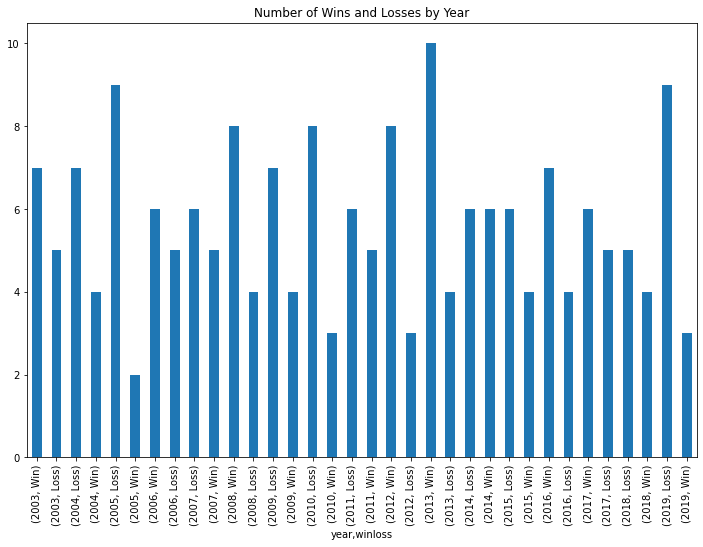

In [9]:
#get number of wins and losses per year
plt.rcParams['figure.figsize']=[12,8]
winloss_by_year=mydata.groupby("year")["winloss"].value_counts()
winloss_by_year.plot(kind="bar",title="Number of Wins and Losses by Year")

<AxesSubplot:title={'center':'Number of Home and Away Games by Year'}, xlabel='year,locale'>

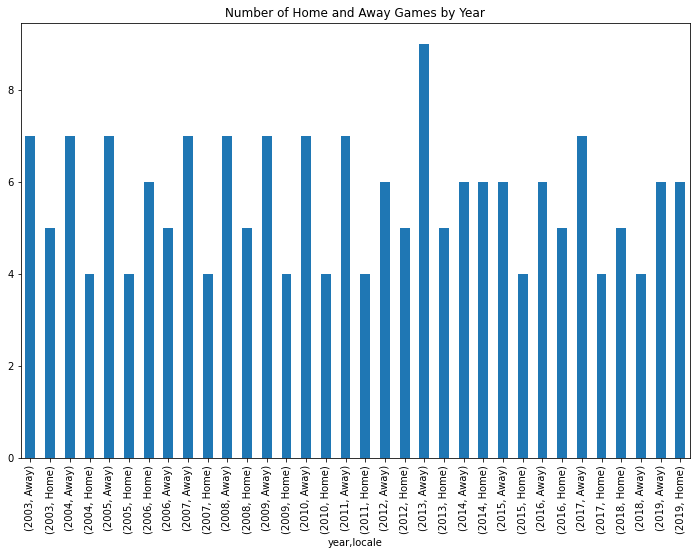

In [10]:
#number of games by locale by year
plt.rcParams['figure.figsize']=[12,8]
locale_by_year=mydata.groupby("year")["locale"].value_counts()
locale_by_year.plot(kind="bar",title="Number of Home and Away Games by Year")

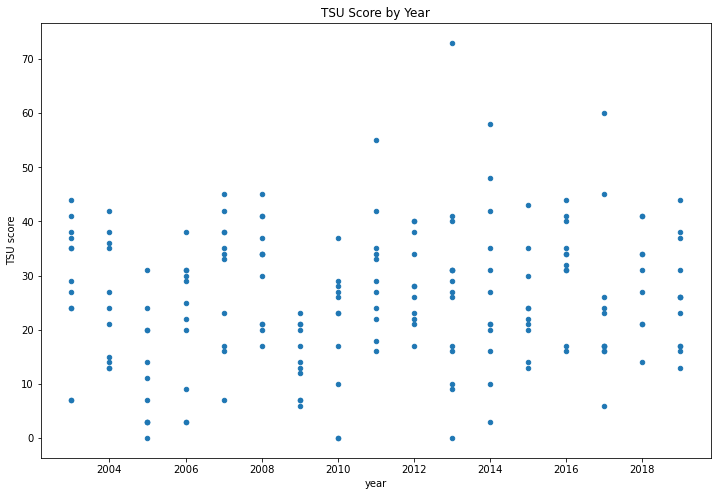

In [11]:
#TSU score by year
plt.rcParams['figure.figsize']=[12,8]
mydata.plot(x="year",y="TSU score",kind="scatter", title="TSU Score by Year")
plt.show()

In [12]:
#get outliers of TSU score
q1 = mydata["TSU score"].quantile(0.25)
q3 = mydata["TSU score"].quantile(0.75)
outlier_top_lim = q3 + 1.5 * (q3 - q1)
outlier_bottom_lim = q1 - 1.5 * (q3 - q1)
mydata[["date","city","opponent","TSU score"]][(mydata["TSU score"]>outlier_top_lim) | (mydata["TSU score"]<outlier_bottom_lim)]

,date,city,opponent,TSU score
116,2013-09-28,St. Louis,Central State University,73
167,2017-11-04,Nashville,Virginia University Lynchburg,60


In [13]:
#replace outliers of TSU score with the mean
mydata["TSU score_new"]=np.where((mydata["TSU score"]>outlier_top_lim) | (mydata["TSU score"]<outlier_bottom_lim),mydata["TSU score"].mean(),mydata["TSU score"])

In [14]:
#descriptive statistics for TSU score
mydata["TSU score"].describe()

count    191.000000
mean      25.643979
std       12.489530
min        0.000000
25%       17.000000
50%       26.000000
75%       34.000000
max       73.000000
Name: TSU score, dtype: float64

In [15]:
#descriptive statistics for TSU score with corrected outliers
mydata["TSU score_new"].describe()

count    191.000000
mean      25.216167
std       11.738355
min        0.000000
25%       17.000000
50%       25.643979
75%       34.000000
max       58.000000
Name: TSU score_new, dtype: float64

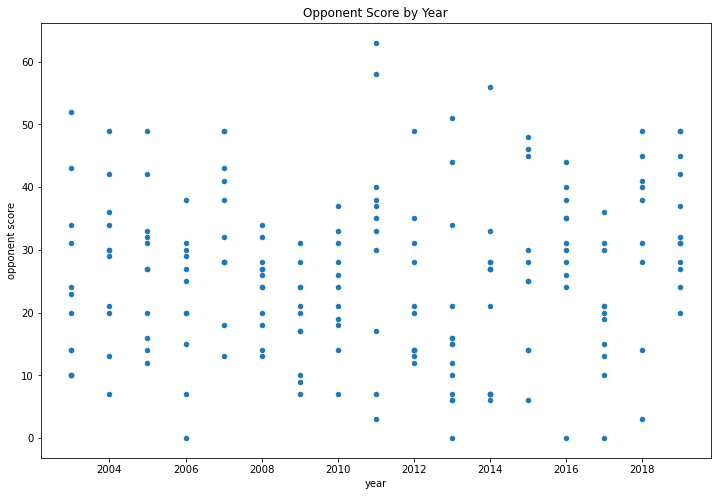

In [16]:
#opponent score by year
plt.rcParams['figure.figsize']=[12,8]
mydata.plot(x="year",y="opponent score",kind="scatter", title="Opponent Score by Year")
plt.show()

In [17]:
#get outliers of opponent score
q1 = mydata["opponent score"].quantile(0.25)
q3 = mydata["opponent score"].quantile(0.75)
outlier_top_lim = q3 + 1.5 * (q3 - q1)
outlier_bottom_lim = q1 - 1.5 * (q3 - q1)
mydata[["date","city","opponent","opponent score"]][(mydata["opponent score"]>outlier_top_lim) | (mydata["opponent score"]<outlier_bottom_lim)]

,date,city,opponent,opponent score
93,2011-09-24,Air Force Academy,Air Force Academy,63


In [18]:
#replace outliers of opponent score with the mean
mydata["opponent score_new"]=np.where((mydata["opponent score"]>outlier_top_lim) | (mydata["opponent score"]<outlier_bottom_lim),mydata["opponent score"].mean(),mydata["opponent score"])

In [19]:
#descriptive statistics for opponent score
mydata["opponent score"].describe()

count    191.00000
mean      25.82199
std       12.94969
min        0.00000
25%       15.00000
50%       27.00000
75%       33.50000
max       63.00000
Name: opponent score, dtype: float64

In [20]:
#descriptive statistics for opponent score with outliers replaced
mydata["opponent score_new"].describe()

count    191.000000
mean      25.627340
std       12.664186
min        0.000000
25%       15.000000
50%       27.000000
75%       33.000000
max       58.000000
Name: opponent score_new, dtype: float64

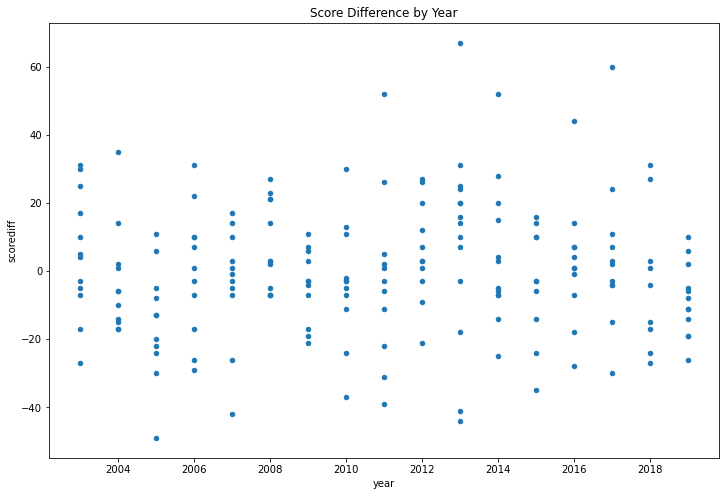

In [21]:
#score difference by year
plt.rcParams['figure.figsize']=[12,8]
mydata.plot(x="year",y="scorediff",kind="scatter", title="Score Difference by Year")
plt.show()

In [22]:
#get outliers of score difference
q1 = mydata["scorediff"].quantile(0.25)
q3 = mydata["scorediff"].quantile(0.75)
outlier_top_lim = q3 + 1.5 * (q3 - q1)
outlier_bottom_lim = q1 - 1.5 * (q3 - q1)
mydata[["date","city","opponent","scorediff"]][(mydata["scorediff"]>outlier_top_lim) | (mydata["scorediff"]<outlier_bottom_lim)]

,date,city,opponent,scorediff
33,2005-11-19,Nashville,Eastern Kentucky University,-49
95,2011-10-08,Nashville,Southeast Missouri State University,52
116,2013-09-28,St. Louis,Central State University,67
121,2013-11-02,Richmond,Eastern Kentucky University,-44
126,2014-08-30,Nashville,Edward Waters College,52
148,2016-09-03,Nashville,University of Arkansas Pine Bluff,44
167,2017-11-04,Nashville,Virginia University Lynchburg,60


In [23]:
#replace outliers of score difference with mean
mydata["scorediff_new"]=np.where((mydata["scorediff"]>outlier_top_lim) | (mydata["scorediff"]<outlier_bottom_lim),mydata["scorediff"].mean(),mydata["scorediff"])

In [24]:
#descriptive statistics for score difference
mydata.scorediff.describe()

count    191.000000
mean      -0.178010
std       19.109373
min      -49.000000
25%      -11.000000
50%       -3.000000
75%       10.000000
max       67.000000
Name: scorediff, dtype: float64

In [25]:
#descriptive statistics for score difference with outliers replaced
mydata.scorediff_new.describe()

count    191.000000
mean      -1.137414
std       16.119802
min      -42.000000
25%      -11.000000
50%       -1.000000
75%       10.000000
max       35.000000
Name: scorediff_new, dtype: float64

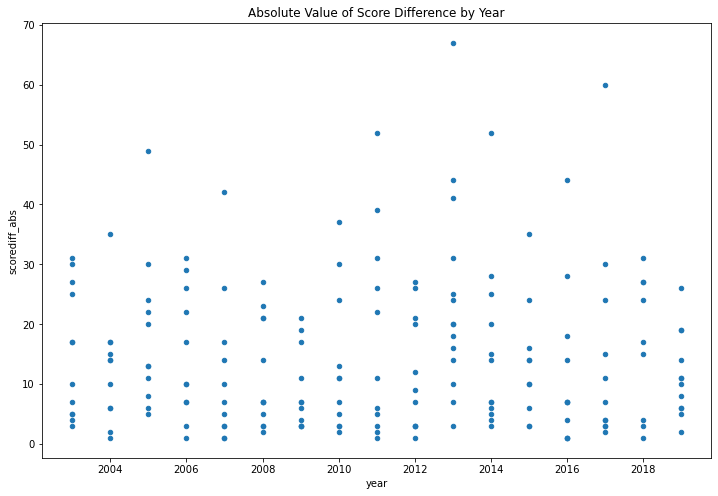

In [26]:
#absolute value of score difference by year
plt.rcParams['figure.figsize']=[12,8]
mydata.plot(x="year",y="scorediff_abs",kind="scatter", title="Absolute Value of Score Difference by Year")
plt.show()

In [27]:
#get outliers of absolute value of score difference
q1 = mydata["scorediff_abs"].quantile(0.25)
q3 = mydata["scorediff_abs"].quantile(0.75)
outlier_top_lim = q3 + 1.5 * (q3 - q1)
outlier_bottom_lim = q1 - 1.5 * (q3 - q1)
mydata[["date","city","opponent","scorediff_abs"]][(mydata["scorediff_abs"]>outlier_top_lim) | (mydata["scorediff_abs"]<outlier_bottom_lim)]

,date,city,opponent,scorediff_abs
33,2005-11-19,Nashville,Eastern Kentucky University,49
95,2011-10-08,Nashville,Southeast Missouri State University,52
116,2013-09-28,St. Louis,Central State University,67
126,2014-08-30,Nashville,Edward Waters College,52
167,2017-11-04,Nashville,Virginia University Lynchburg,60


In [28]:
#replace outliers of absolute value of score difference with mean
mydata["scorediff_abs_new"]=np.where((mydata["scorediff_abs"]>outlier_top_lim) | (mydata["scorediff_abs"]<outlier_bottom_lim),mydata["scorediff_abs"].mean(),mydata["scorediff_abs"])

In [29]:
#descriptive statistics for absolute difference of score difference
mydata.scorediff_abs.describe()

count    191.000000
mean      14.502618
std       12.400286
min        1.000000
25%        5.000000
50%       11.000000
75%       21.500000
max       67.000000
Name: scorediff_abs, dtype: float64

In [30]:
#descriptive statistics for absolute difference of score difference with outliers replaced
mydata.scorediff_abs_new.describe()

count    191.000000
mean      13.416299
std       10.301300
min        1.000000
25%        5.000000
50%       11.000000
75%       20.000000
max       44.000000
Name: scorediff_abs_new, dtype: float64

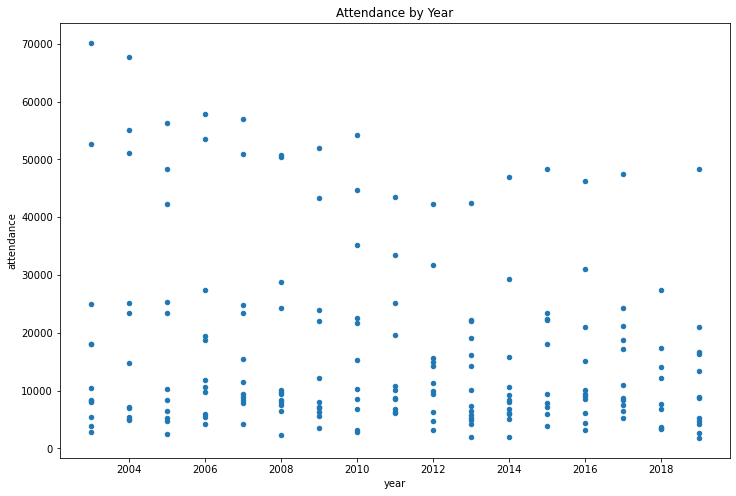

In [31]:
#attendance by year
plt.rcParams["figure.figsize"]=[12,8]
mydata.plot(x="year",y="attendance", kind="scatter", title="Attendance by Year")
plt.show()

In [32]:
#get outliers of attendance 
q1 = mydata["attendance"].quantile(0.25)
q3 = mydata["attendance"].quantile(0.75)
outlier_top_lim = q3 + 1.5 * (q3 - q1)
outlier_bottom_lim = q1 - 1.5 * (q3 - q1)
mydata[["date","city","opponent","attendance"]][(mydata["attendance"]>outlier_top_lim) | (mydata["attendance"]<outlier_bottom_lim)]

,date,city,opponent,attendance
2,2003-09-13,Memphis,Jackson State University,52603
3,2003-09-20,Atlanta,Florida A&M University,70185
14,2004-09-18,Memphis,Jackson State University,55015
15,2004-09-25,Atlanta,Florida A&M University,67712
16,2004-10-02,Indianapolis,South Carolina State University,51082
24,2005-09-10,Memphis,Jackson State University,48300
26,2005-09-24,Atlanta,Florida A&M University,56297
36,2006-09-16,Memphis,Jackson State University,53441
38,2006-09-30,Atlanta,Florida A&M University,57885
46,2007-09-08,Memphis,Jackson State University,50879


In [33]:
#replace outliers of attendance with mean
mydata["attendance_new"]=np.where((mydata["attendance"]>outlier_top_lim) | (mydata["attendance"]<outlier_bottom_lim),mydata["attendance"].mean(),mydata["attendance"])

In [34]:
#descriptive statistics for attendance
mydata.attendance.describe()

count      191.000000
mean     16985.230366
std      15493.766885
min       1776.000000
25%       6402.500000
50%      10001.000000
75%      22306.000000
max      70185.000000
Name: attendance, dtype: float64

In [35]:
#descriptive statistics for attendance with outliers replaced
mydata.attendance_new.describe()

count      191.000000
mean     13187.458677
std       9113.636740
min       1776.000000
25%       6402.500000
50%      10001.000000
75%      16985.230366
max      44688.000000
Name: attendance_new, dtype: float64

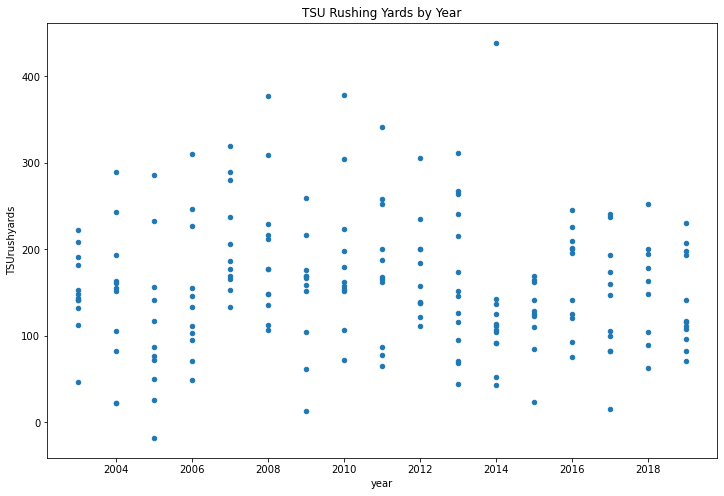

In [36]:
#TSU rushing yards by year
plt.rcParams["figure.figsize"]=[12,8]
mydata.plot(x="year",y="TSUrushyards",kind="scatter",title="TSU Rushing Yards by Year")
plt.show()

In [37]:
#get outliers of TSU rushing yards
q1 = mydata["TSUrushyards"].quantile(0.25)
q3 = mydata["TSUrushyards"].quantile(0.75)
outlier_top_lim = q3 + 1.5 * (q3 - q1)
outlier_bottom_lim = q1 - 1.5 * (q3 - q1)
mydata[["date","city","opponent","TSUrushyards"]][(mydata["TSUrushyards"]>outlier_top_lim) | (mydata["TSUrushyards"]<outlier_bottom_lim)]

,date,city,opponent,TSUrushyards
62,2008-10-18,Nashville,Austin Peay State University,377
83,2010-10-02,Indianapolis,North Carolina A&T State University,379
90,2011-09-03,Nashville,Southern University & A&M College,342
126,2014-08-30,Nashville,Edward Waters College,439


In [38]:
#replace outliers of TSU rush yards with mean
mydata["TSUrushyards_new"]=np.where((mydata["TSUrushyards"]>outlier_top_lim) | (mydata["TSUrushyards"]<outlier_bottom_lim),mydata["TSUrushyards"].mean(),mydata["TSUrushyards"])

In [39]:
#descriptive statistics for TSU rushing yards
mydata.TSUrushyards.describe()

count    191.000000
mean     157.769634
std       74.855646
min      -18.000000
25%      107.000000
50%      152.000000
75%      200.000000
max      439.000000
Name: TSUrushyards, dtype: float64

In [40]:
#descriptive statistics for TSU rushing yards with outliers replaced
mydata.TSUrushyards_new.describe()

count    191.000000
mean     153.026589
std       66.897678
min      -18.000000
25%      107.000000
50%      152.000000
75%      195.500000
max      320.000000
Name: TSUrushyards_new, dtype: float64

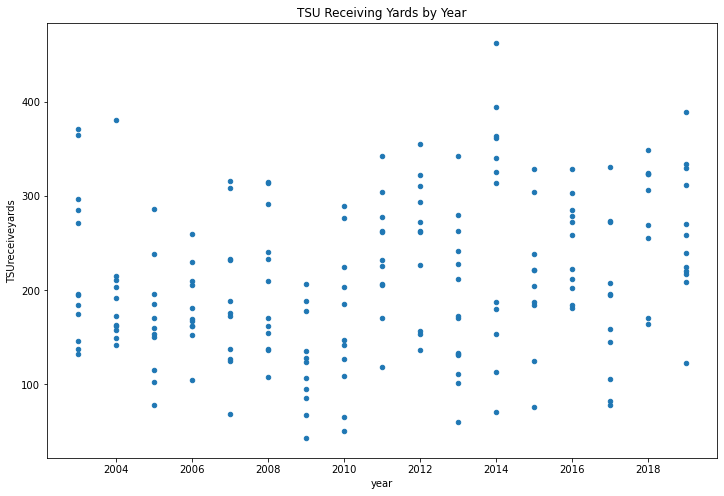

In [41]:
#TSU receiving yards by year
plt.rcParams["figure.figsize"]=[12,8]
mydata.plot(x="year",y="TSUreceiveyards",kind="scatter",title="TSU Receiving Yards by Year")
plt.show()

In [42]:
#get outliers of TSU receiving yards
q1 = mydata["TSUreceiveyards"].quantile(0.25)
q3 = mydata["TSUreceiveyards"].quantile(0.75)
outlier_top_lim = q3 + 1.5 * (q3 - q1)
outlier_bottom_lim = q1 - 1.5 * (q3 - q1)
mydata[["date","city","opponent","TSUreceiveyards"]][(mydata["TSUreceiveyards"]>outlier_top_lim) | (mydata["TSUreceiveyards"]<outlier_bottom_lim)]

,date,city,opponent,TSUreceiveyards
137,2014-11-22,Murray,Murray State University,463


In [43]:
#replace outliers of TSU rush yards with mean
mydata["TSUreceiveyards_new"]=np.where((mydata["TSUreceiveyards"]>outlier_top_lim) | (mydata["TSUreceiveyards"]<outlier_bottom_lim),mydata["TSUreceiveyards"].mean(),mydata["TSUreceiveyards"])

In [44]:
#descriptive statistics for TSU receiving yards
mydata.TSUreceiveyards.describe()

count    191.000000
mean     210.361257
std       82.371433
min       43.000000
25%      151.000000
50%      203.000000
75%      273.000000
max      463.000000
Name: TSUreceiveyards, dtype: float64

In [45]:
#descriptive statistics for TSU receiving yards with outliers replaced
mydata.TSUreceiveyards_new.describe()

count    191.000000
mean     209.038541
std       80.295493
min       43.000000
25%      151.000000
50%      203.000000
75%      272.000000
max      395.000000
Name: TSUreceiveyards_new, dtype: float64

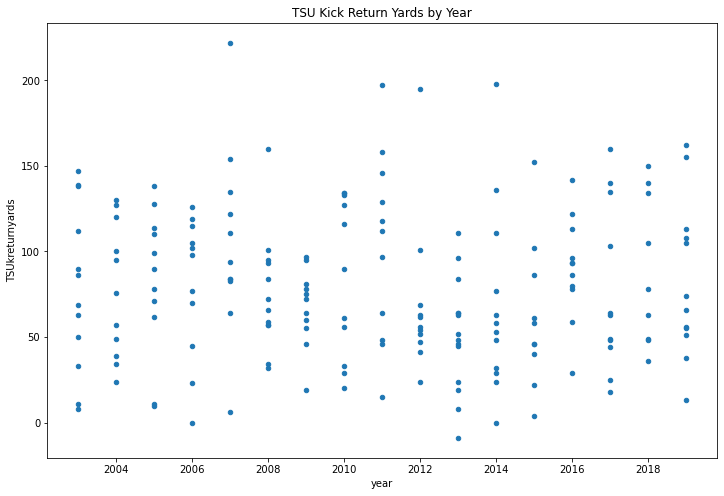

In [46]:
#TSU kick return yards by year
plt.rcParams['figure.figsize']=[12,8]
mydata.plot(x="year",y="TSUkreturnyards",kind="scatter", title="TSU Kick Return Yards by Year")
plt.show()

In [47]:
#get outliers of TSU kick return yards
q1 = mydata["TSUkreturnyards"].quantile(0.25)
q3 = mydata["TSUkreturnyards"].quantile(0.75)
outlier_top_lim = q3 + 1.5 * (q3 - q1)
outlier_bottom_lim = q1 - 1.5 * (q3 - q1)
mydata[["date","city","opponent","TSUkreturnyards"]][(mydata["TSUkreturnyards"]>outlier_top_lim) | (mydata["TSUkreturnyards"]<outlier_bottom_lim)]

,date,city,opponent,TSUkreturnyards
55,2007-11-17,Nashville,University of Tennessee Martin,222


In [48]:
#replace outliers of TSU kick return yards with mean
mydata["TSUkreturnyards_new"]=np.where((mydata["TSUkreturnyards"]>outlier_top_lim) | (mydata["TSUkreturnyards"]<outlier_bottom_lim),mydata["TSUkreturnyards"].mean(),mydata["TSUkreturnyards"])

In [49]:
#descriptive statistics for TSU kick return yards
mydata.TSUkreturnyards.describe()

count    191.000000
mean      78.670157
std       44.059662
min       -9.000000
25%       48.000000
50%       72.000000
75%      110.500000
max      222.000000
Name: TSUkreturnyards, dtype: float64

In [50]:
#descriptive statistics for TSU kick return yards
mydata.TSUkreturnyards_new.describe()

count    191.000000
mean      77.919739
std       42.808461
min       -9.000000
25%       48.000000
50%       72.000000
75%      109.000000
max      198.000000
Name: TSUkreturnyards_new, dtype: float64

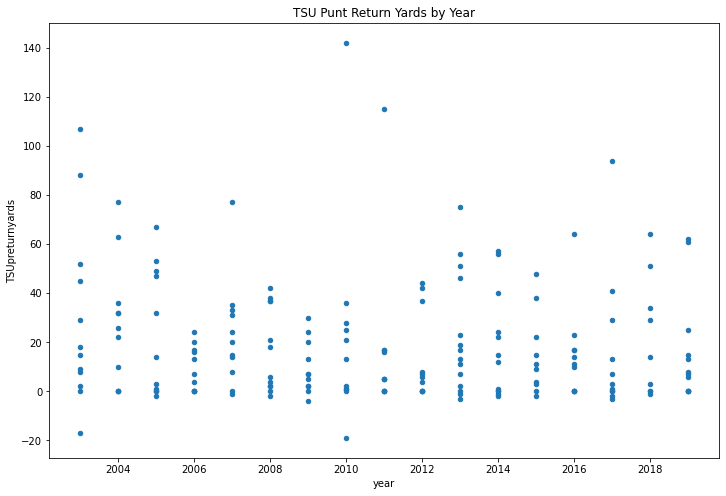

In [51]:
#TSU punt return yards by year
plt.rcParams['figure.figsize']=[12,8]
mydata.plot(x="year",y="TSUpreturnyards",kind="scatter", title="TSU Punt Return Yards by Year")
plt.show()

In [52]:
#get outliers of punt return yards
q1 = mydata["TSUpreturnyards"].quantile(0.25)
q3 = mydata["TSUpreturnyards"].quantile(0.75)
outlier_top_lim = q3 + 1.5 * (q3 - q1)
outlier_bottom_lim = q1 - 1.5 * (q3 - q1)
mydata[["date","city","opponent","TSUpreturnyards"]][(mydata["TSUpreturnyards"]>outlier_top_lim) | (mydata["TSUpreturnyards"]<outlier_bottom_lim)]

,date,city,opponent,TSUpreturnyards
0,2003-08-30,Nashville,South Carolina State University,88
2,2003-09-13,Memphis,Jackson State University,107
19,2004-10-30,Charleston,Eastern Illinois University,77
53,2007-11-03,Nashville,Murray State University,77
82,2010-09-25,Atlanta,Florida A&M University,142
95,2011-10-08,Nashville,Southeast Missouri State University,115
116,2013-09-28,St. Louis,Central State University,75
167,2017-11-04,Nashville,Virginia University Lynchburg,94


In [53]:
#replace outliers of TSU punt return yards with mean
mydata["TSUpreturnyards_new"]=np.where((mydata["TSUpreturnyards"]>outlier_top_lim) | (mydata["TSUpreturnyards"]<outlier_bottom_lim),mydata["TSUpreturnyards"].mean(),mydata["TSUpreturnyards"])

In [54]:
#descriptive statistics for TSU punt return yards
mydata.TSUpreturnyards.describe()

count    191.000000
mean      18.753927
std       24.579563
min      -19.000000
25%        0.000000
50%       11.000000
75%       29.000000
max      142.000000
Name: TSUpreturnyards, dtype: float64

In [55]:
#descriptive statistics for TSU punt return yards
mydata.TSUpreturnyards_new.describe()

count    191.000000
mean      15.481840
std       17.785031
min      -19.000000
25%        0.000000
50%       11.000000
75%       24.000000
max       67.000000
Name: TSUpreturnyards_new, dtype: float64

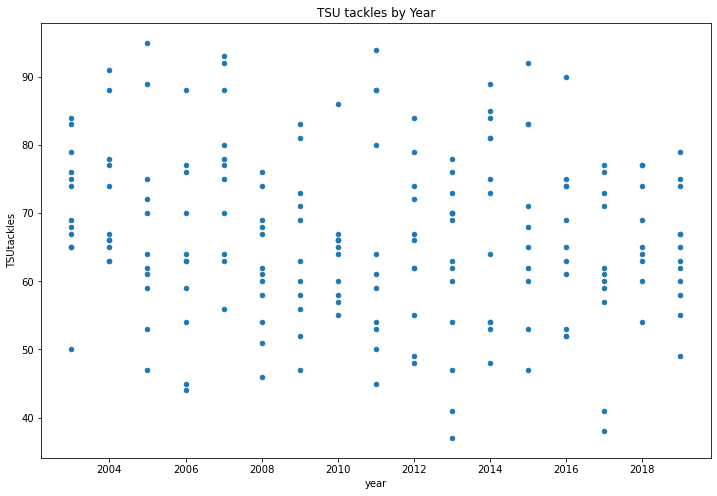

In [56]:
#TSU tackles by year
plt.rcParams['figure.figsize']=[12,8]
mydata.plot(x="year",y="TSUtackles",kind="scatter", title="TSU tackles by Year")
plt.show()

In [57]:
#get outliers of TSU tackles
q1 = mydata["TSUtackles"].quantile(0.25)
q3 = mydata["TSUtackles"].quantile(0.75)
outlier_top_lim = q3 + 1.5 * (q3 - q1)
outlier_bottom_lim = q1 - 1.5 * (q3 - q1)
mydata[["date","city","opponent","TSUtackles"]][(mydata["TSUtackles"]>outlier_top_lim) | (mydata["TSUtackles"]<outlier_bottom_lim)]

,date,city,opponent,TSUtackles


In [58]:
#descriptive statistics for TSU tackles 
mydata.TSUtackles.describe()

count    191.000000
mean      66.685864
std       12.195588
min       37.000000
25%       59.000000
50%       66.000000
75%       75.000000
max       95.000000
Name: TSUtackles, dtype: float64

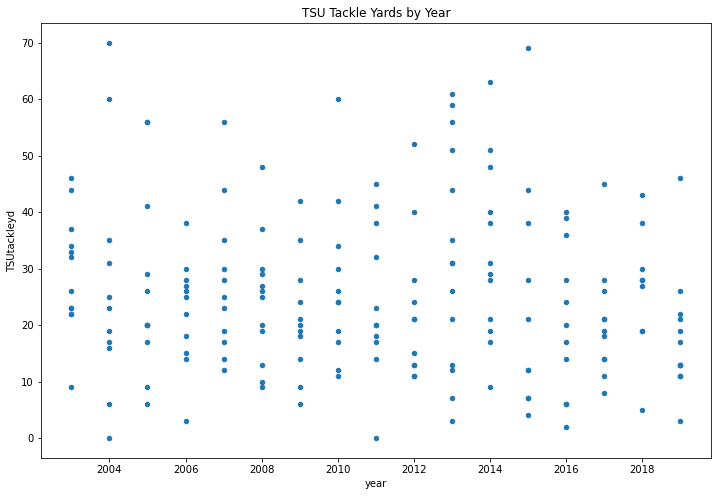

In [59]:
#TSU tackle yards by year
plt.rcParams['figure.figsize']=[12,8]
mydata.plot(x="year",y="TSUtackleyd",kind="scatter", title="TSU Tackle Yards by Year")
plt.show()

In [60]:
#get outliers of TSU tackle yards
q1 = mydata["TSUtackleyd"].quantile(0.25)
q3 = mydata["TSUtackleyd"].quantile(0.75)
outlier_top_lim = q3 + 1.5 * (q3 - q1)
outlier_bottom_lim = q1 - 1.5 * (q3 - q1)
mydata[["date","city","opponent","TSUtackleyd"]][(mydata["TSUtackleyd"]>outlier_top_lim) | (mydata["TSUtackleyd"]<outlier_bottom_lim)]

,date,city,opponent,TSUtackleyd
13,2004-09-09,Martin,University of Tennessee Martin,60
15,2004-09-25,Atlanta,Florida A&M University,70
82,2010-09-25,Atlanta,Florida A&M University,60
118,2013-10-12,Jacksonville,Jacksonville State University,61
137,2014-11-22,Murray,Murray State University,63
146,2015-11-07,Nashville,Murray State University,69


In [61]:
#replace outliers of TSU tackle yards with mean
mydata["TSUtackleyd_new"]=np.where((mydata["TSUtackleyd"]>outlier_top_lim) | (mydata["TSUtackleyd"]<outlier_bottom_lim),mydata["TSUtackleyd"].mean(),mydata["TSUtackleyd"])

In [62]:
#descriptive statistics for TSU tackle yards
mydata.TSUtackleyd.describe()

count    191.000000
mean      25.350785
std       14.392157
min        0.000000
25%       14.500000
50%       23.000000
75%       32.500000
max       70.000000
Name: TSUtackleyd, dtype: float64

In [63]:
#descriptive statistics for TSU tackle yards with outliers replaced
mydata.TSUtackleyd_new.describe()

count    191.000000
mean      24.141909
std       12.584055
min        0.000000
25%       14.500000
50%       23.000000
75%       30.500000
max       59.000000
Name: TSUtackleyd_new, dtype: float64

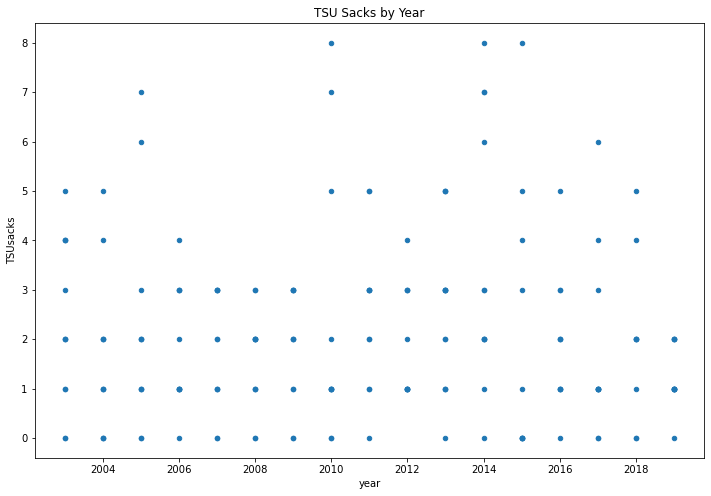

In [64]:
#TSU sacks by year
plt.rcParams['figure.figsize']=[12,8]
mydata.plot(x="year",y="TSUsacks",kind="scatter", title="TSU Sacks by Year")
plt.show()

In [65]:
#get outliers of TSU sacks
q1 = mydata["TSUsacks"].quantile(0.25)
q3 = mydata["TSUsacks"].quantile(0.75)
outlier_top_lim = q3 + 1.5 * (q3 - q1)
outlier_bottom_lim = q1 - 1.5 * (q3 - q1)
mydata[["date","city","opponent","TSUsacks"]][(mydata["TSUsacks"]>outlier_top_lim) | (mydata["TSUsacks"]<outlier_bottom_lim)]

,date,city,opponent,TSUsacks
26,2005-09-24,Atlanta,Florida A&M University,7.0
79,2010-09-04,Nashville,Alabama A&M University,7.0
82,2010-09-25,Atlanta,Florida A&M University,8.0
128,2014-09-13,Memphis,Jackson State University,7.0
130,2014-09-27,Nashville,Florida A&M University,7.0
137,2014-11-22,Murray,Murray State University,8.0
146,2015-11-07,Nashville,Murray State University,8.0


In [66]:
#replace outliers of TSU sacks with mean
mydata["TSUsacks_new"]=np.where((mydata["TSUsacks"]>outlier_top_lim) | (mydata["TSUsacks"]<outlier_bottom_lim),mydata["TSUsacks"].mean(),mydata["TSUsacks"])

In [67]:
#descriptive statistics for TSU sacks
mydata.TSUsacks.describe()

count    191.000000
mean       2.089005
std        1.776287
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        8.000000
Name: TSUsacks, dtype: float64

In [68]:
#descriptive statistics for TSU sacks with outliers replaced
mydata.TSUsacks_new.describe()

count    191.000000
mean       1.893314
std        1.434319
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: TSUsacks_new, dtype: float64

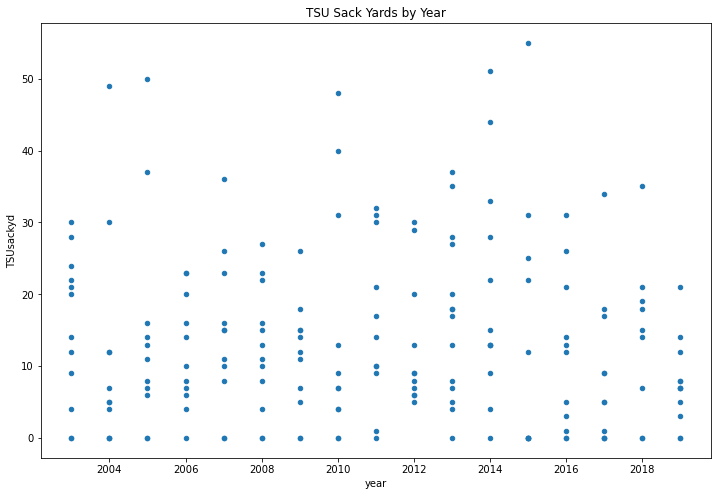

In [69]:
#TSU sack yards by year
plt.rcParams['figure.figsize']=[12,8]
mydata.plot(x="year",y="TSUsackyd",kind="scatter", title="TSU Sack Yards by Year")
plt.show()

In [70]:
#get outliers of TSU sack yards
q1 = mydata["TSUsackyd"].quantile(0.25)
q3 = mydata["TSUsackyd"].quantile(0.75)
outlier_top_lim = q3 + 1.5 * (q3 - q1)
outlier_bottom_lim = q1 - 1.5 * (q3 - q1)
mydata[["date","city","winner","TSUsackyd"]][(mydata["TSUsackyd"]>outlier_top_lim) | (mydata["TSUsackyd"]<outlier_bottom_lim)]

,date,city,winner,TSUsackyd
15,2004-09-25,Atlanta,Florida A&M University,49
26,2005-09-24,Atlanta,Florida A&M University,50
82,2010-09-25,Atlanta,Tennessee State University,48
130,2014-09-27,Nashville,Tennessee State University,44
137,2014-11-22,Murray,Tennessee State University,51
146,2015-11-07,Nashville,Murray State University,55


In [71]:
#replace outliers of TSU sack yards with mean
mydata["TSUsackyd_new"]=np.where((mydata["TSUsackyd"]>outlier_top_lim) | (mydata["TSUsackyd"]<outlier_bottom_lim),mydata["TSUsackyd"].mean(),mydata["TSUsackyd"])

In [72]:
#descriptive statistics for TSU sack yards
mydata.TSUsackyd.describe()

count    191.000000
mean      13.534031
std       11.944946
min        0.000000
25%        5.000000
50%       11.000000
75%       20.000000
max       55.000000
Name: TSUsackyd, dtype: float64

In [73]:
#descriptive statistics for TSU sack yards with outliers replaced
mydata.TSUsackyd_new.describe()

count    191.000000
mean      12.404210
std       10.010235
min        0.000000
25%        5.000000
50%       11.000000
75%       18.000000
max       40.000000
Name: TSUsackyd_new, dtype: float64

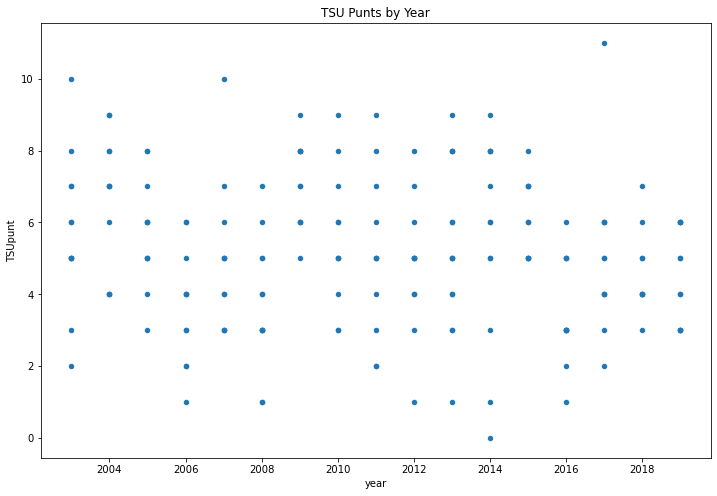

In [74]:
#TSU punts by year
plt.rcParams['figure.figsize']=[12,8]
mydata.plot(x="year",y="TSUpunt",kind="scatter", title="TSU Punts by Year")
plt.show()

In [75]:
#get outliers of TSU punt
q1 = mydata["TSUpunt"].quantile(0.25)
q3 = mydata["TSUpunt"].quantile(0.75)
outlier_top_lim = q3 + 1.5 * (q3 - q1)
outlier_bottom_lim = q1 - 1.5 * (q3 - q1)
mydata[["date","city","opponent","TSUpunt"]][(mydata["TSUpunt"]>outlier_top_lim) | (mydata["TSUpunt"]<outlier_bottom_lim)]

,date,city,opponent,TSUpunt
10,2003-11-15,Nashville,Eastern Kentucky University,10
51,2007-10-20,Richmond,Eastern Kentucky University,10
136,2014-11-08,Clarksville,Austin Peay State University,0
169,2017-11-16,Jacksonville,Jacksonville State University,11


In [76]:
#replace outliers of TSU punts with mean
mydata["TSUpunt_new"]=np.where((mydata["TSUpunt"]>outlier_top_lim) | (mydata["TSUpunt"]<outlier_bottom_lim),mydata["TSUpunt"].mean(),mydata["TSUpunt"])

In [77]:
#descriptive statistics for TSU punts
mydata.TSUpunt.describe()

count    191.000000
mean       5.162304
std        2.064702
min        0.000000
25%        4.000000
50%        5.000000
75%        6.000000
max       11.000000
Name: TSUpunt, dtype: float64

In [78]:
#descriptive statistics for TSU punts with outliers replaced
mydata.TSUpunt_new.describe()

count    191.000000
mean       5.108111
std        1.921996
min        1.000000
25%        4.000000
50%        5.000000
75%        6.000000
max        9.000000
Name: TSUpunt_new, dtype: float64

<AxesSubplot:title={'center':'Number of Conference and Nonconference Games by Year'}, xlabel='year,gametype'>

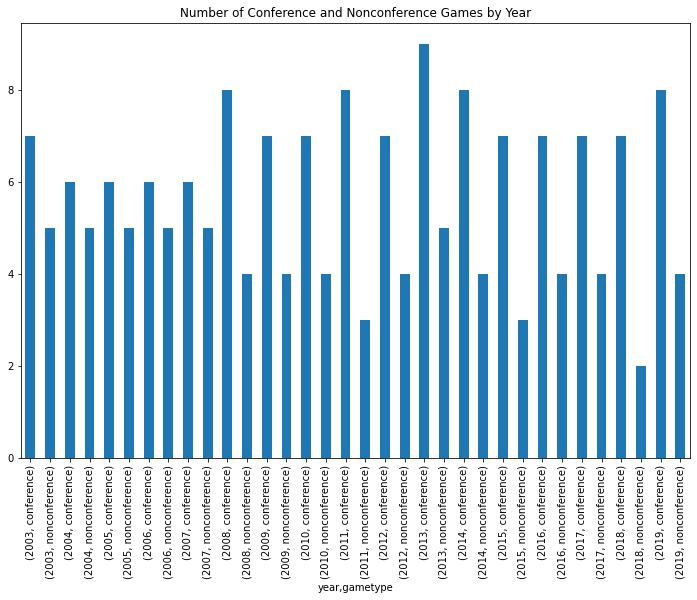

In [79]:
#number of games by game type by year
plt.rcParams['figure.figsize']=[12,8]
gametype_by_year=mydata.groupby("year")["gametype"].value_counts()
gametype_by_year.plot(kind="bar",title="Number of Conference and Nonconference Games by Year")

In [83]:
#game type
mydata["gametype"].value_counts()

conference       121
nonconference     70
Name: gametype, dtype: int64

In [82]:
#creating new file with variables with outliers replaced
mydata_1=mydata
#saving new file with variables (not saving mydata again to maintain original dataset)
mydata_1.to_csv("mydata_1.csv",encoding='utf-8')